# The Titanic Dataset
## Run Feature Engineering

Training set consists of 891 observations and 11 features.
Test set consists of 418 observations and 11 features.


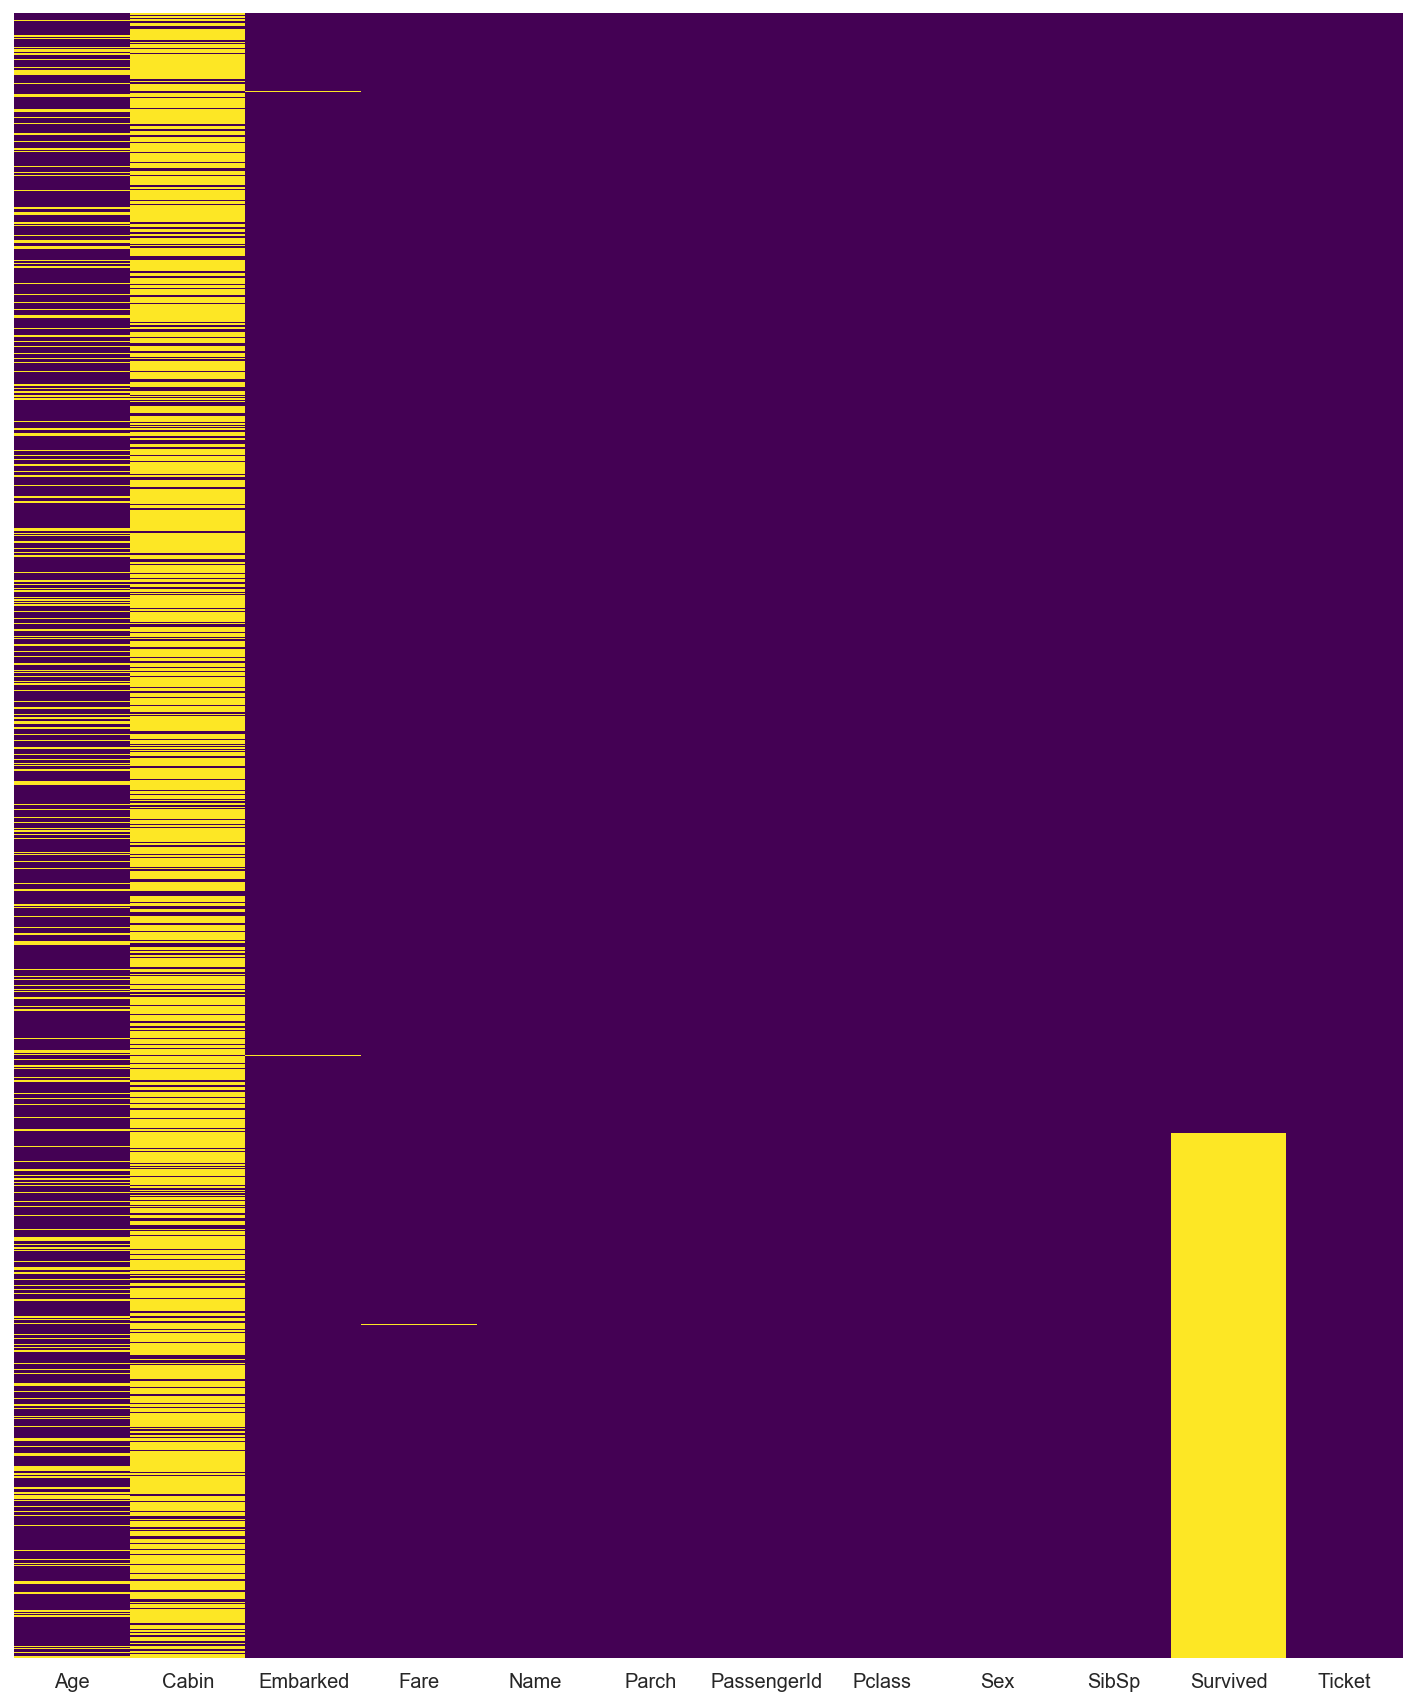

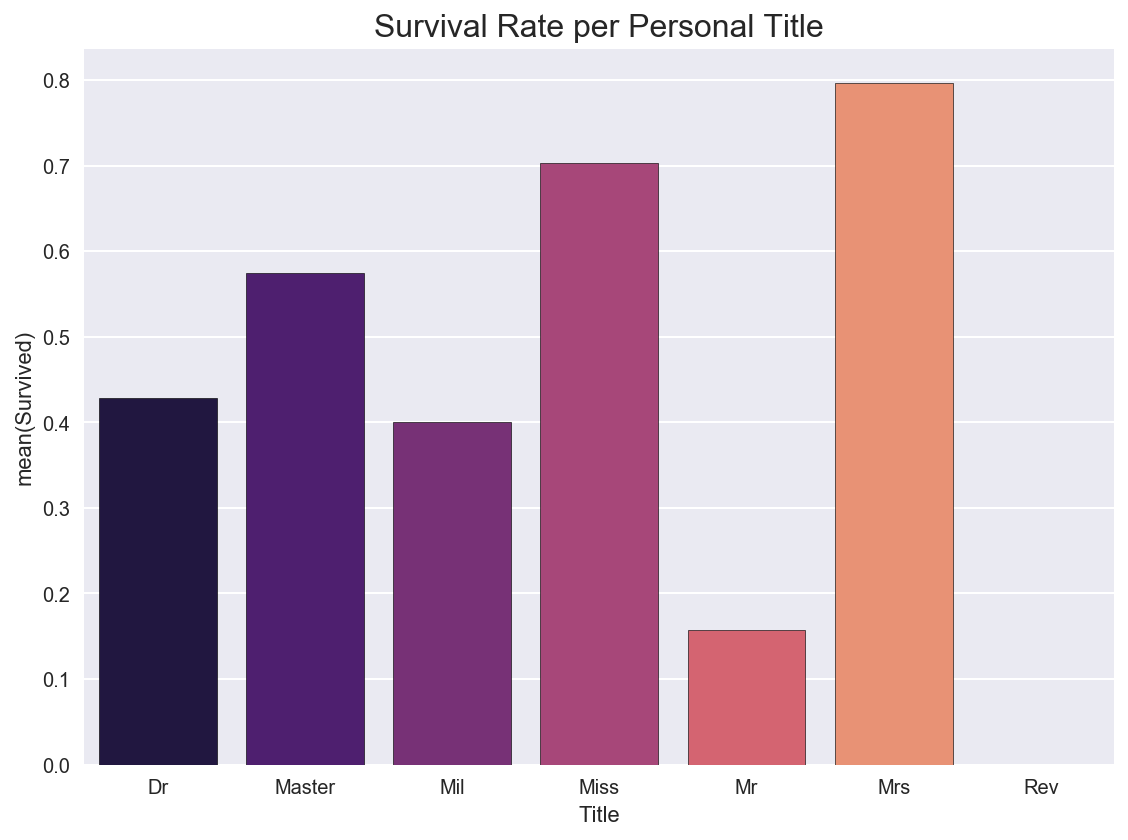

Feature_Engineering.ipynb:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  {
Feature_Engineering.ipynb:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "cell_type": "markdown",
Feature_Engineering.ipynb:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "metadata": {},
Feature_Engineering.ipynb:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "source": [
Feature_Engineering.ipynb:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "# The Titanic Dataset\n",
Feature_Engineering.ipynb:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "## Import Libraries"
Feature_Engineering.ipynb:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ]


The p-value of the difference of the variable Survived in relation with Title is:
1.191650789013299e-73


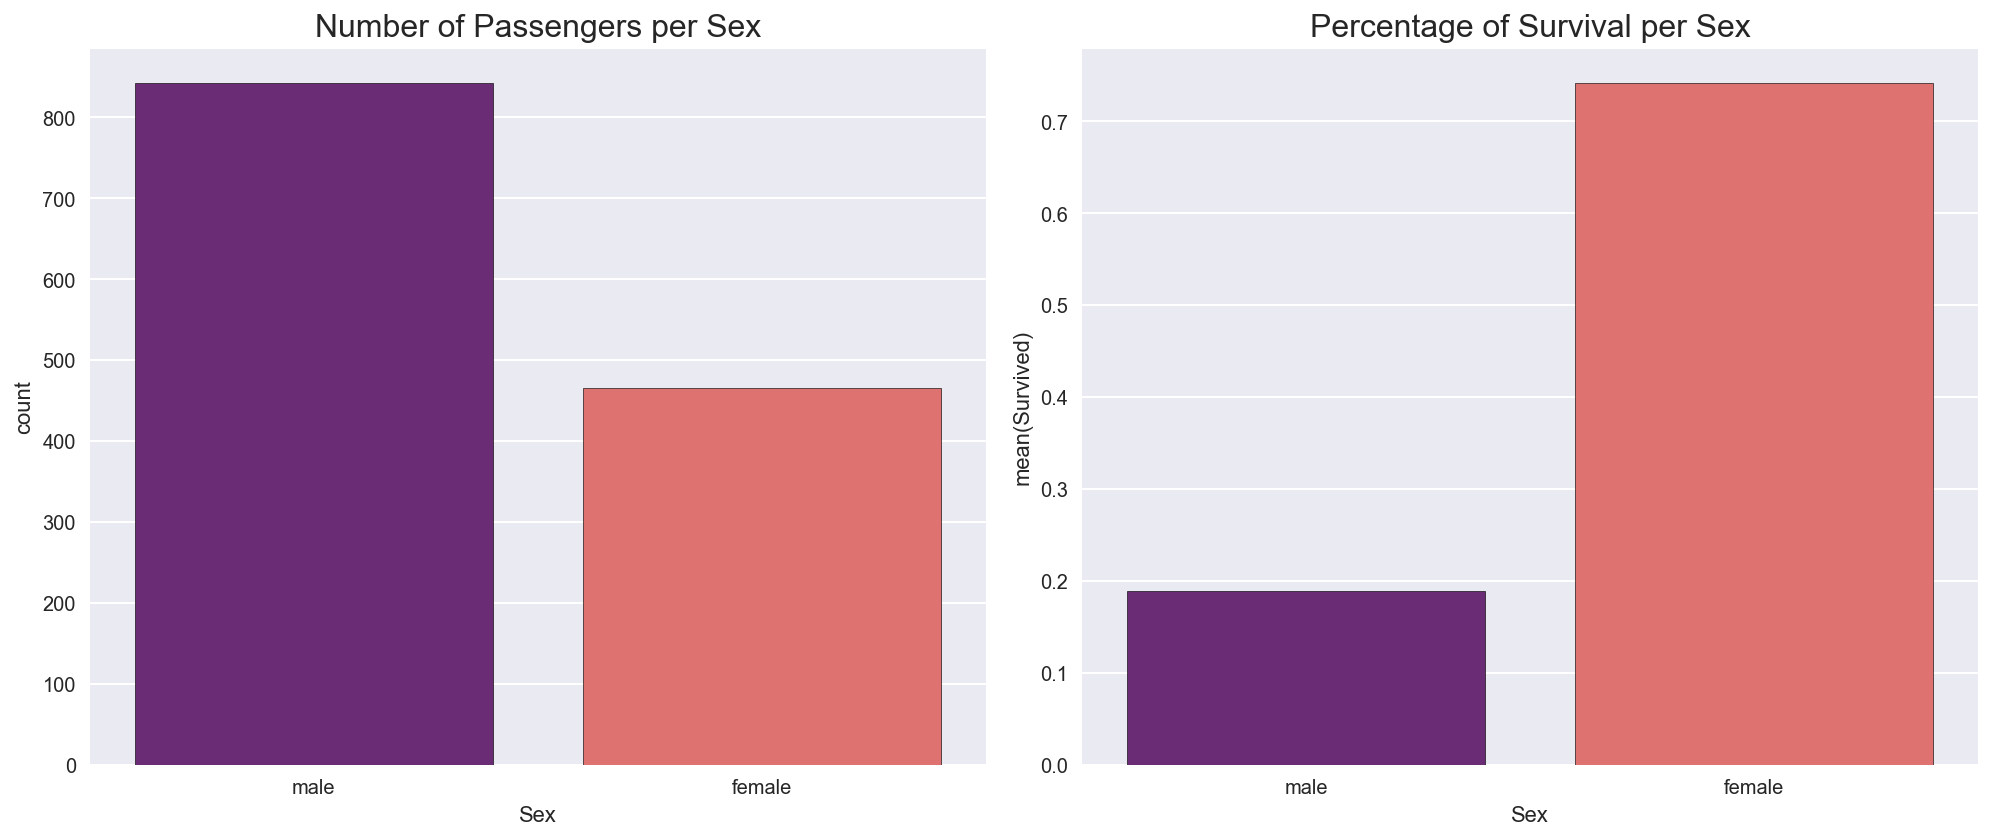

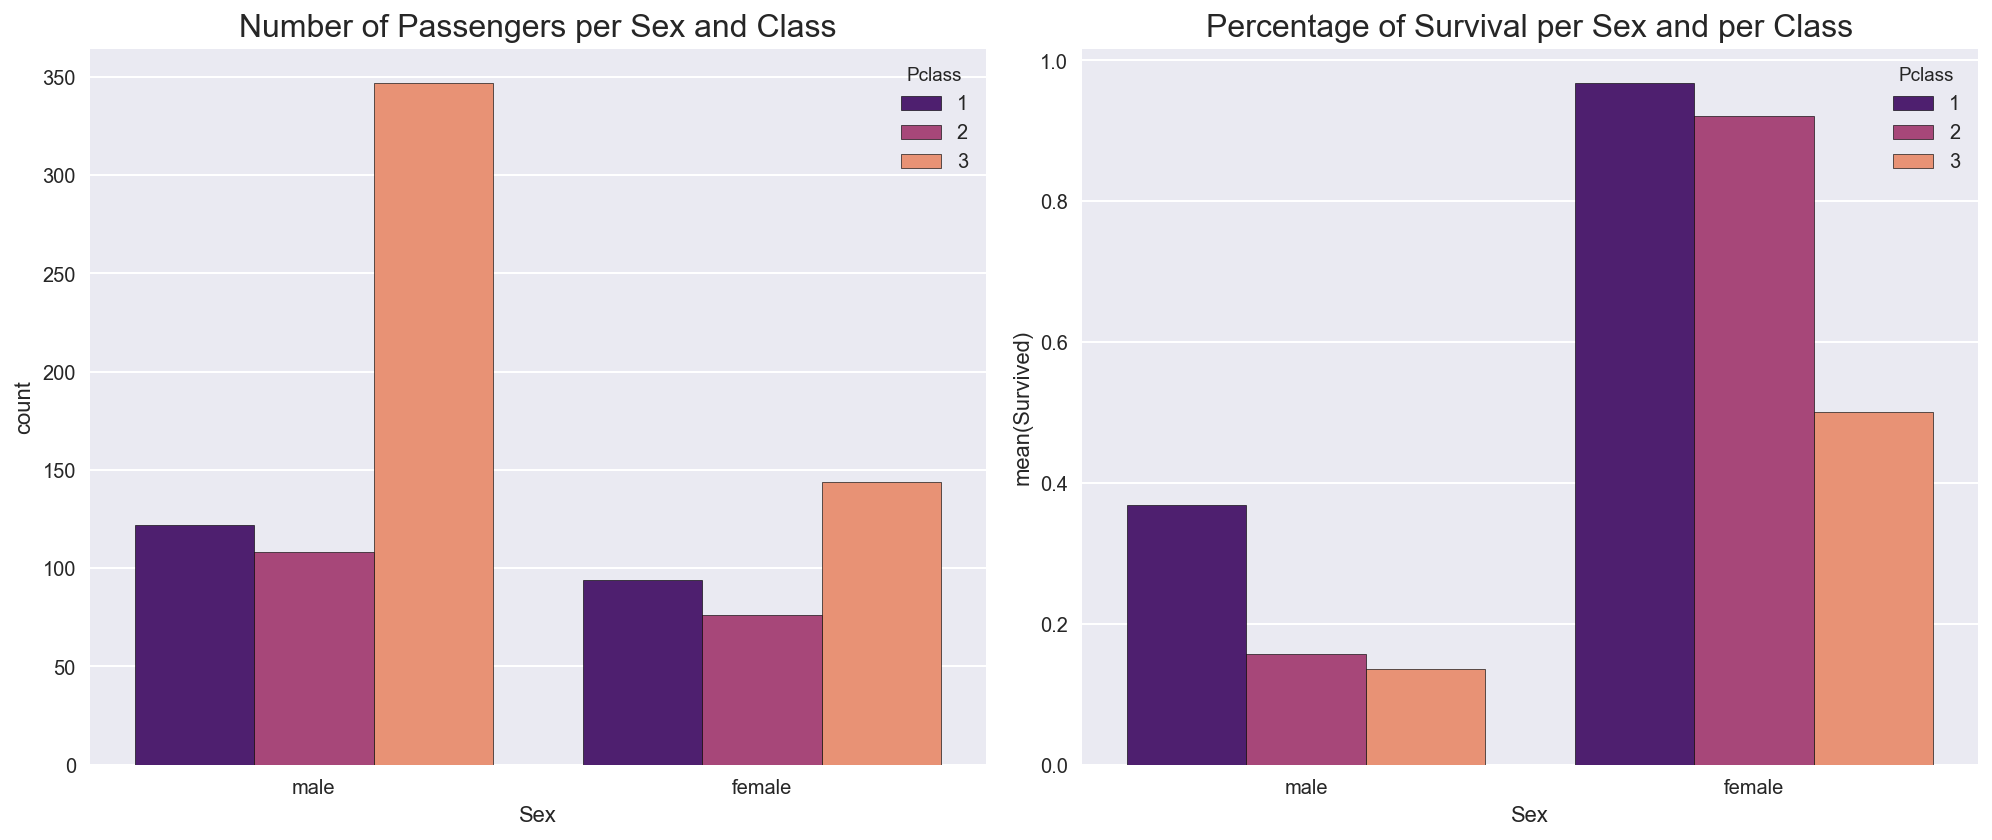

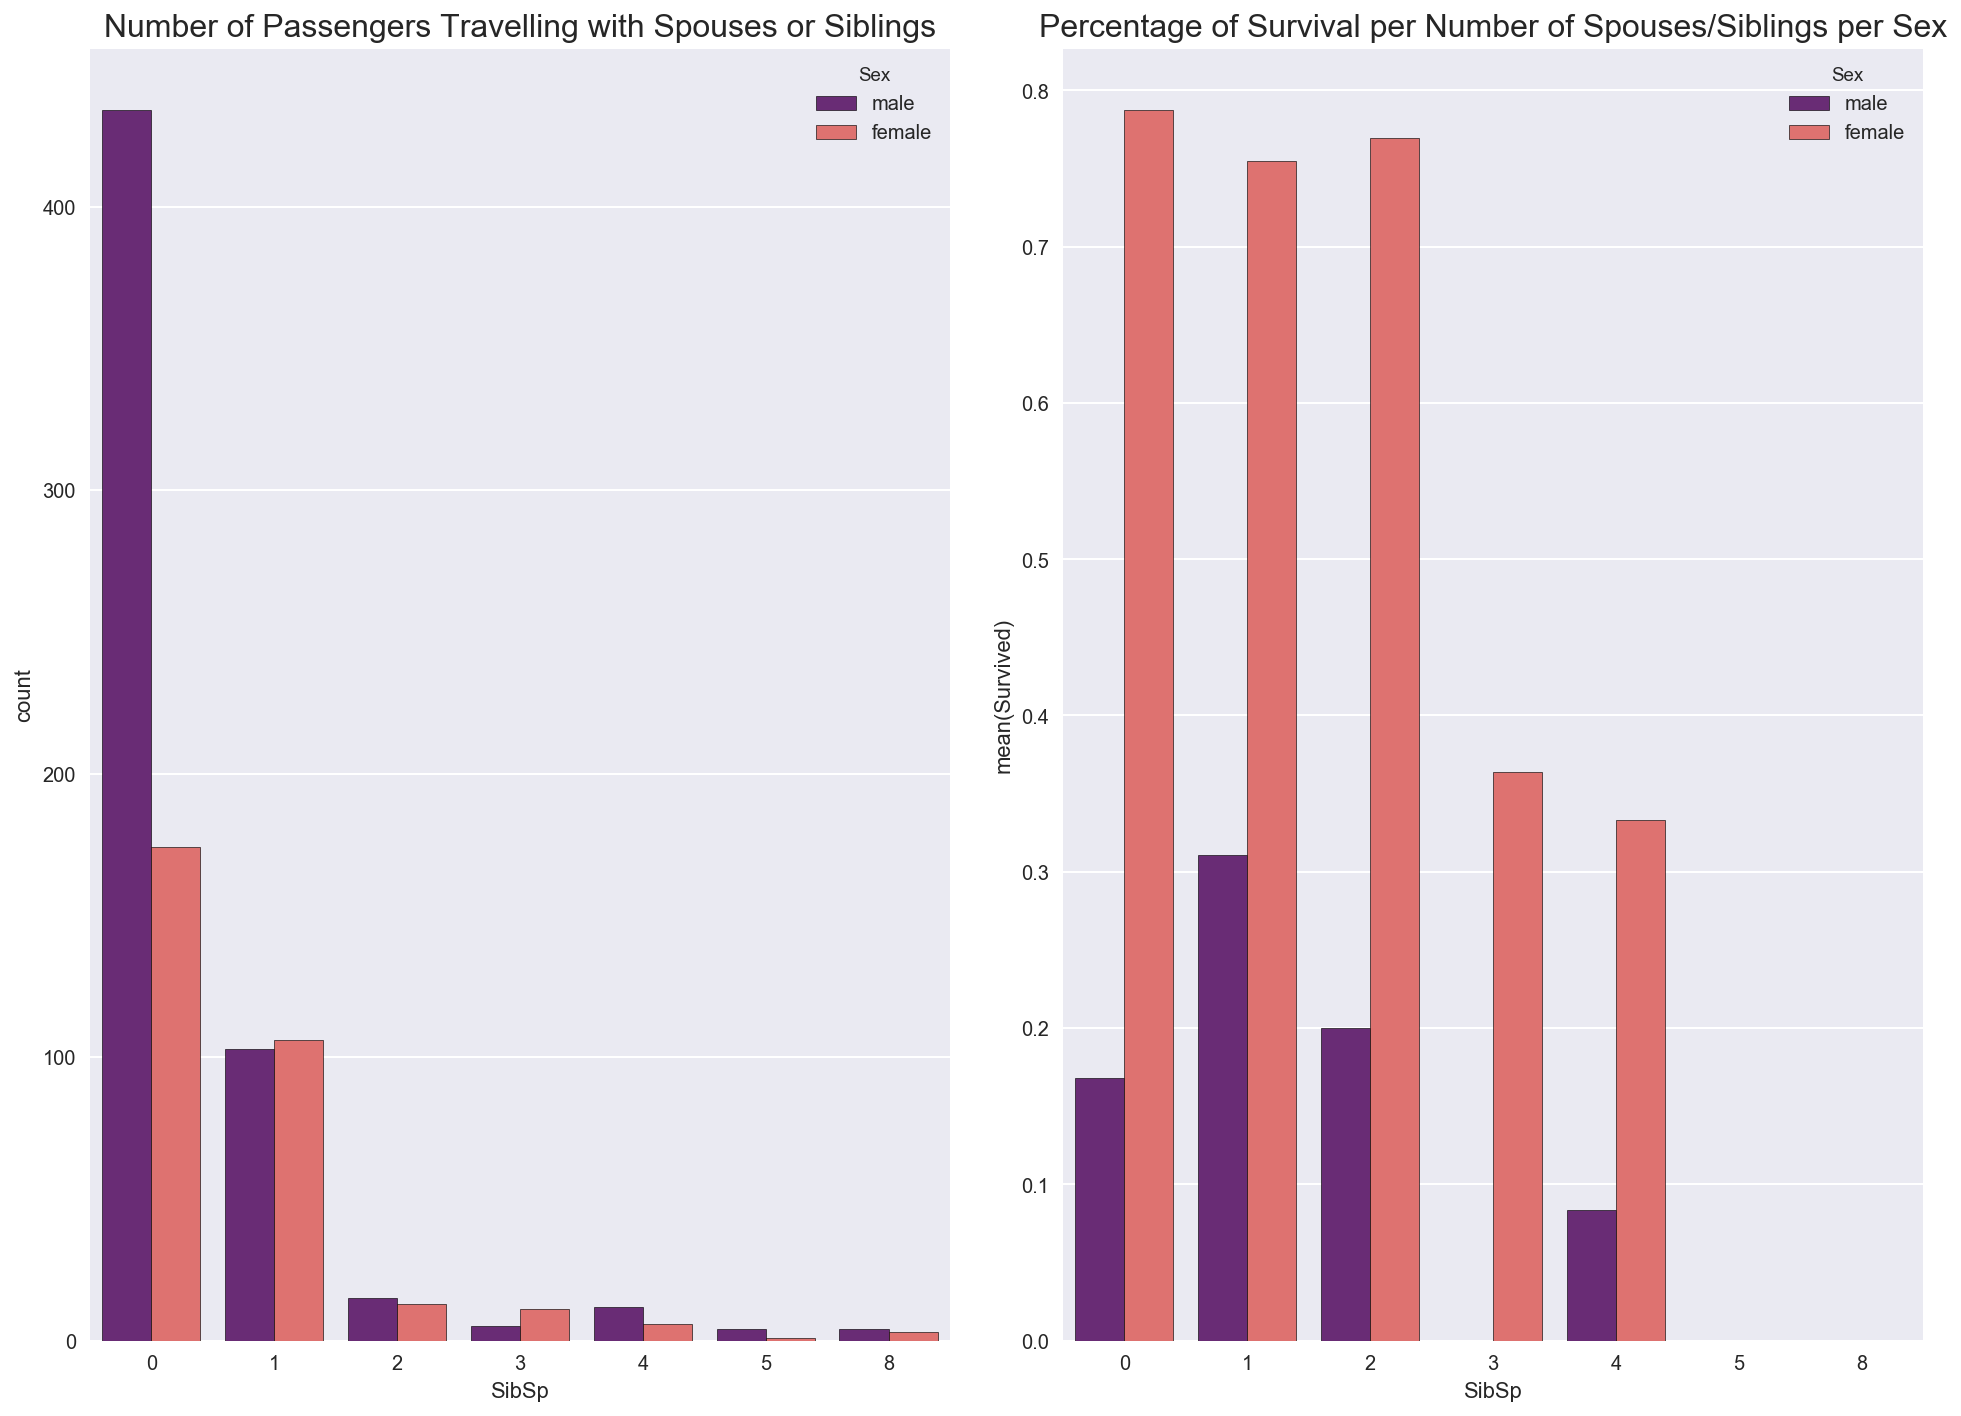

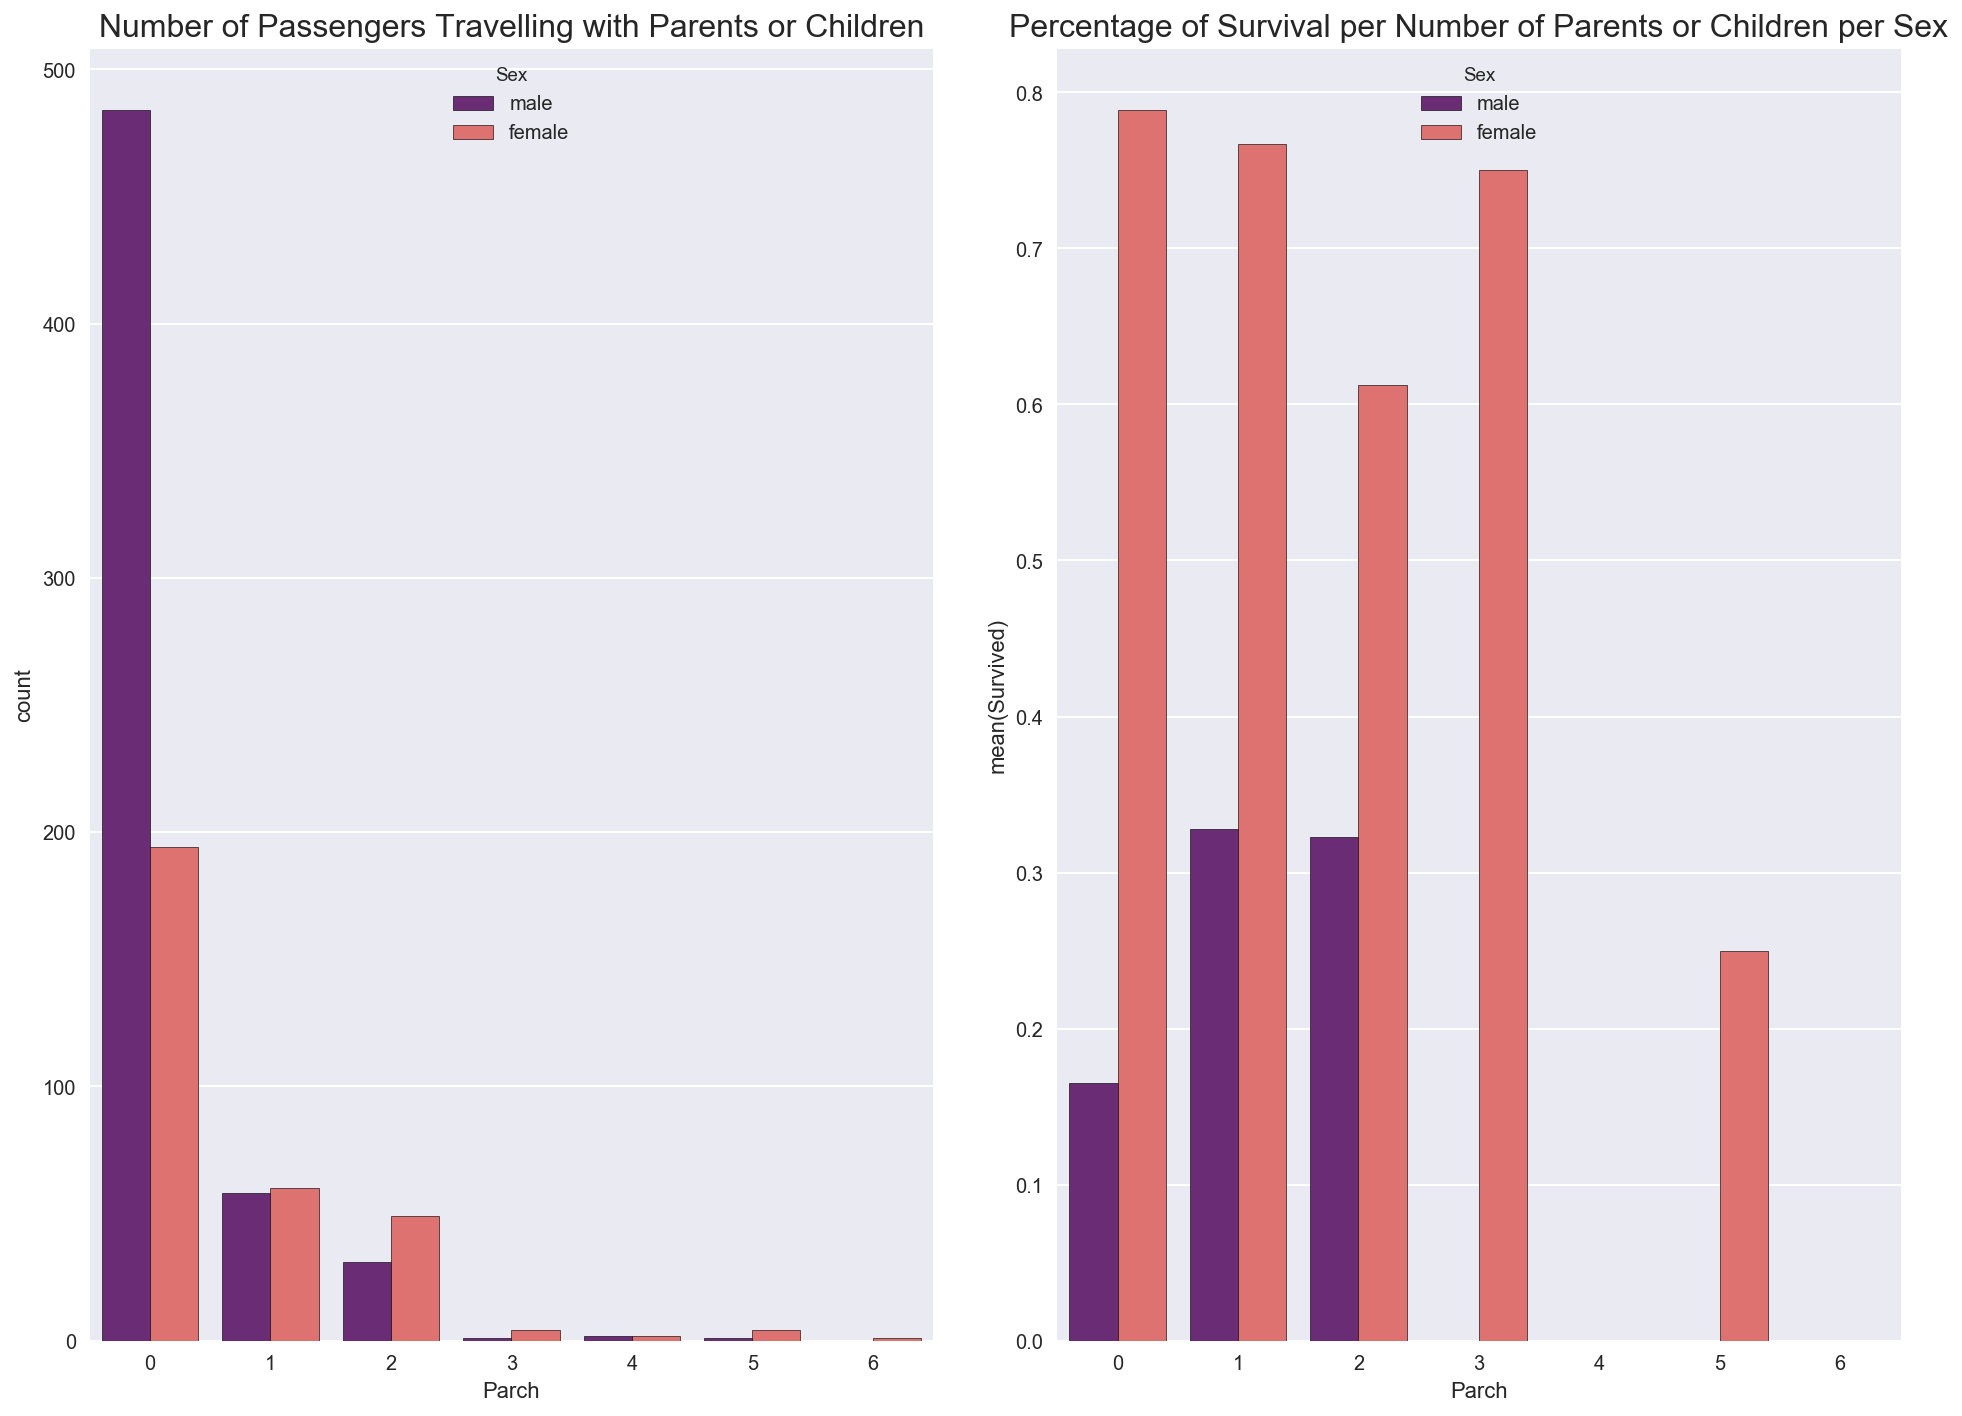

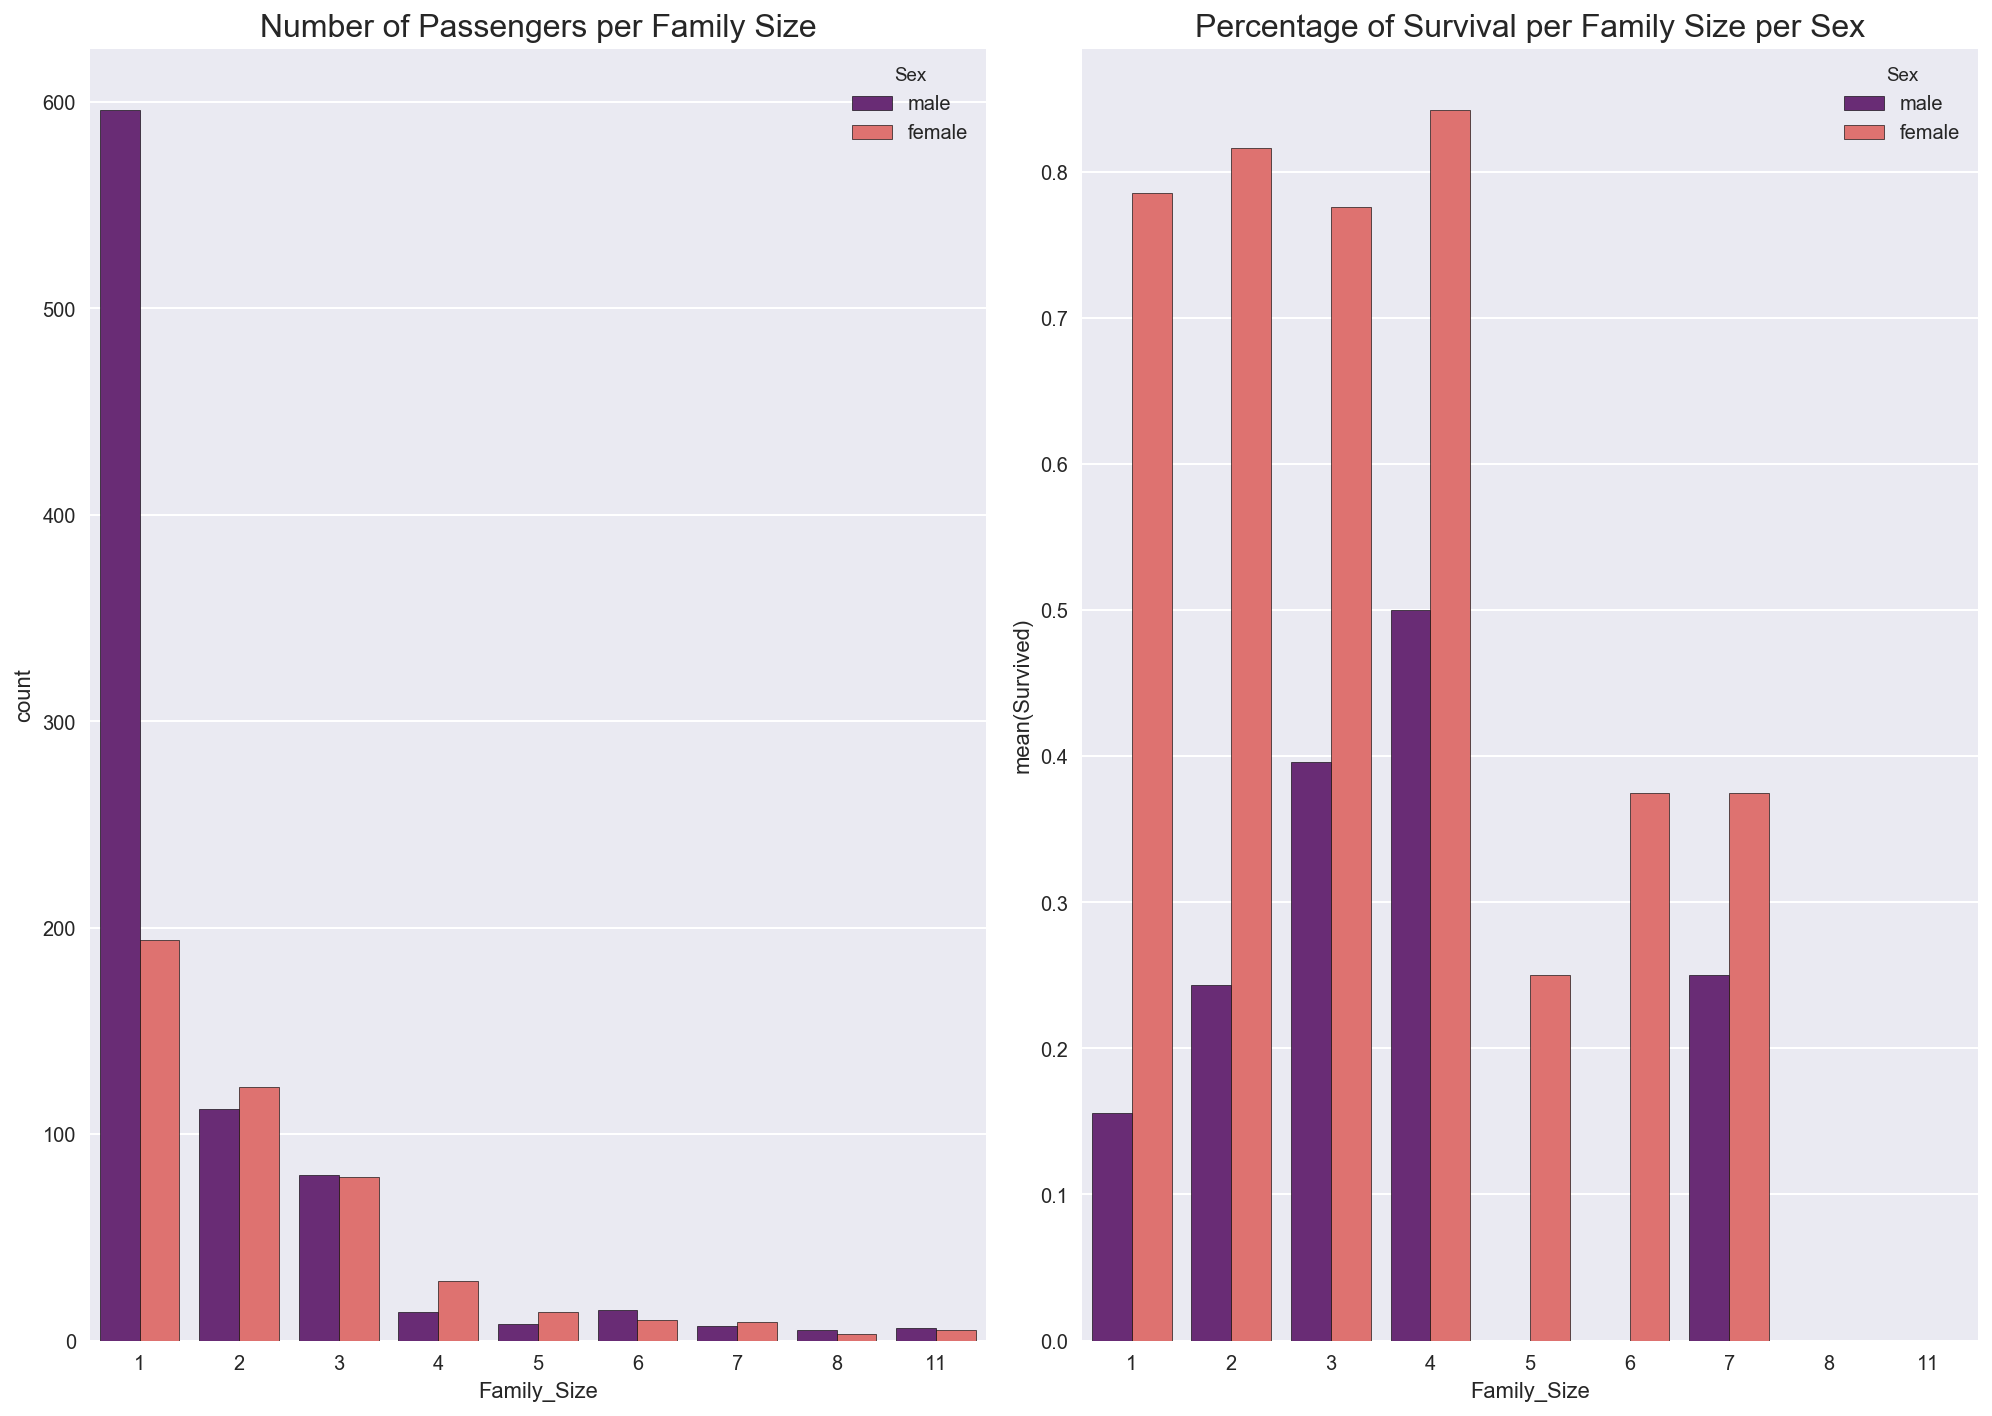

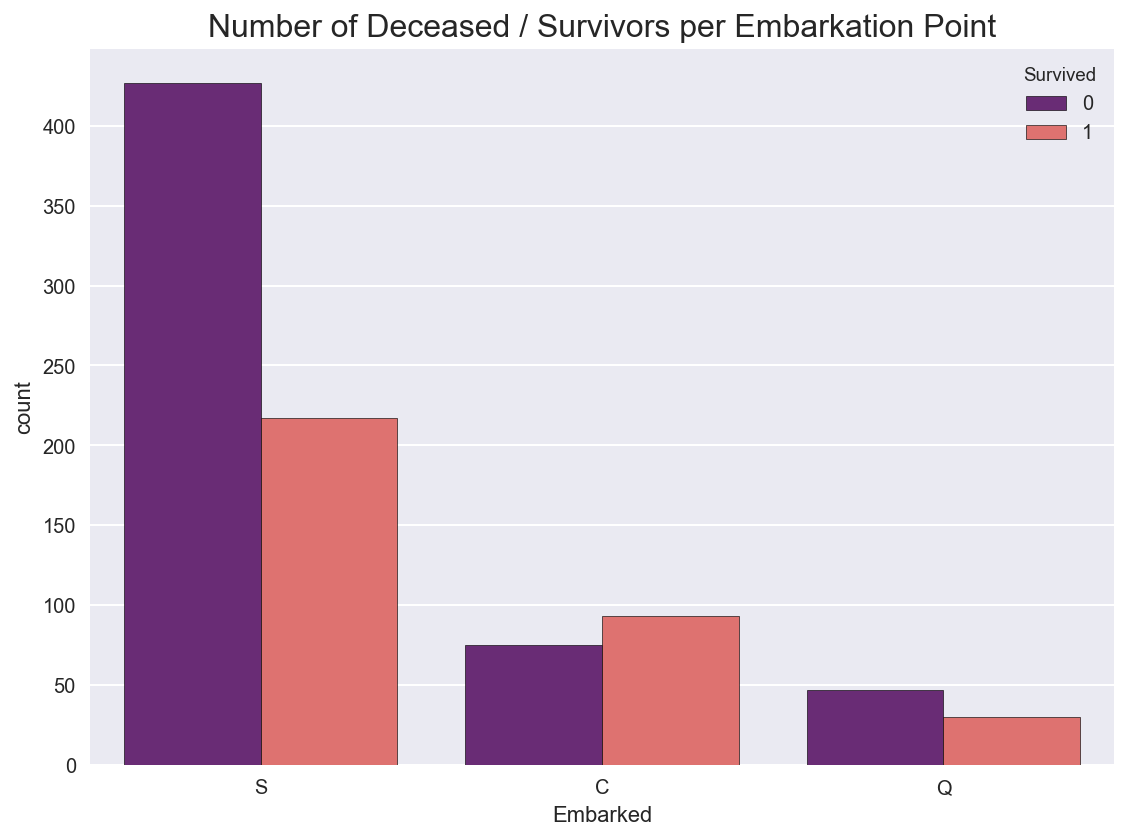

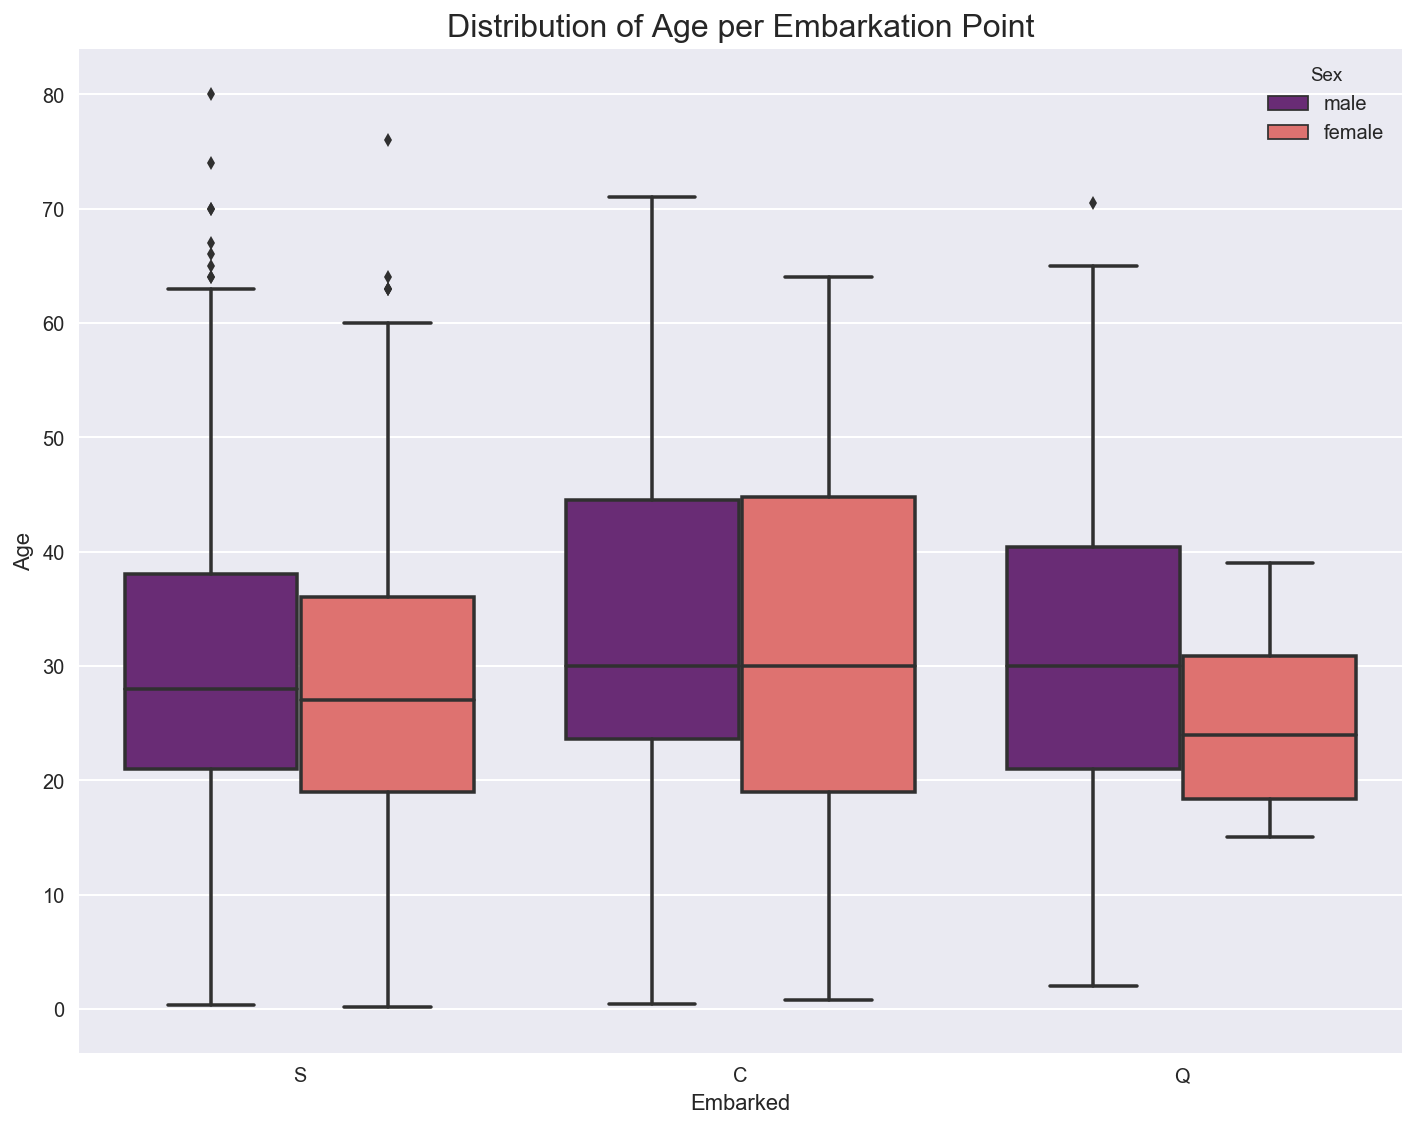

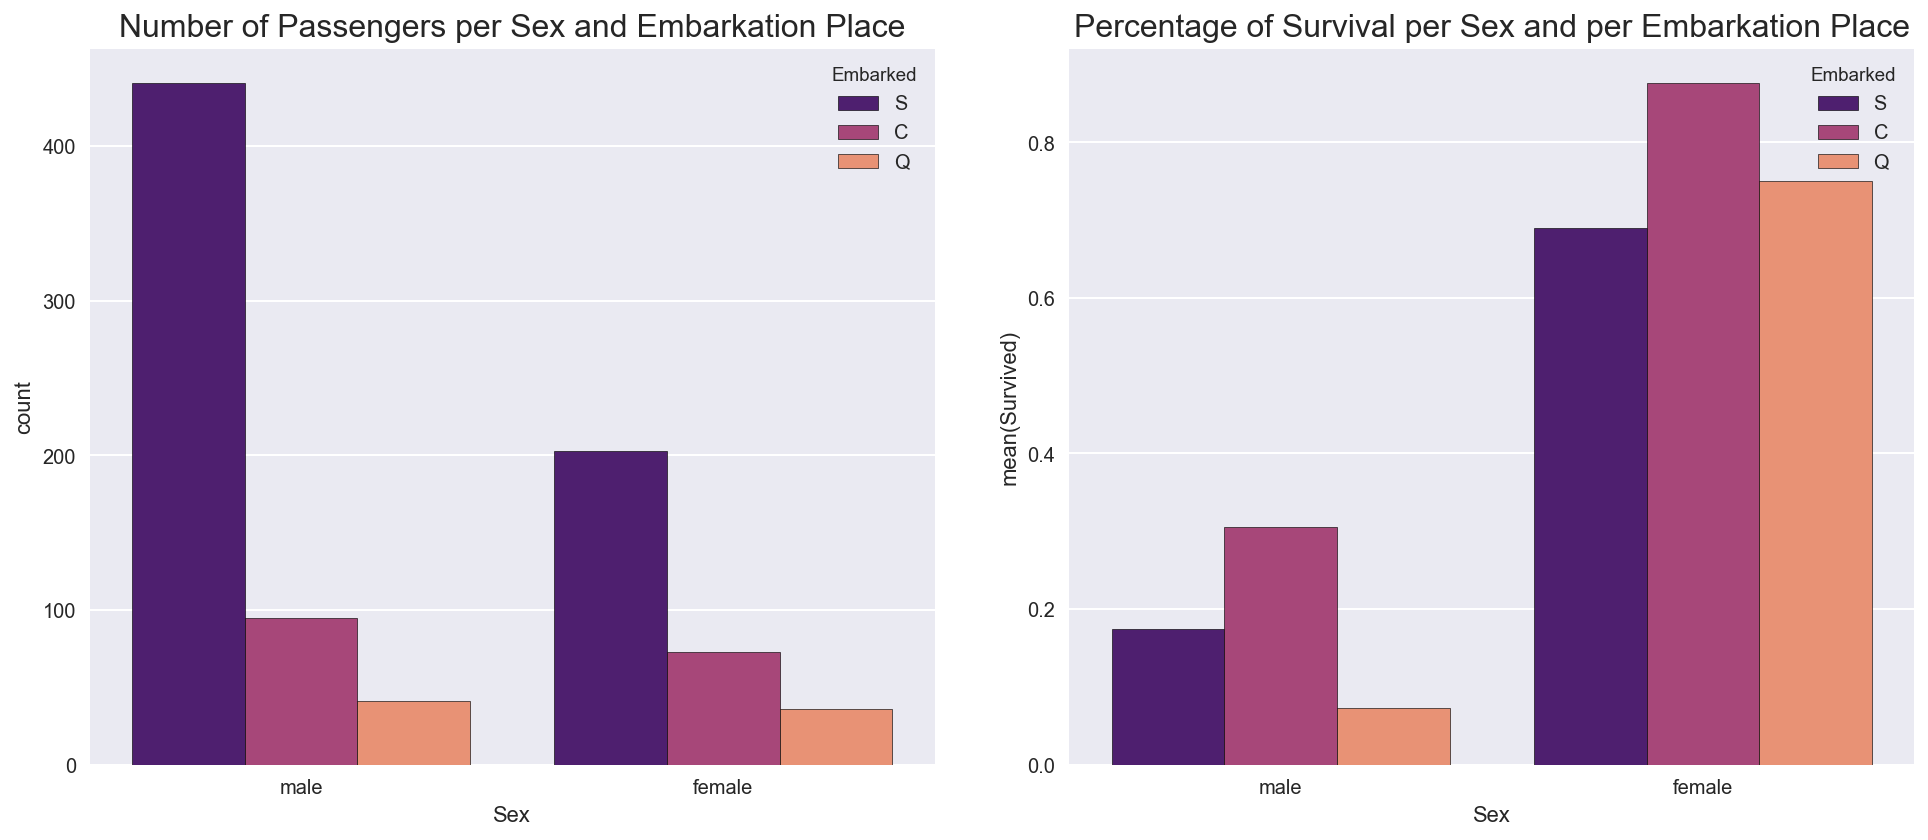

The p-value of the difference of the variable Survived in relation with Embarkation Point is:
1.514339014290716e-06


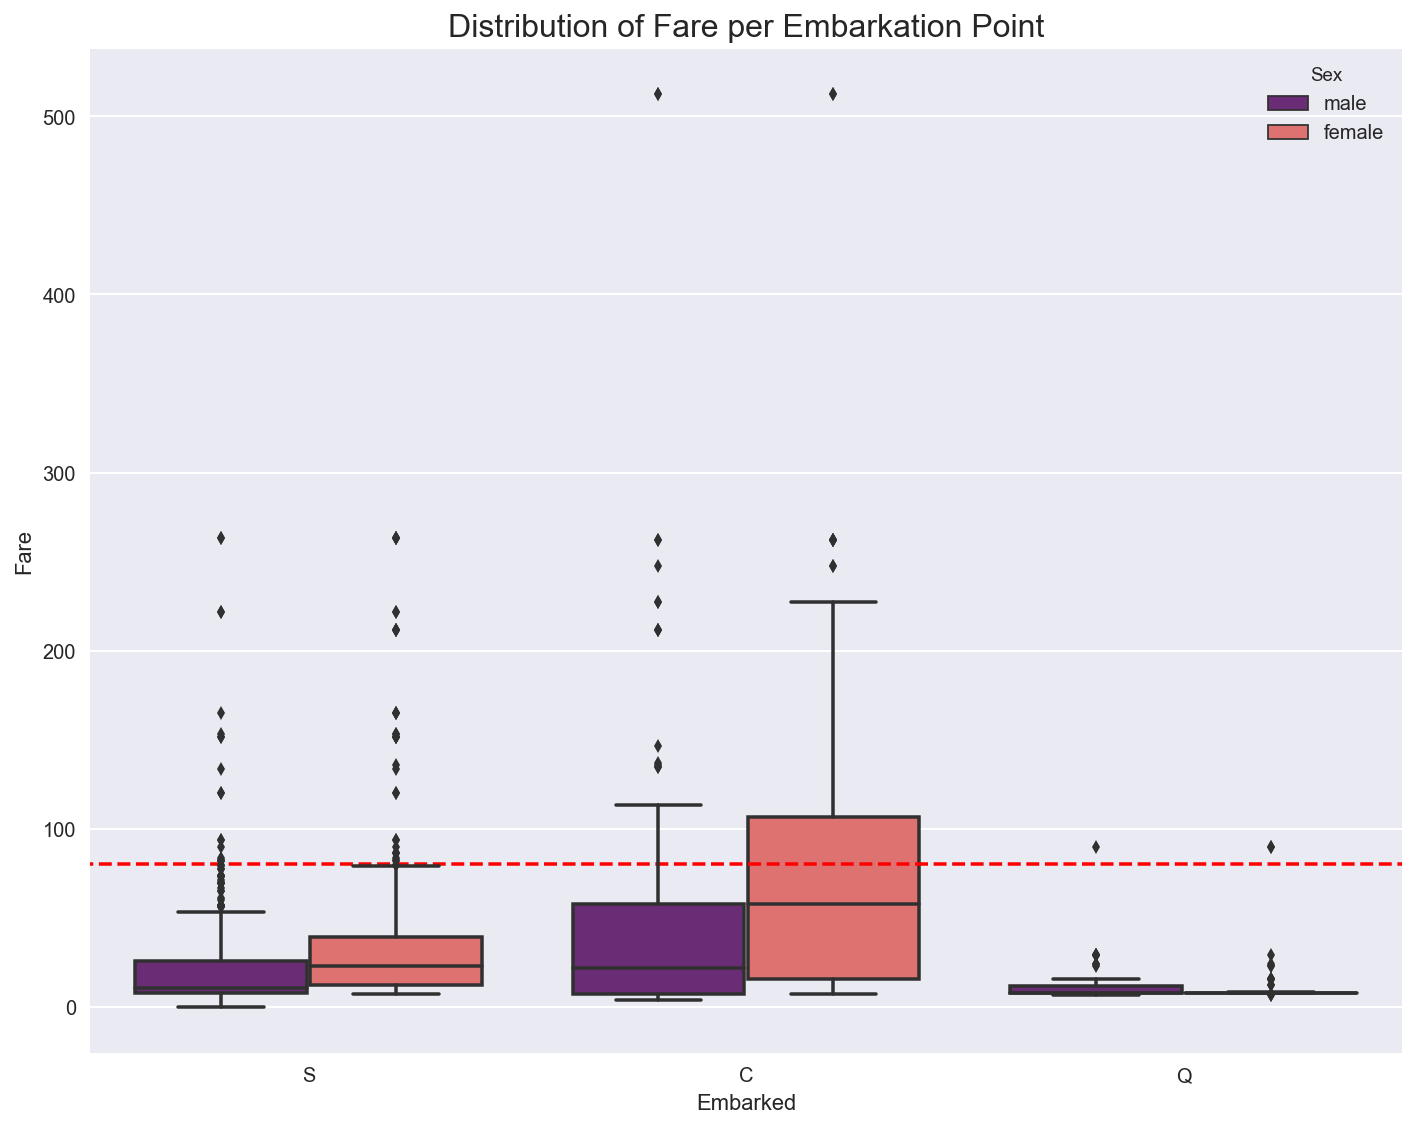

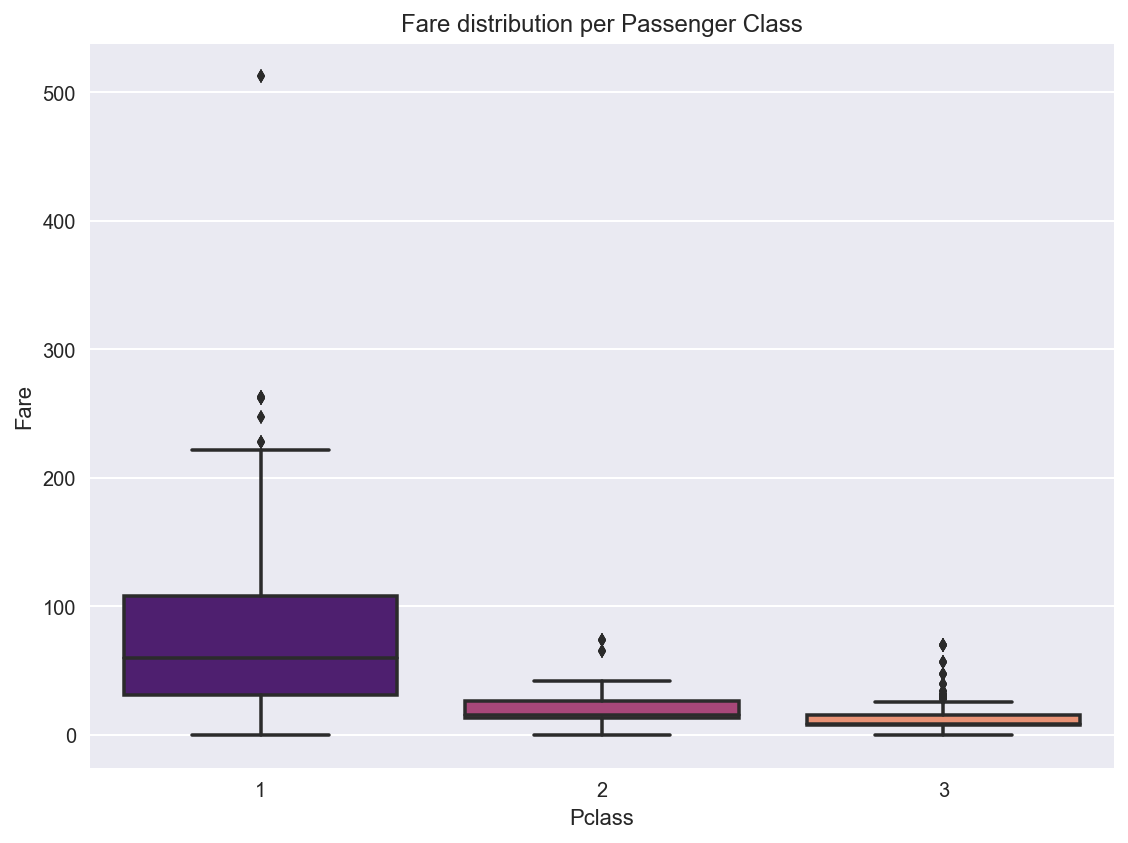

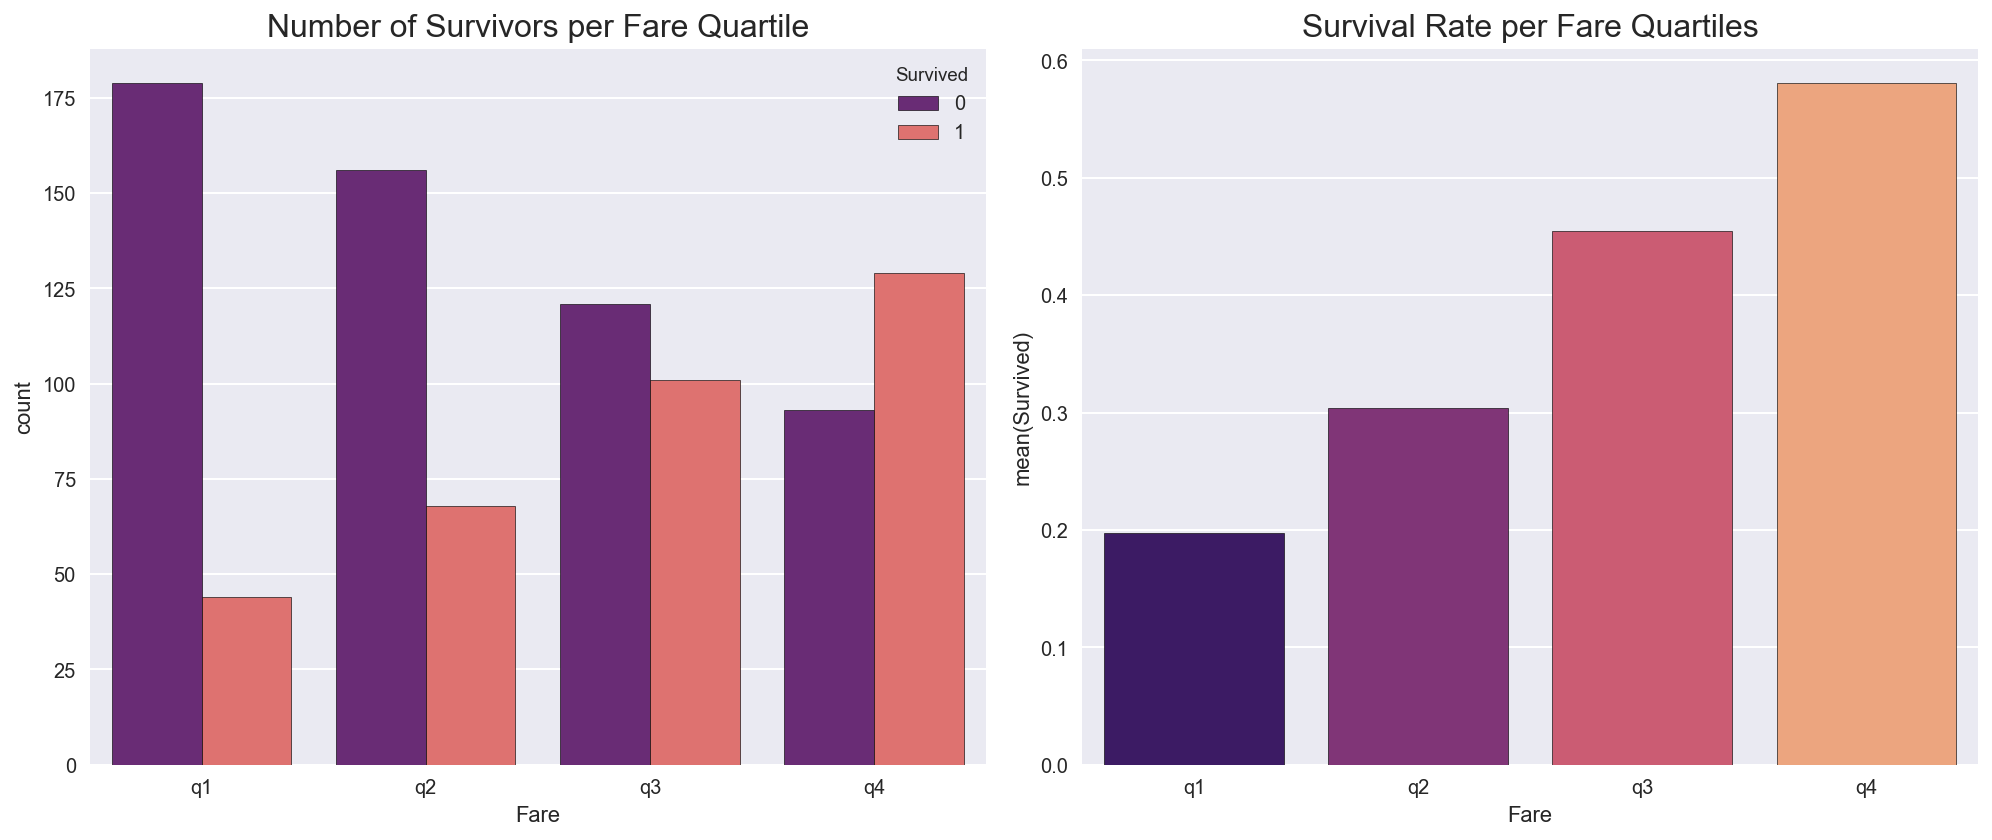

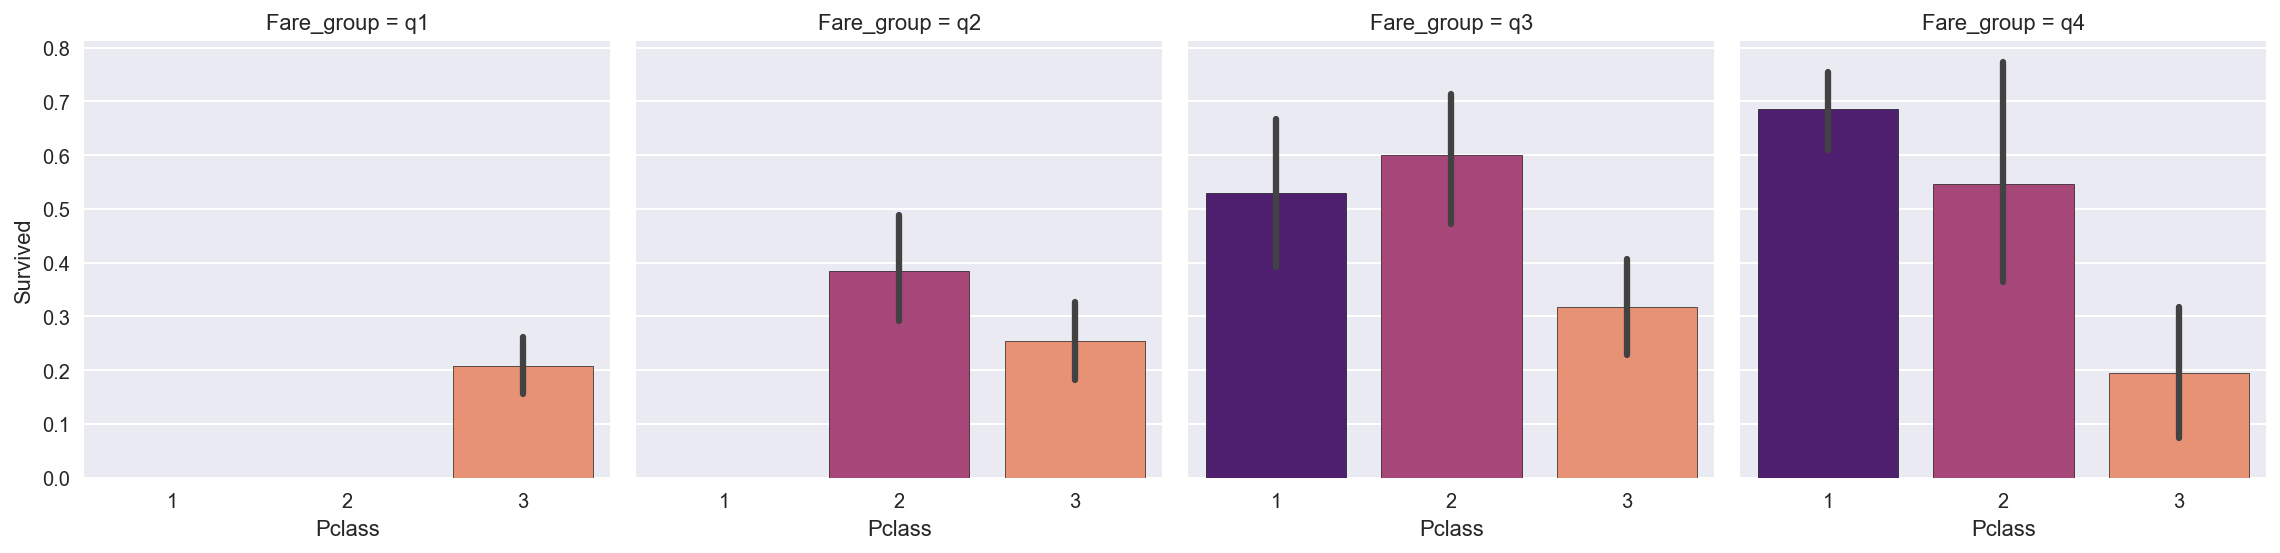

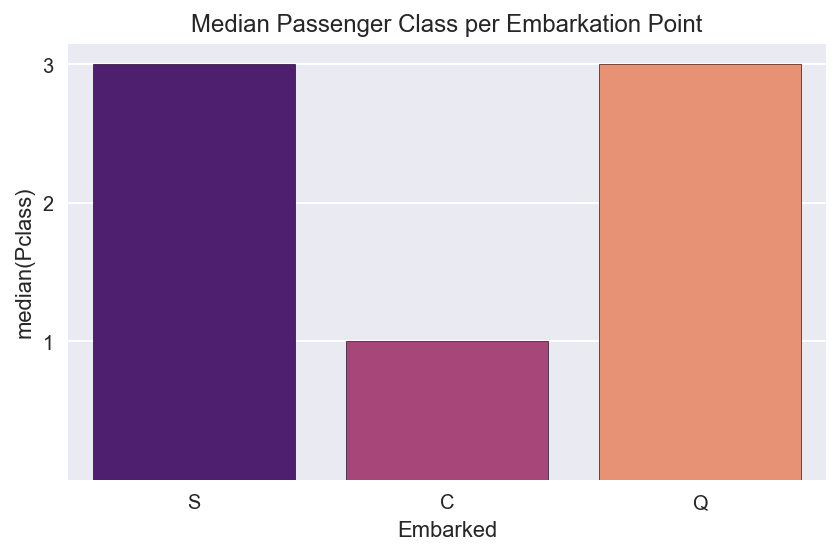

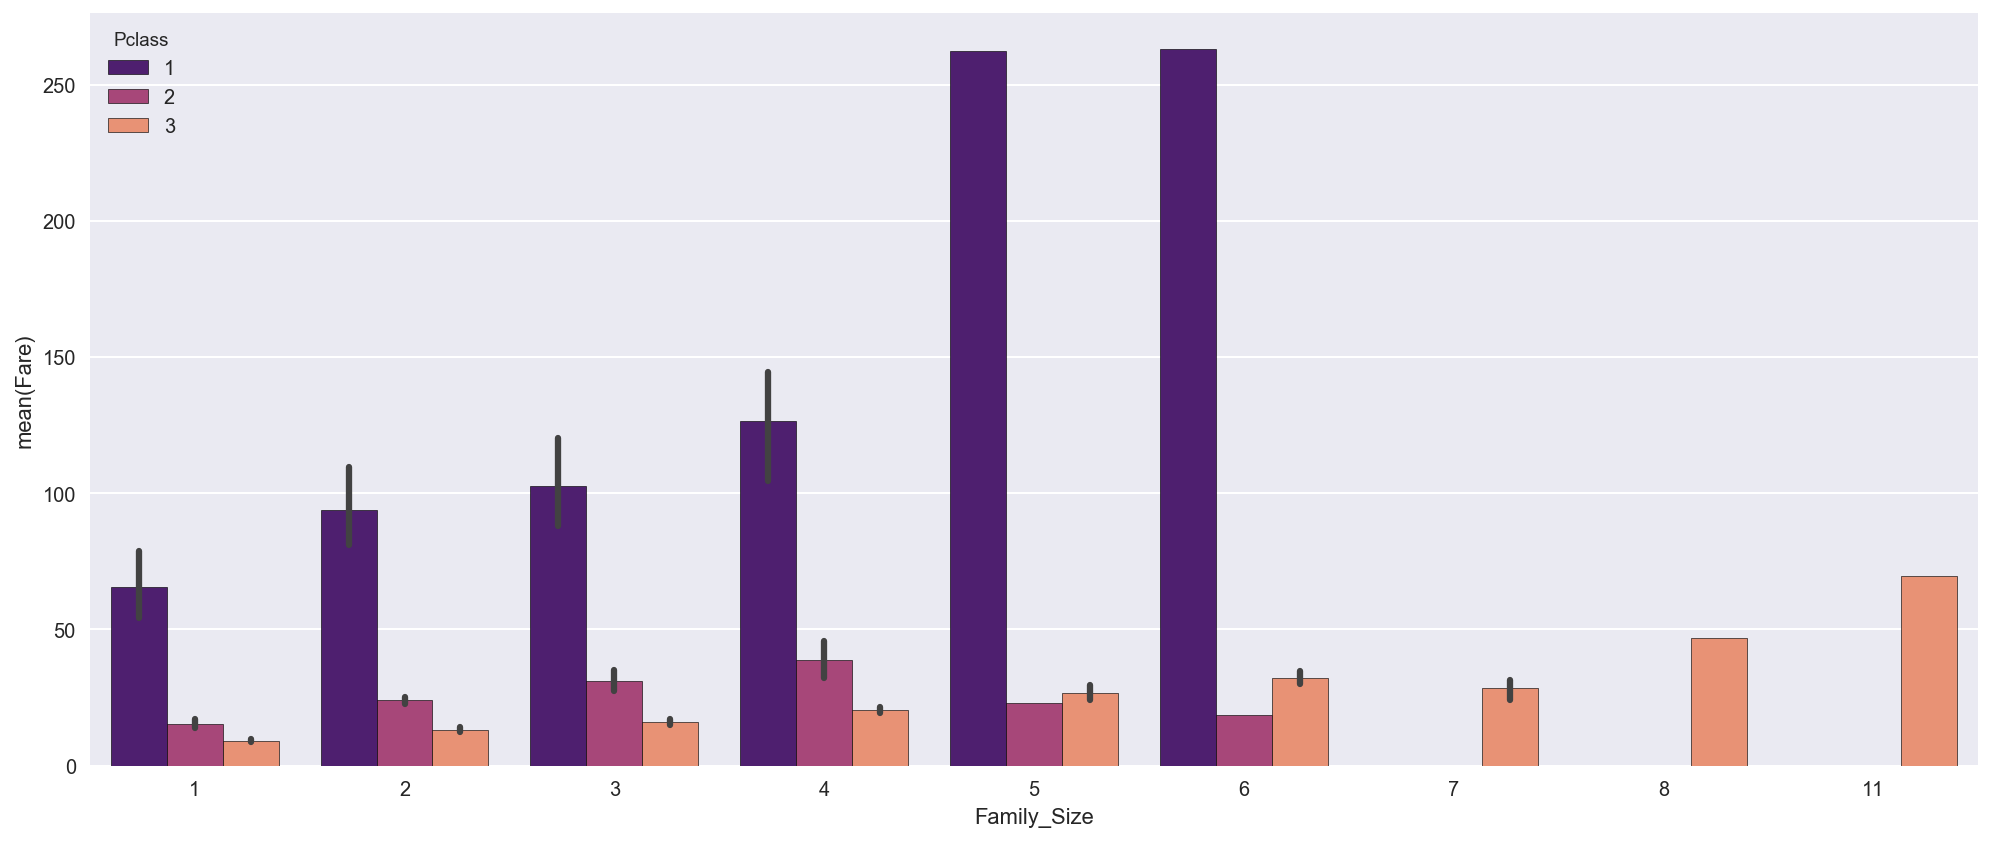

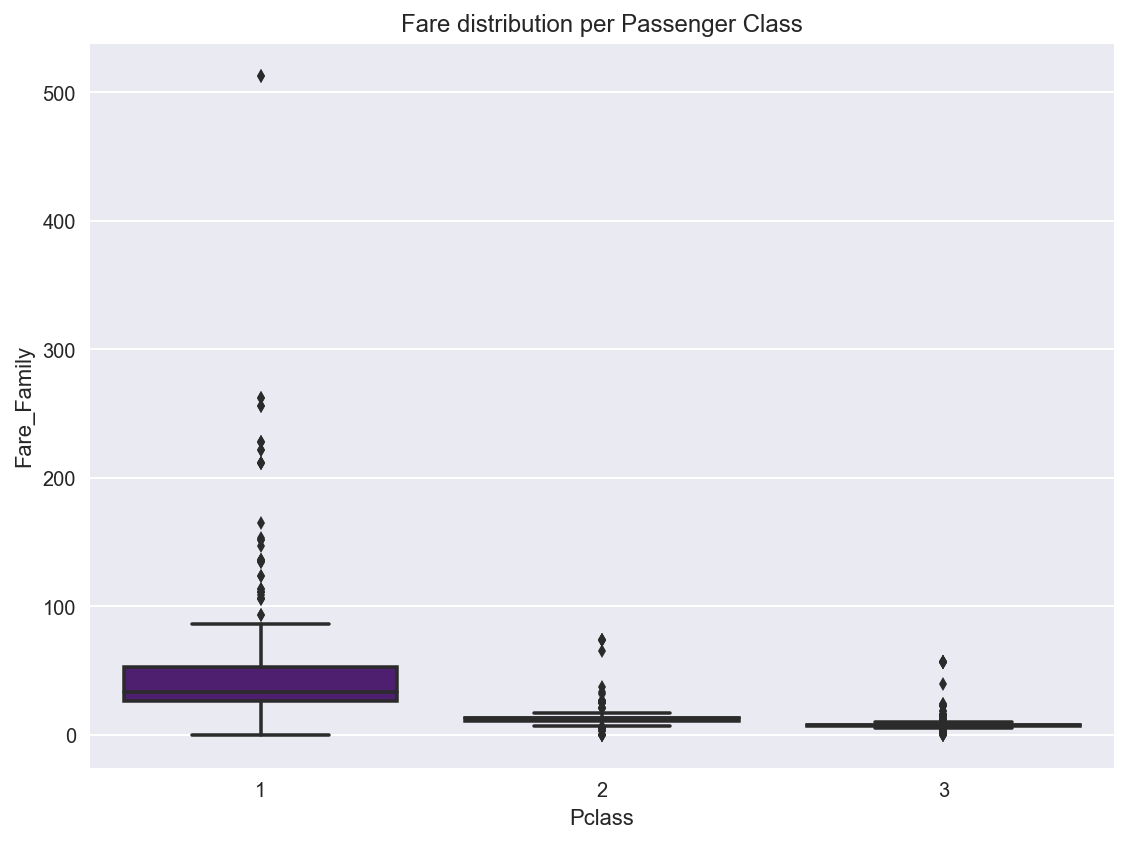

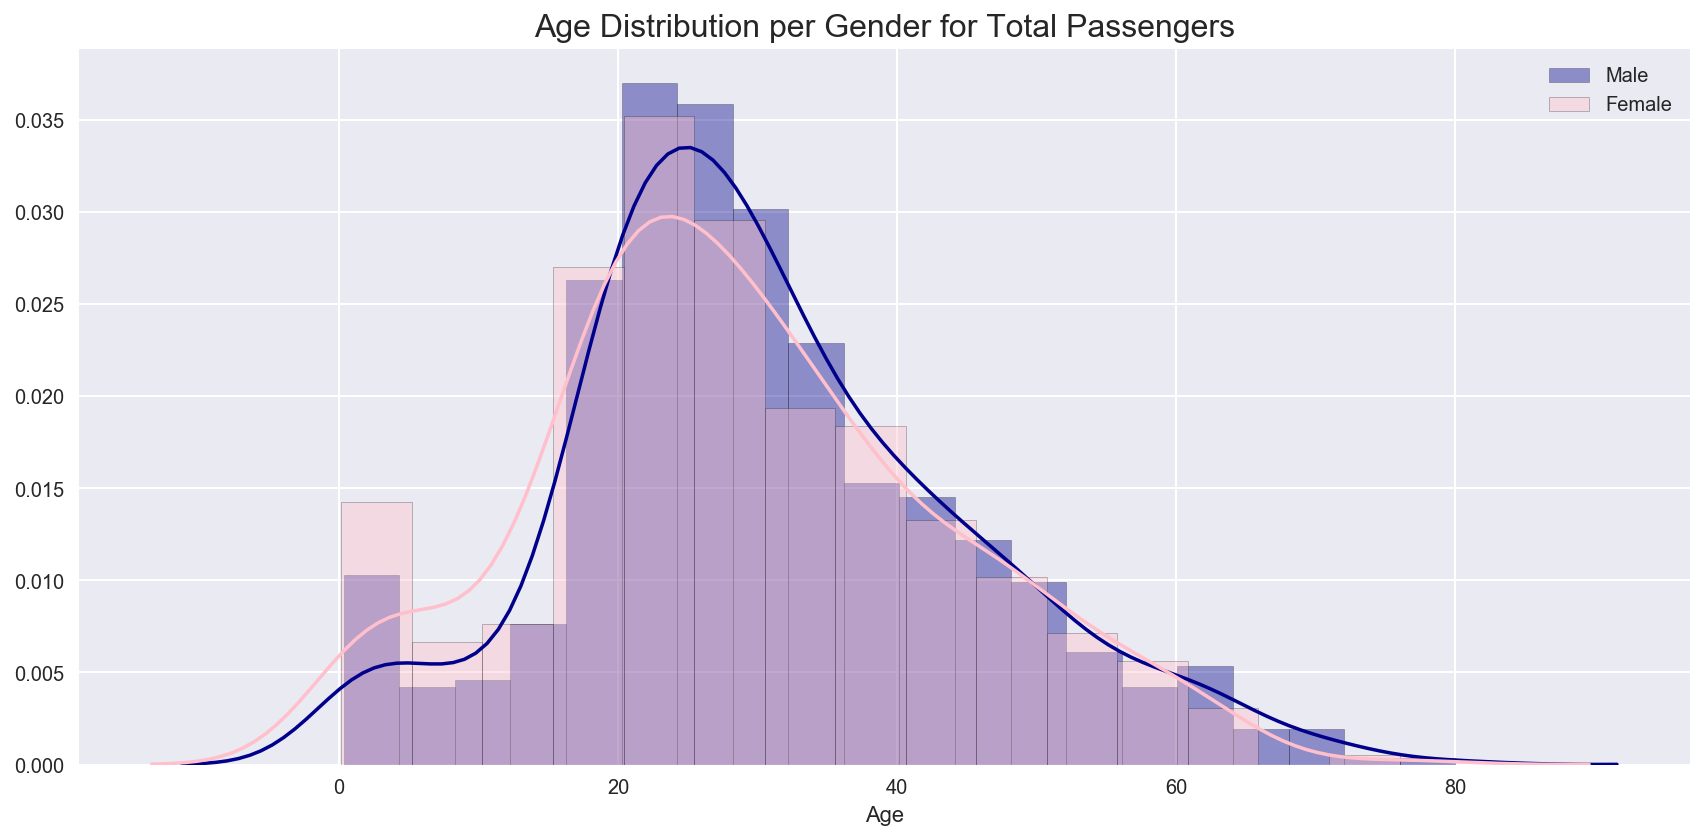

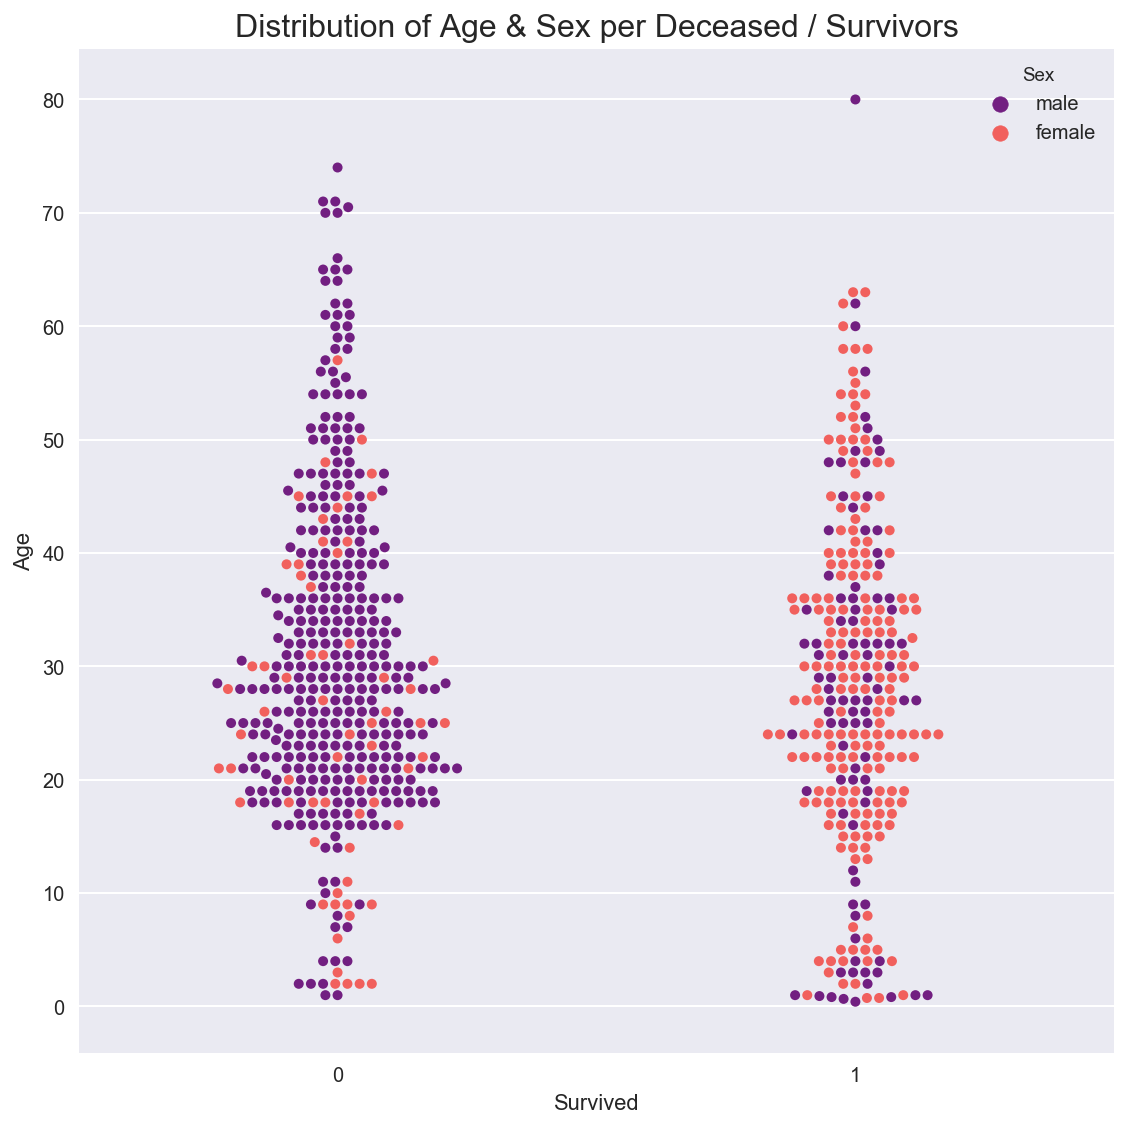

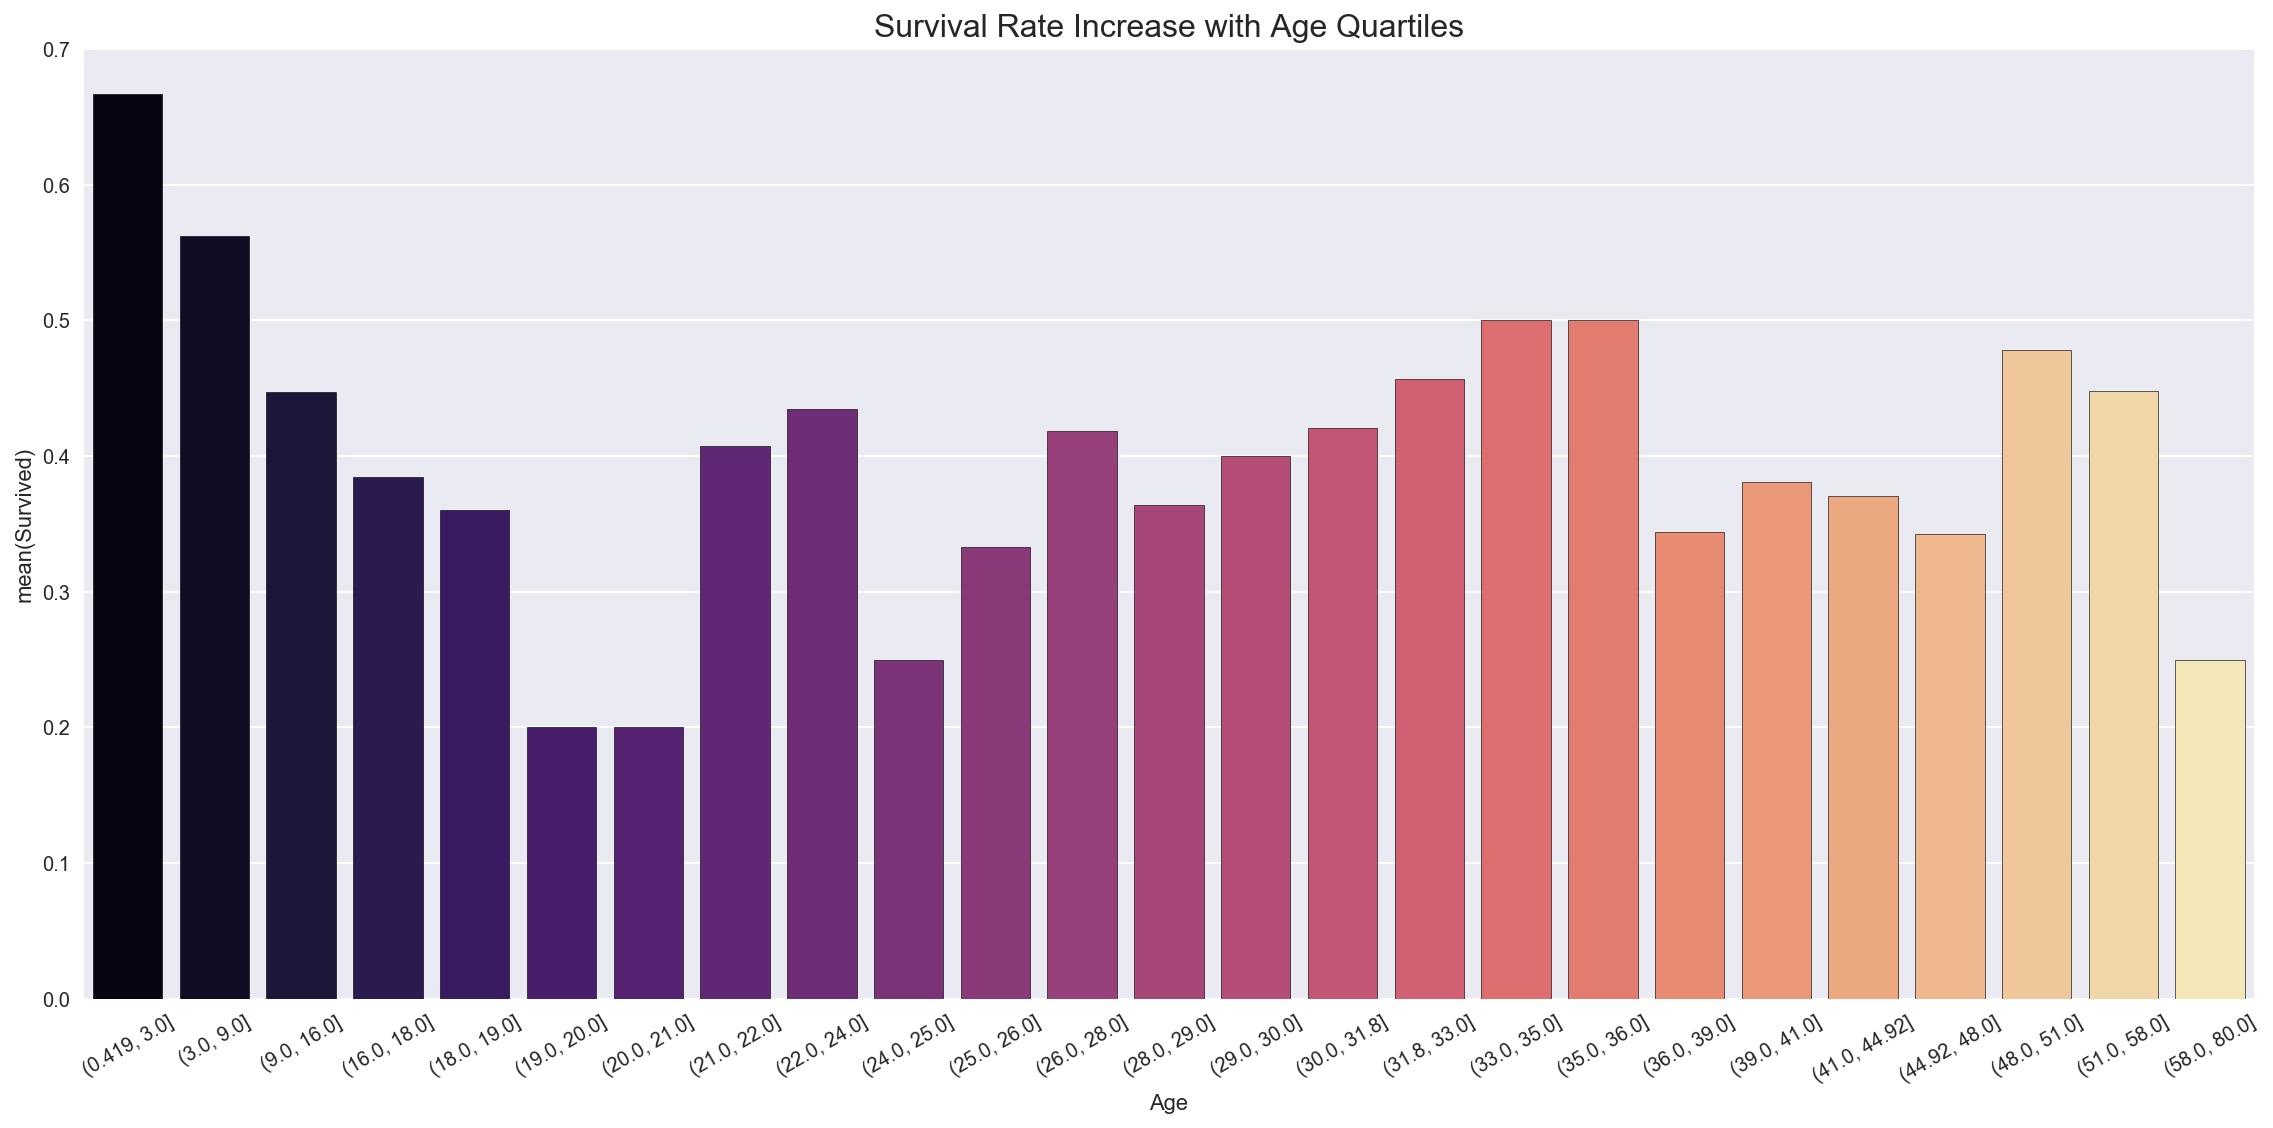

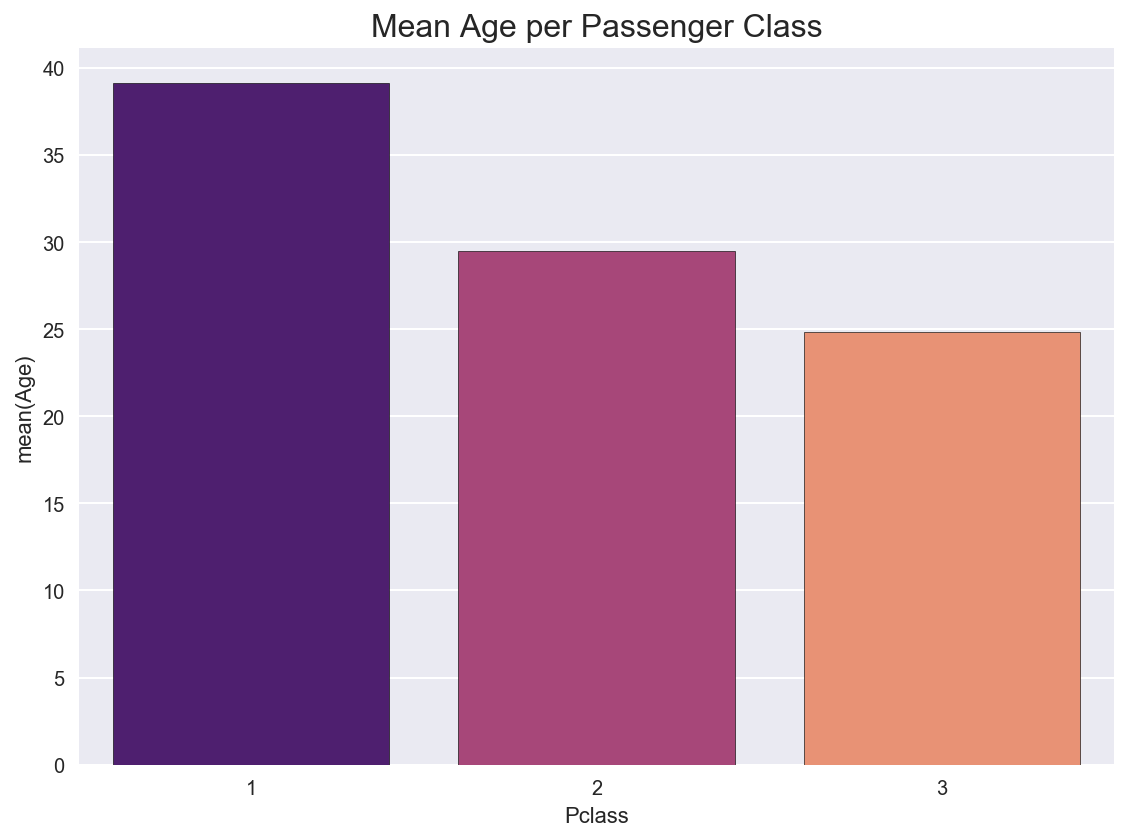

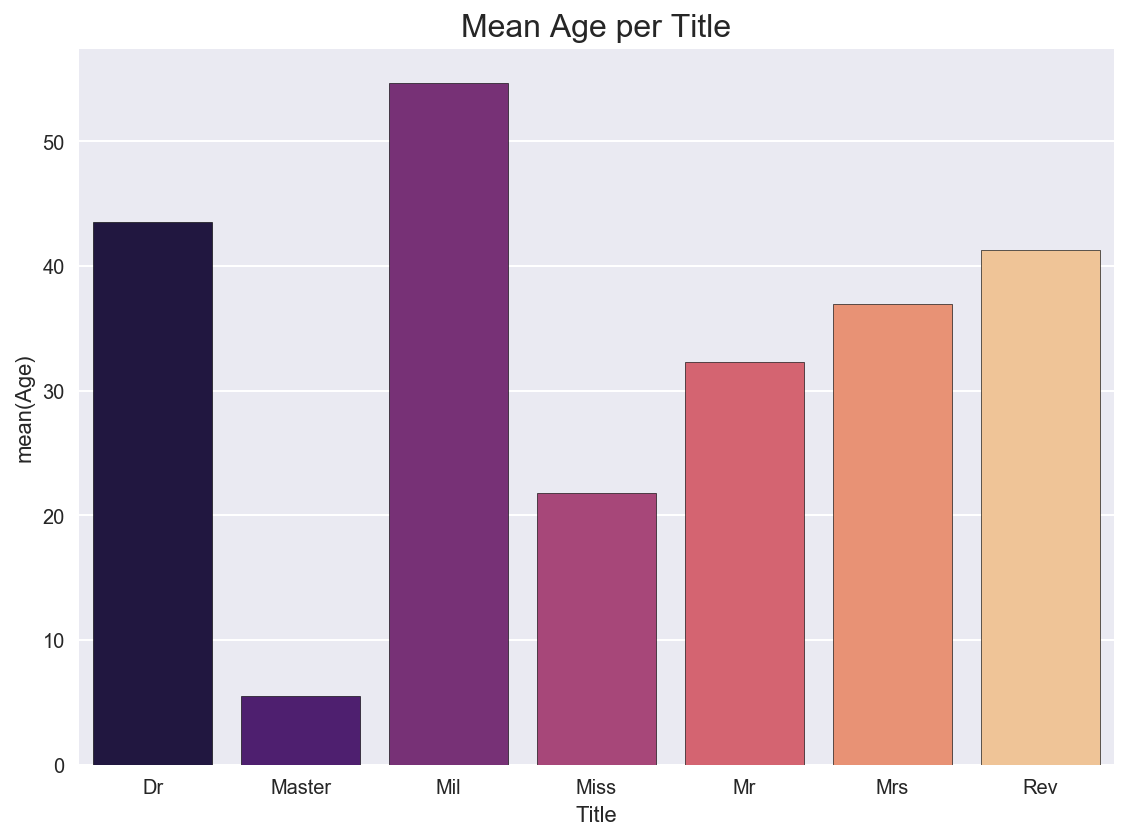

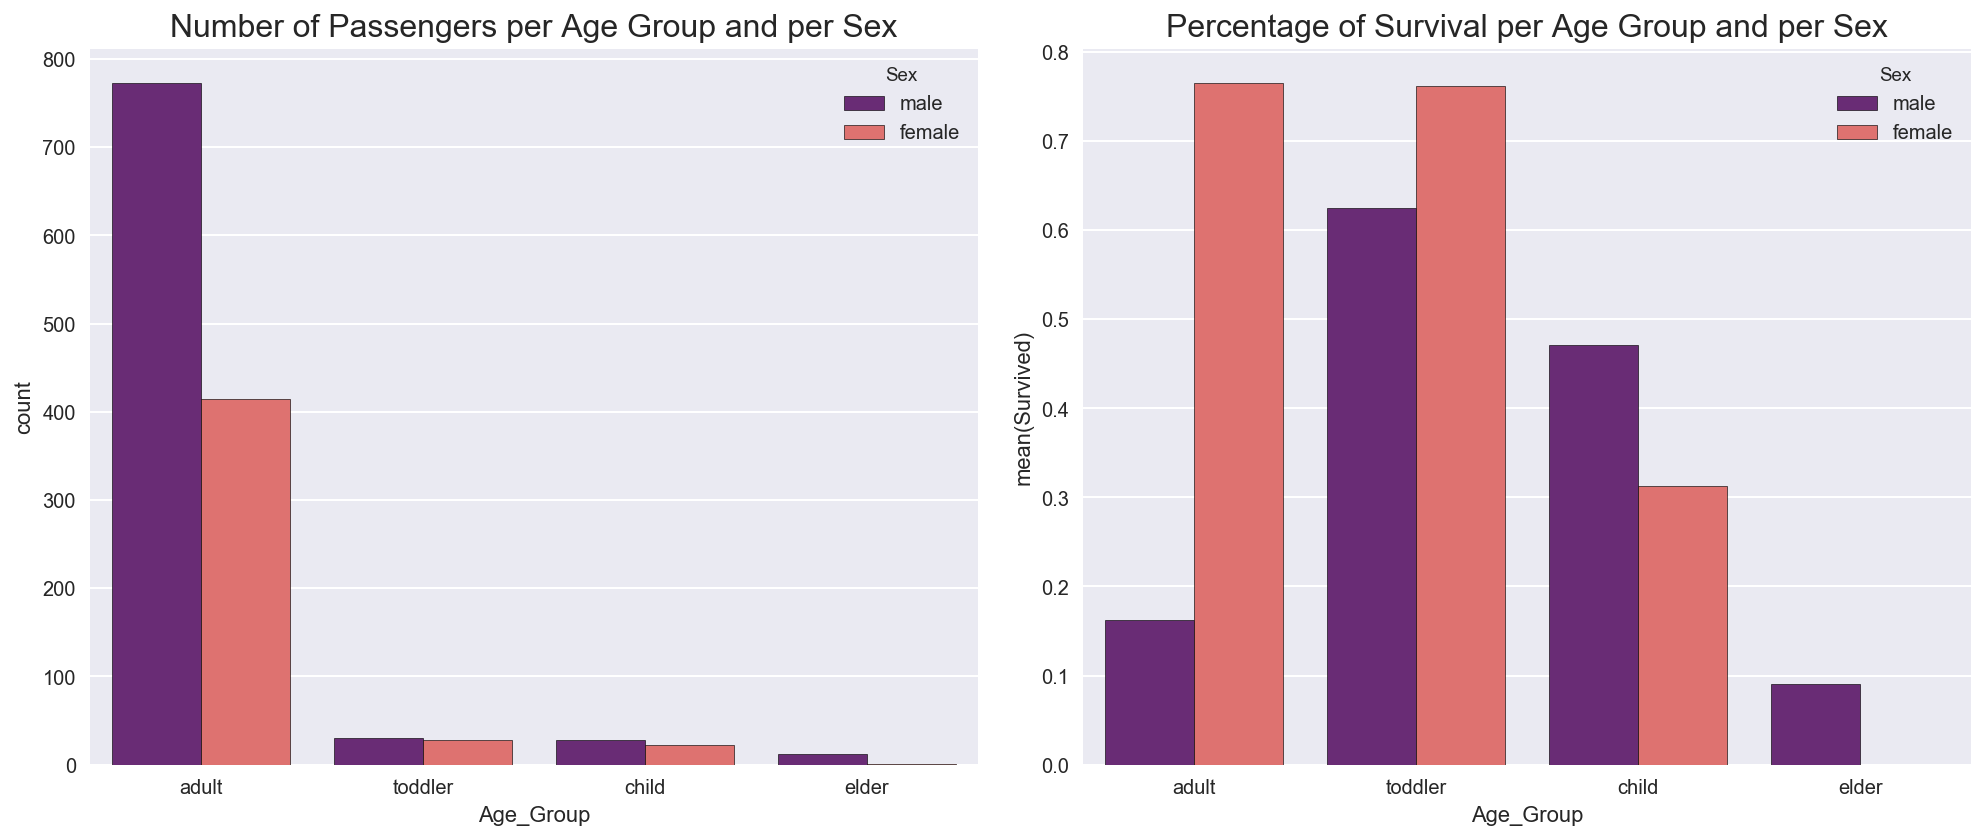

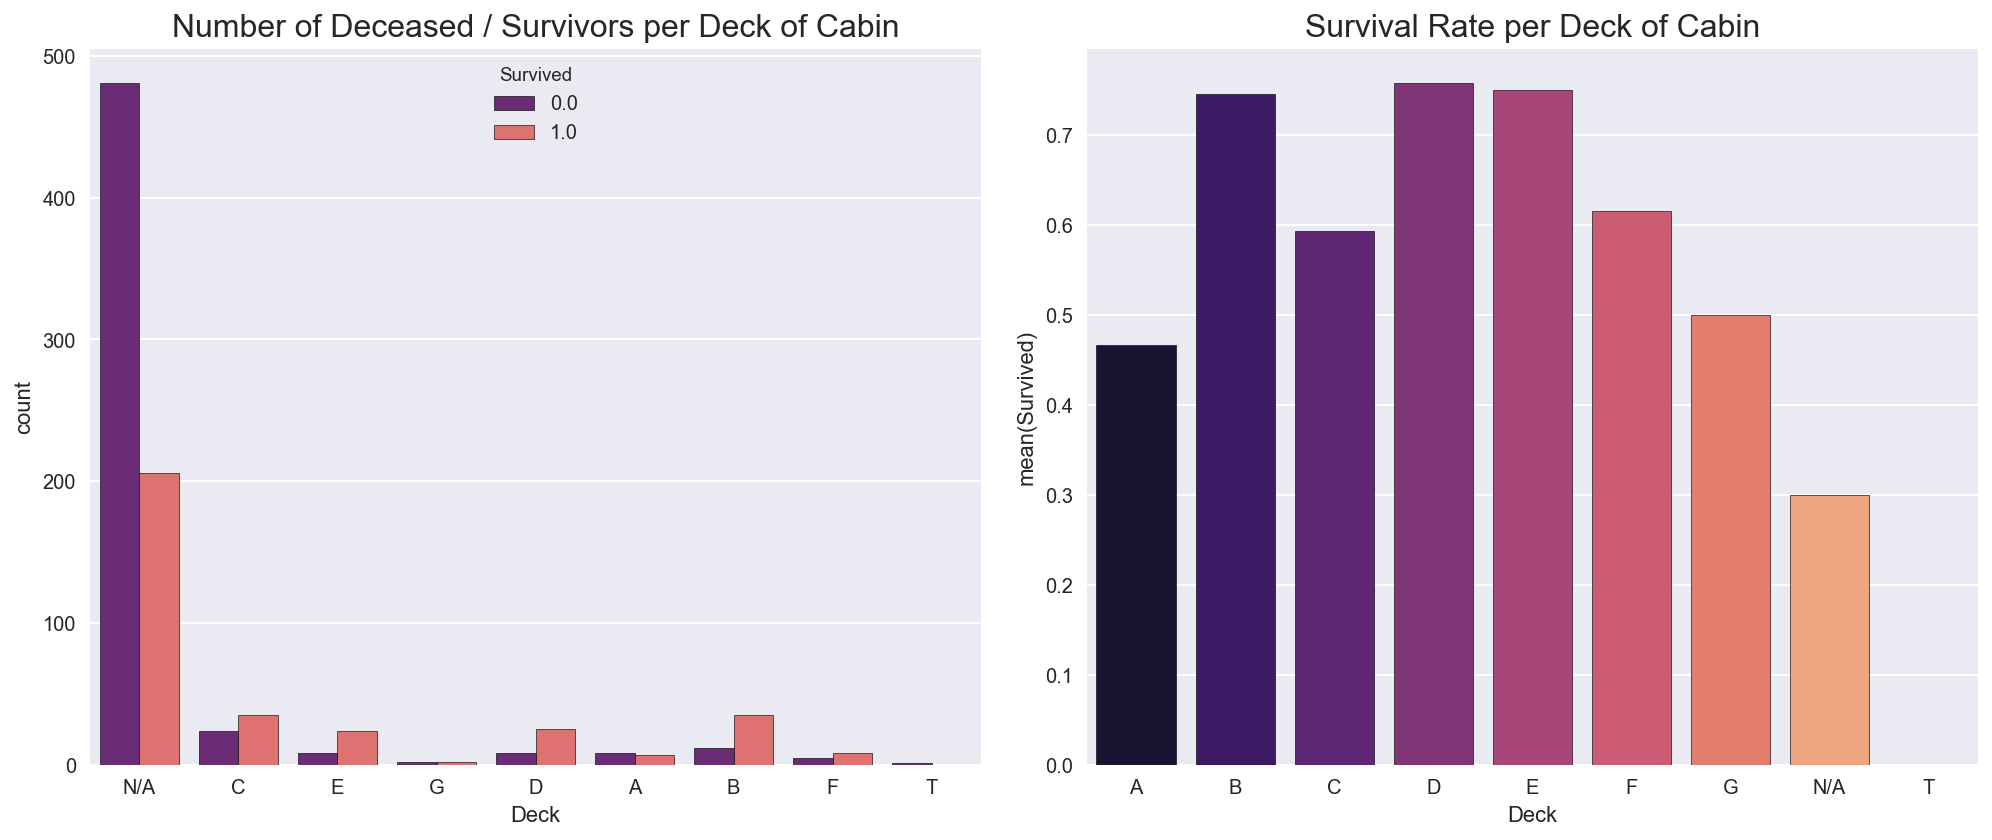

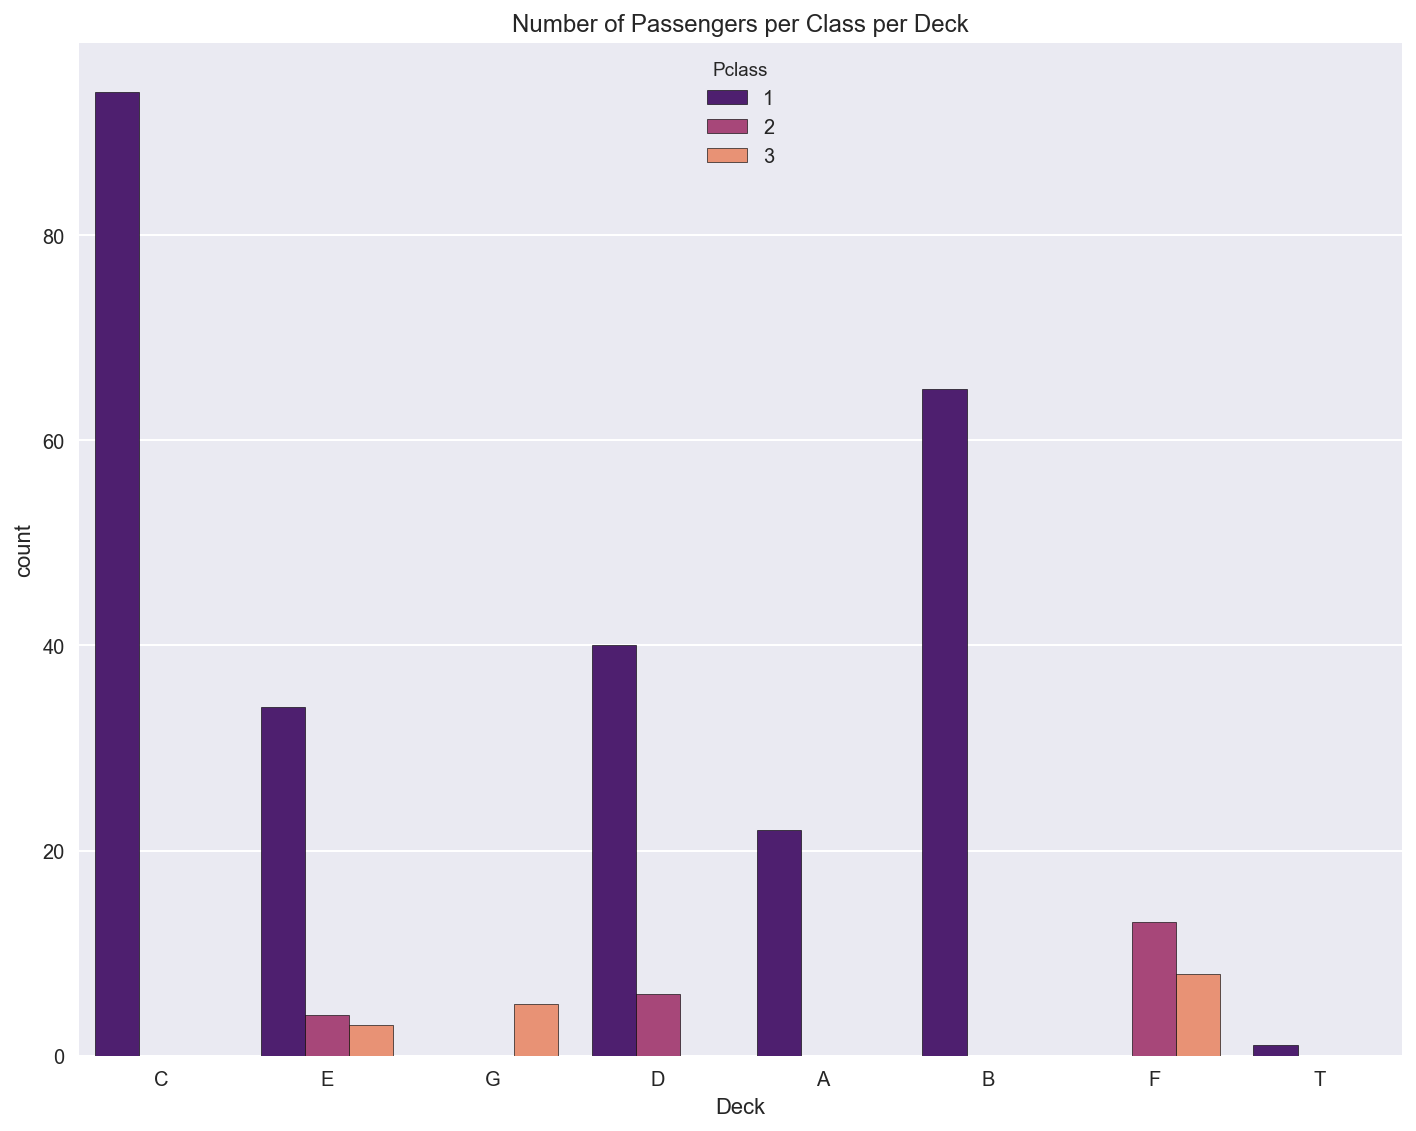

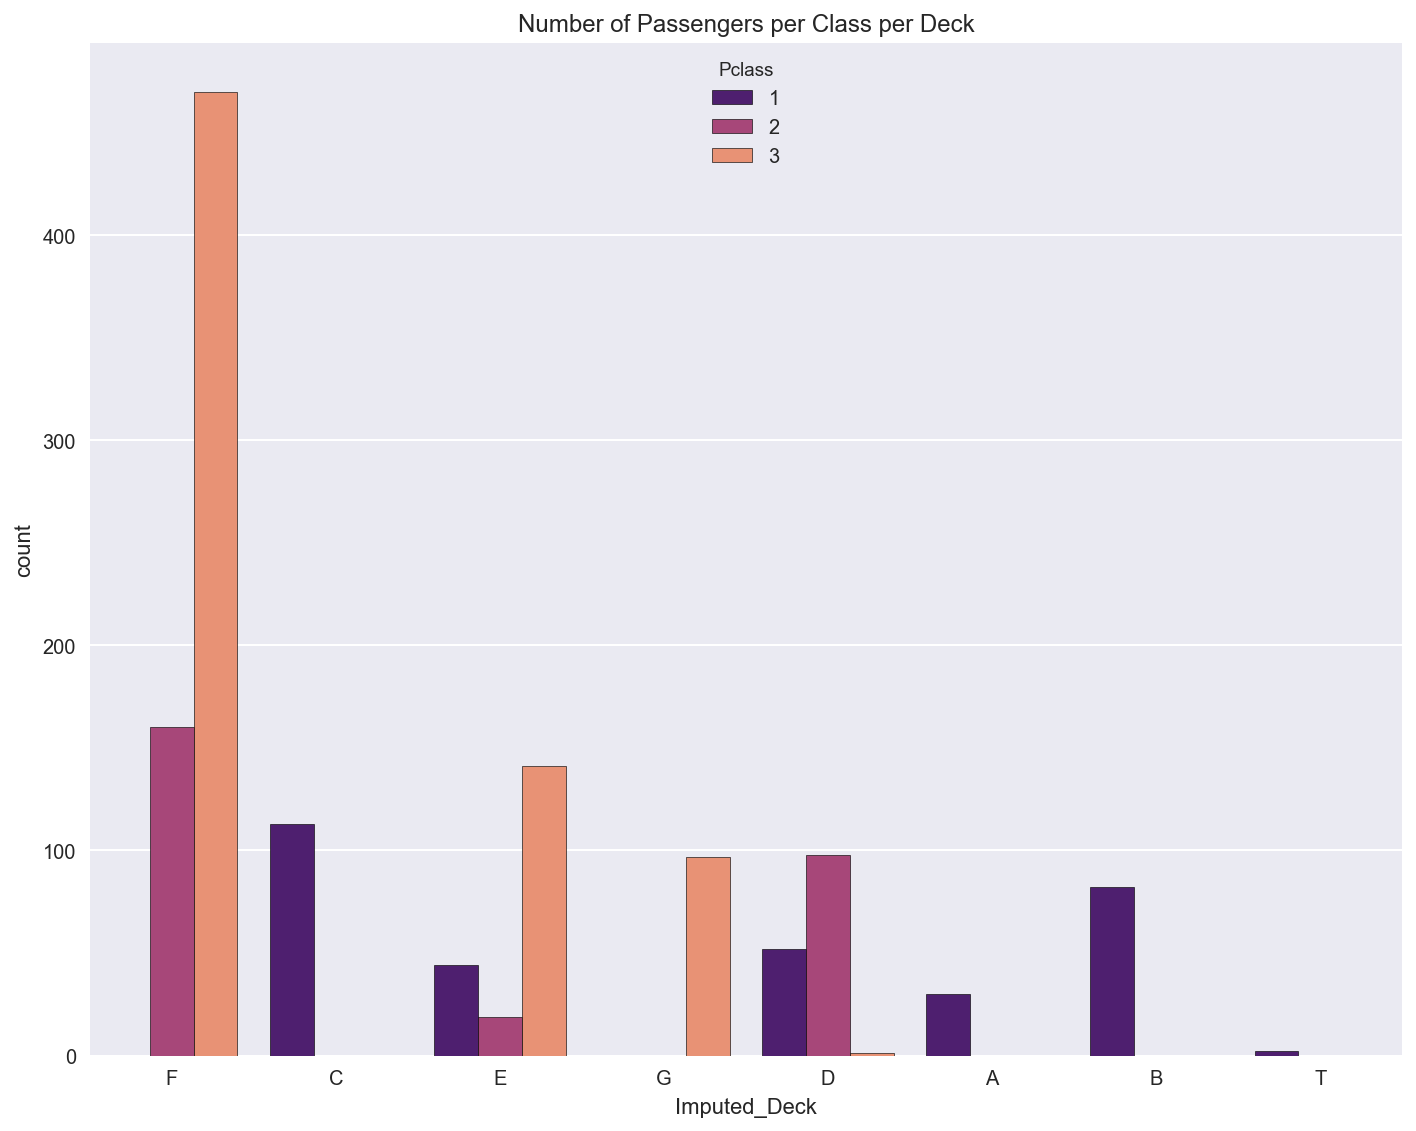

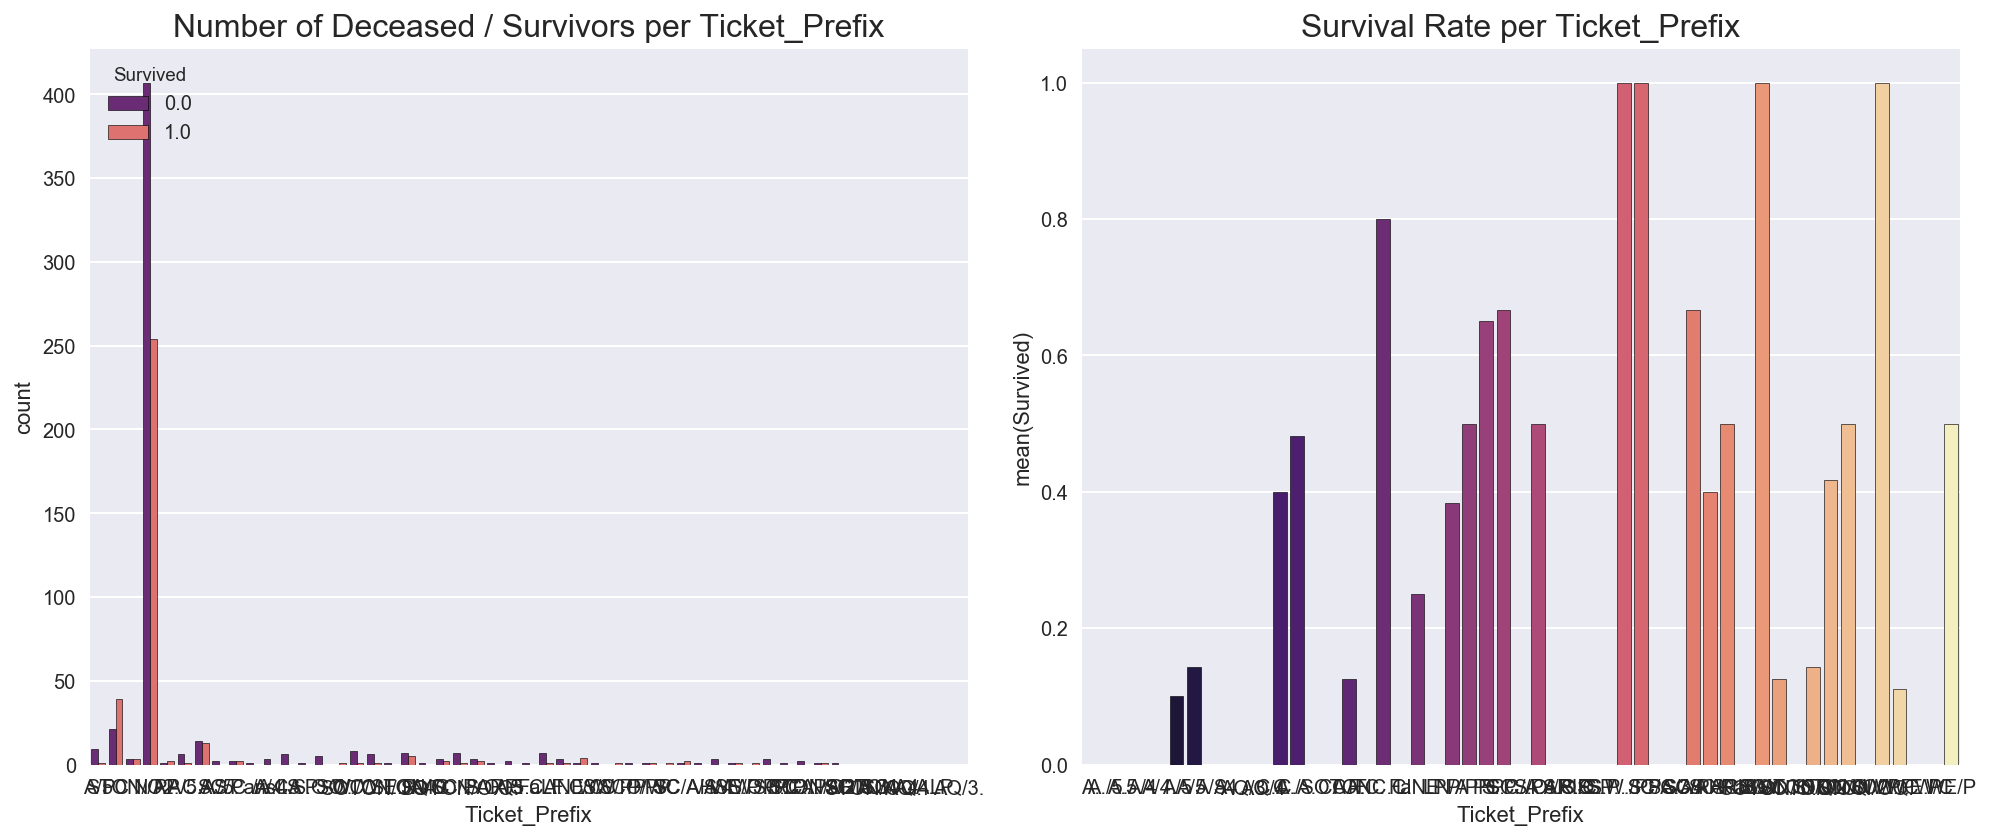

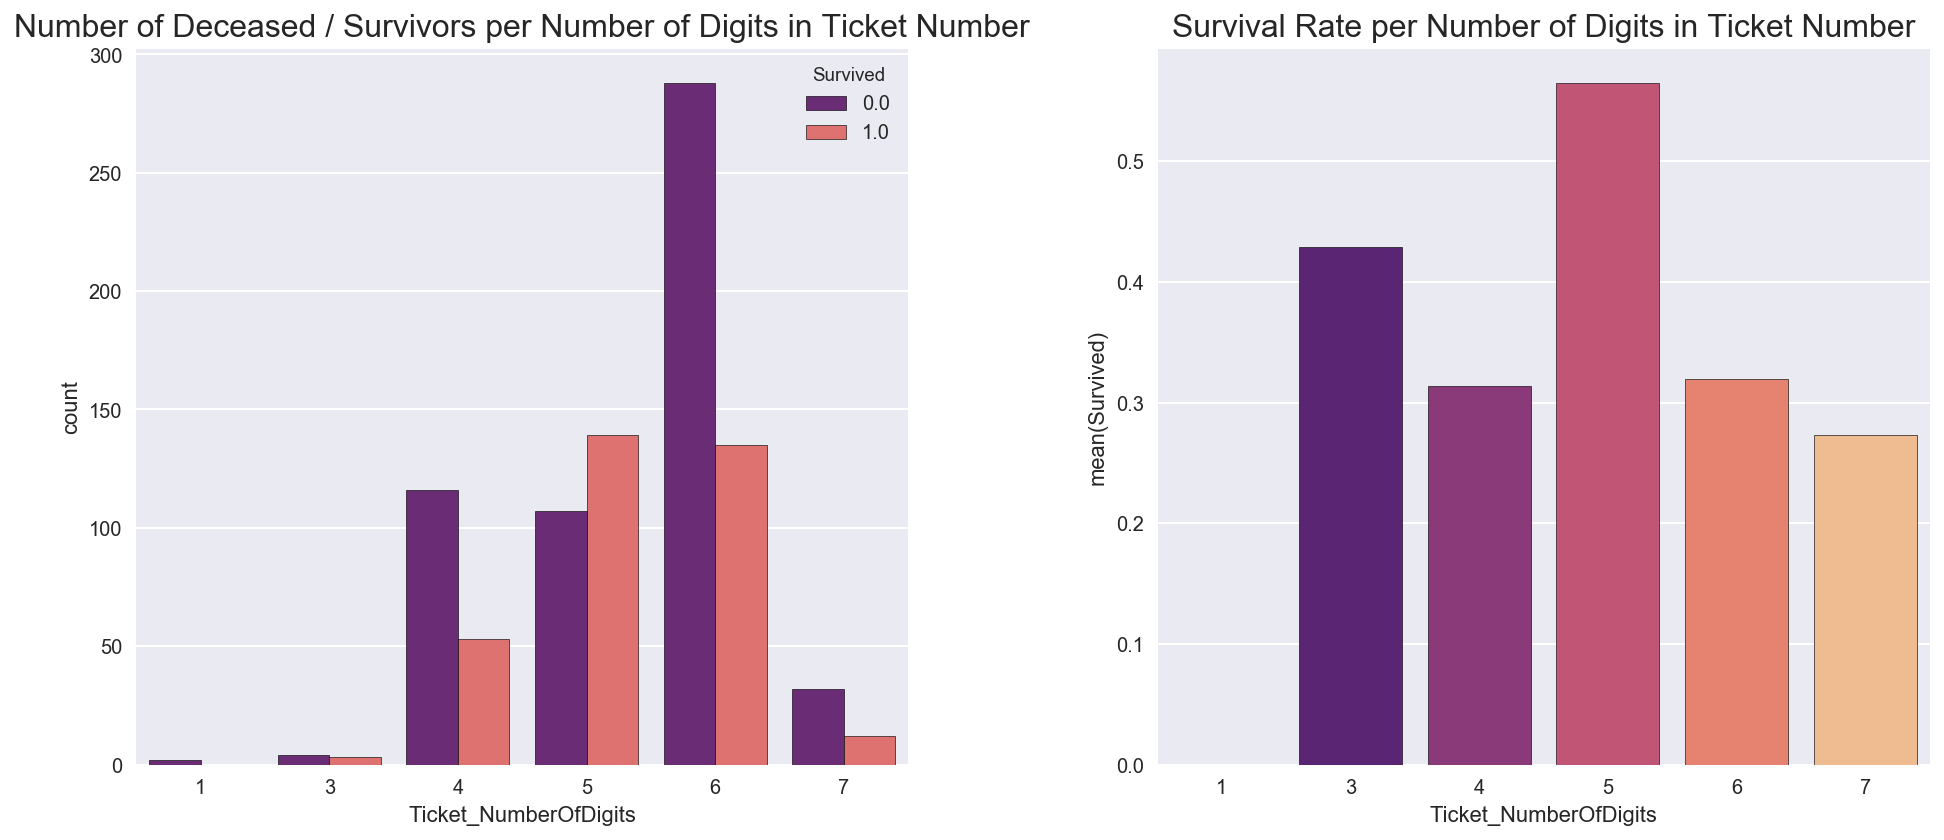

The p-value of the difference of the variable Survived in relation with Ticket_NumberOfDigits is:
1.4564590577219393e-09


Feature_Engineering.ipynb:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "cells": [
Feature_Engineering.ipynb:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  {
Feature_Engineering.ipynb:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "cell_type": "markdown",
Feature_Engineering.ipynb:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "metadata": {},
Feature_Engineering.ipynb:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "source": [
Feature_Engineering.ipynb:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "# The Titanic Dataset\n",


In [1]:
%run I_Feature_Engineering.ipynb

# Machine Learning
## Run Machine Learning Classifiers

Training set consists of 891 observations and 11 features.
Test set consists of 418 observations and 11 features.


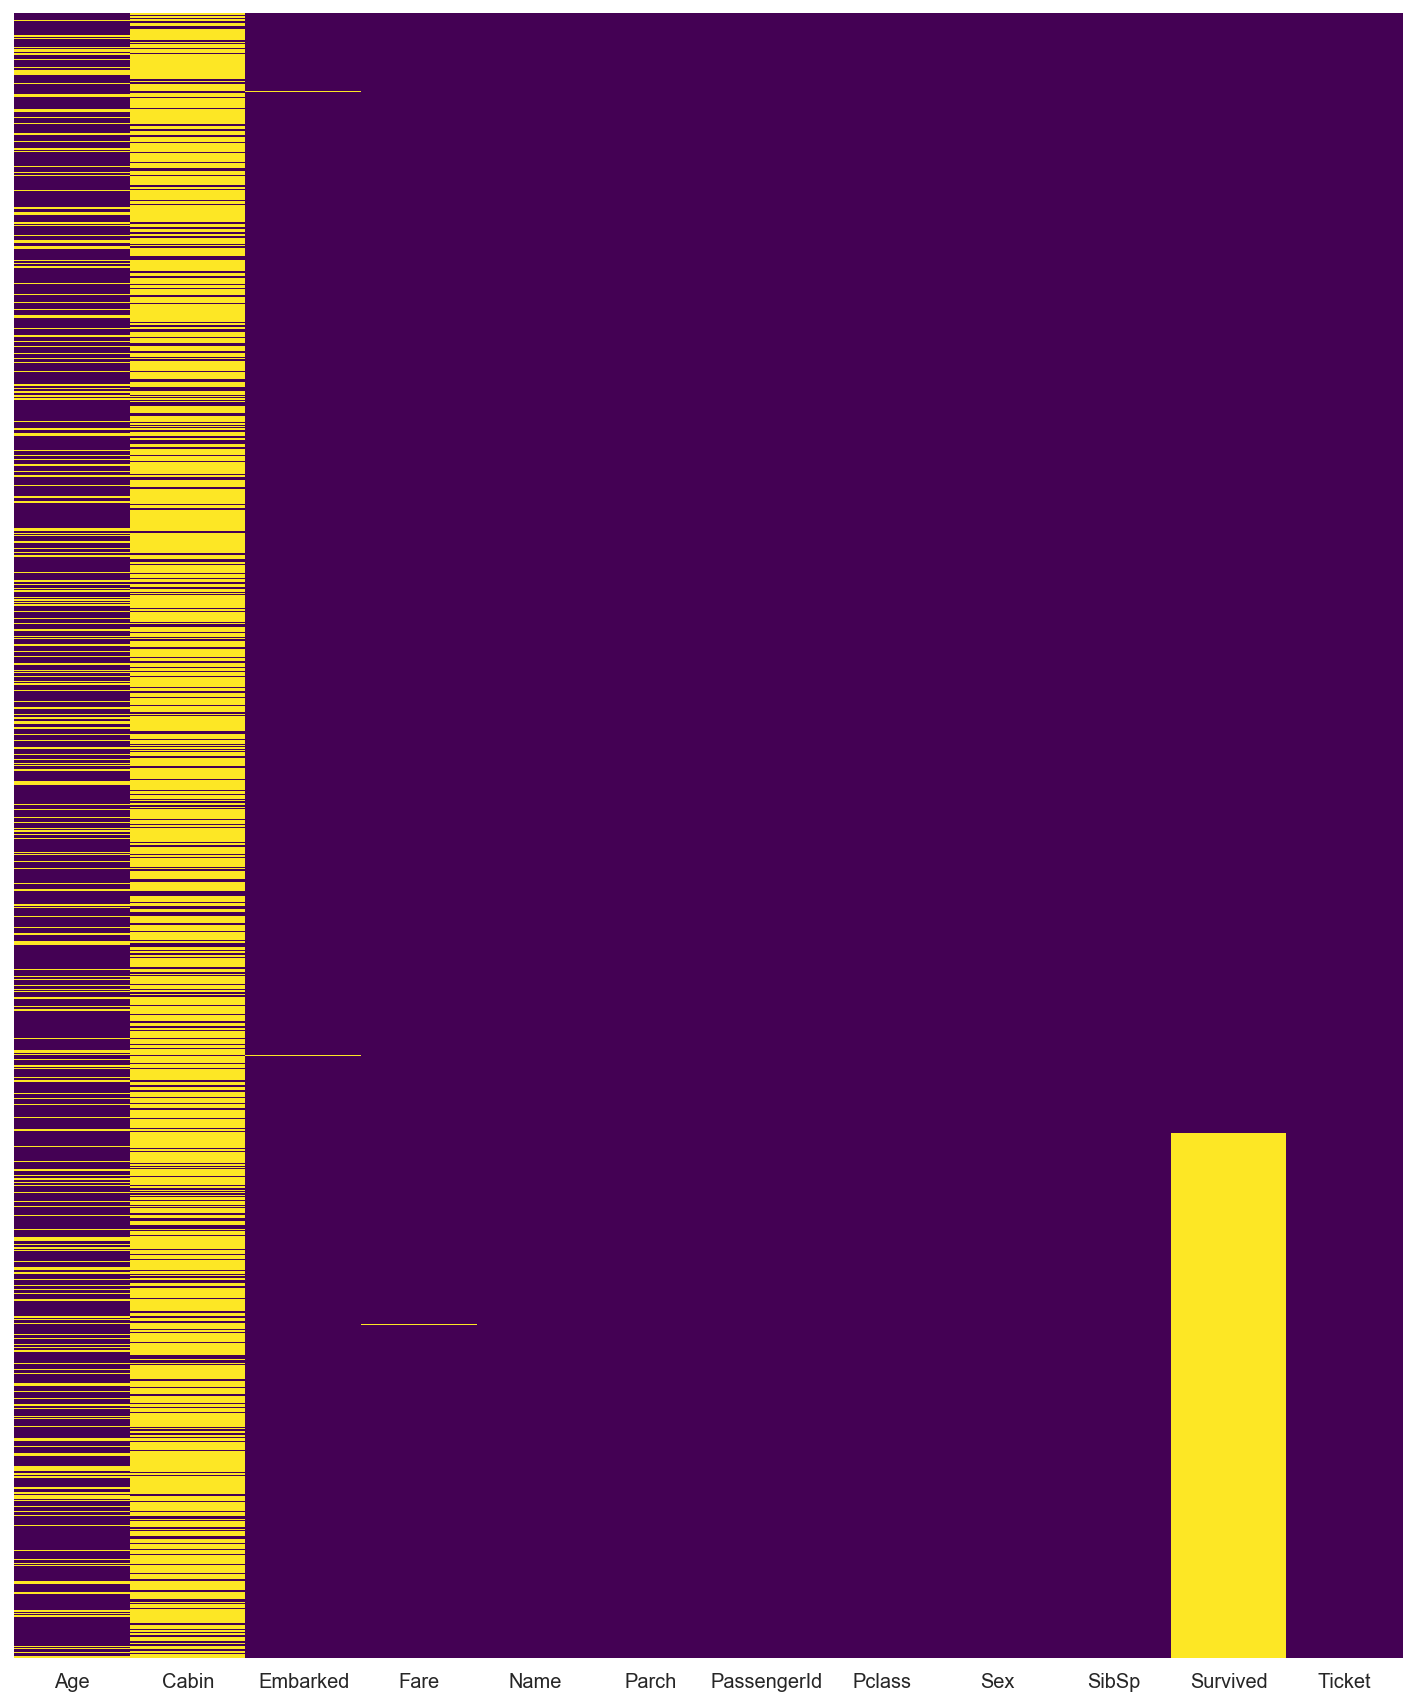

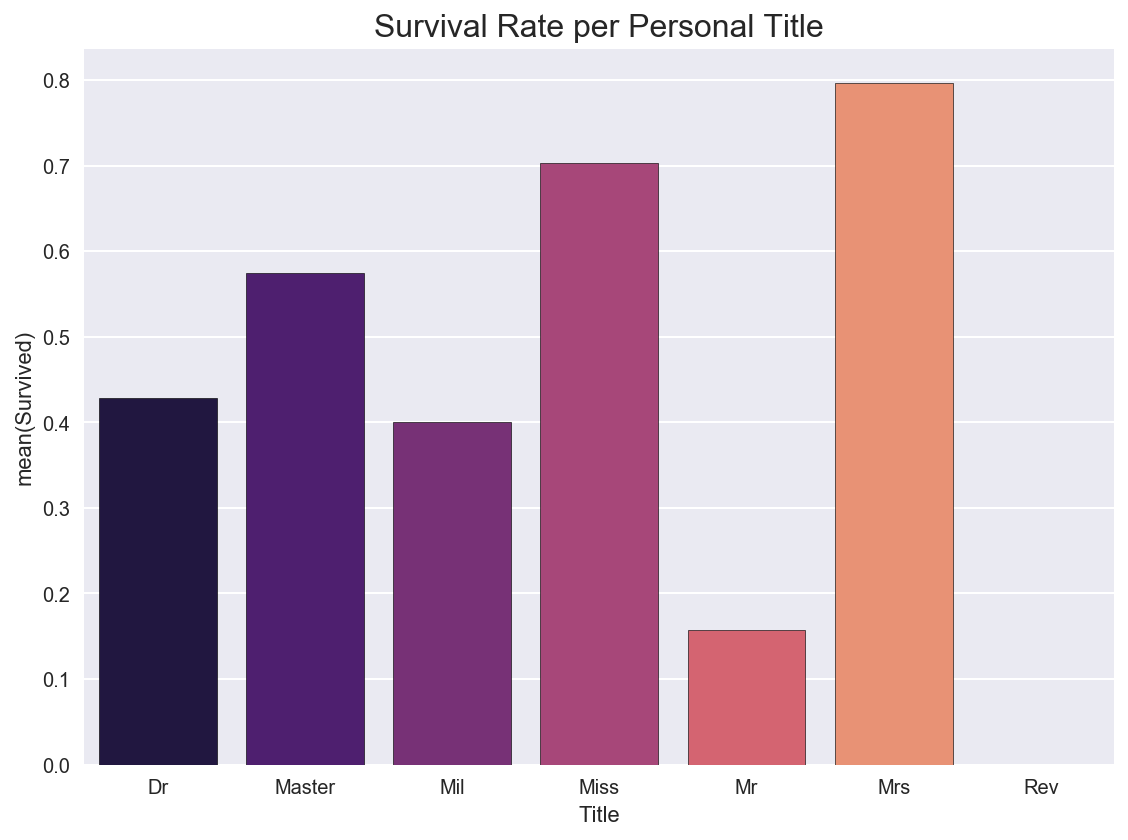

Feature_Engineering.ipynb:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  {
Feature_Engineering.ipynb:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "cell_type": "markdown",
Feature_Engineering.ipynb:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "metadata": {},
Feature_Engineering.ipynb:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "source": [
Feature_Engineering.ipynb:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "# The Titanic Dataset\n",
Feature_Engineering.ipynb:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "## Import Libraries"
Feature_Engineering.ipynb:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ]


The p-value of the difference of the variable Survived in relation with Title is:
1.191650789013299e-73


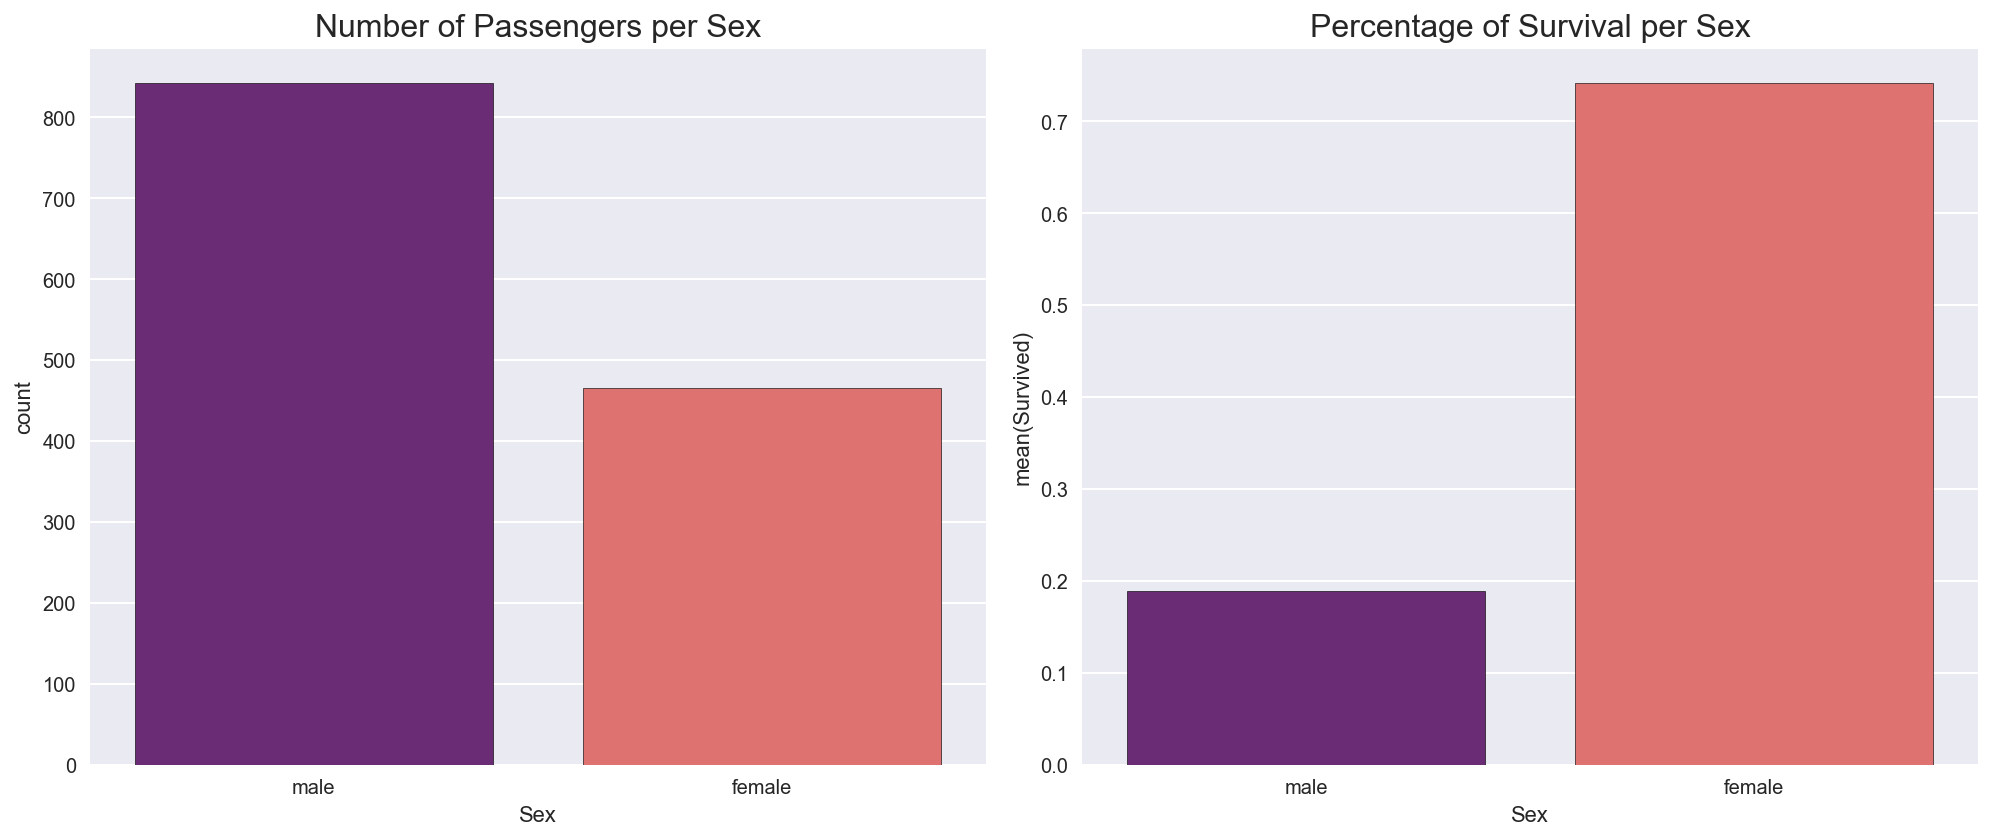

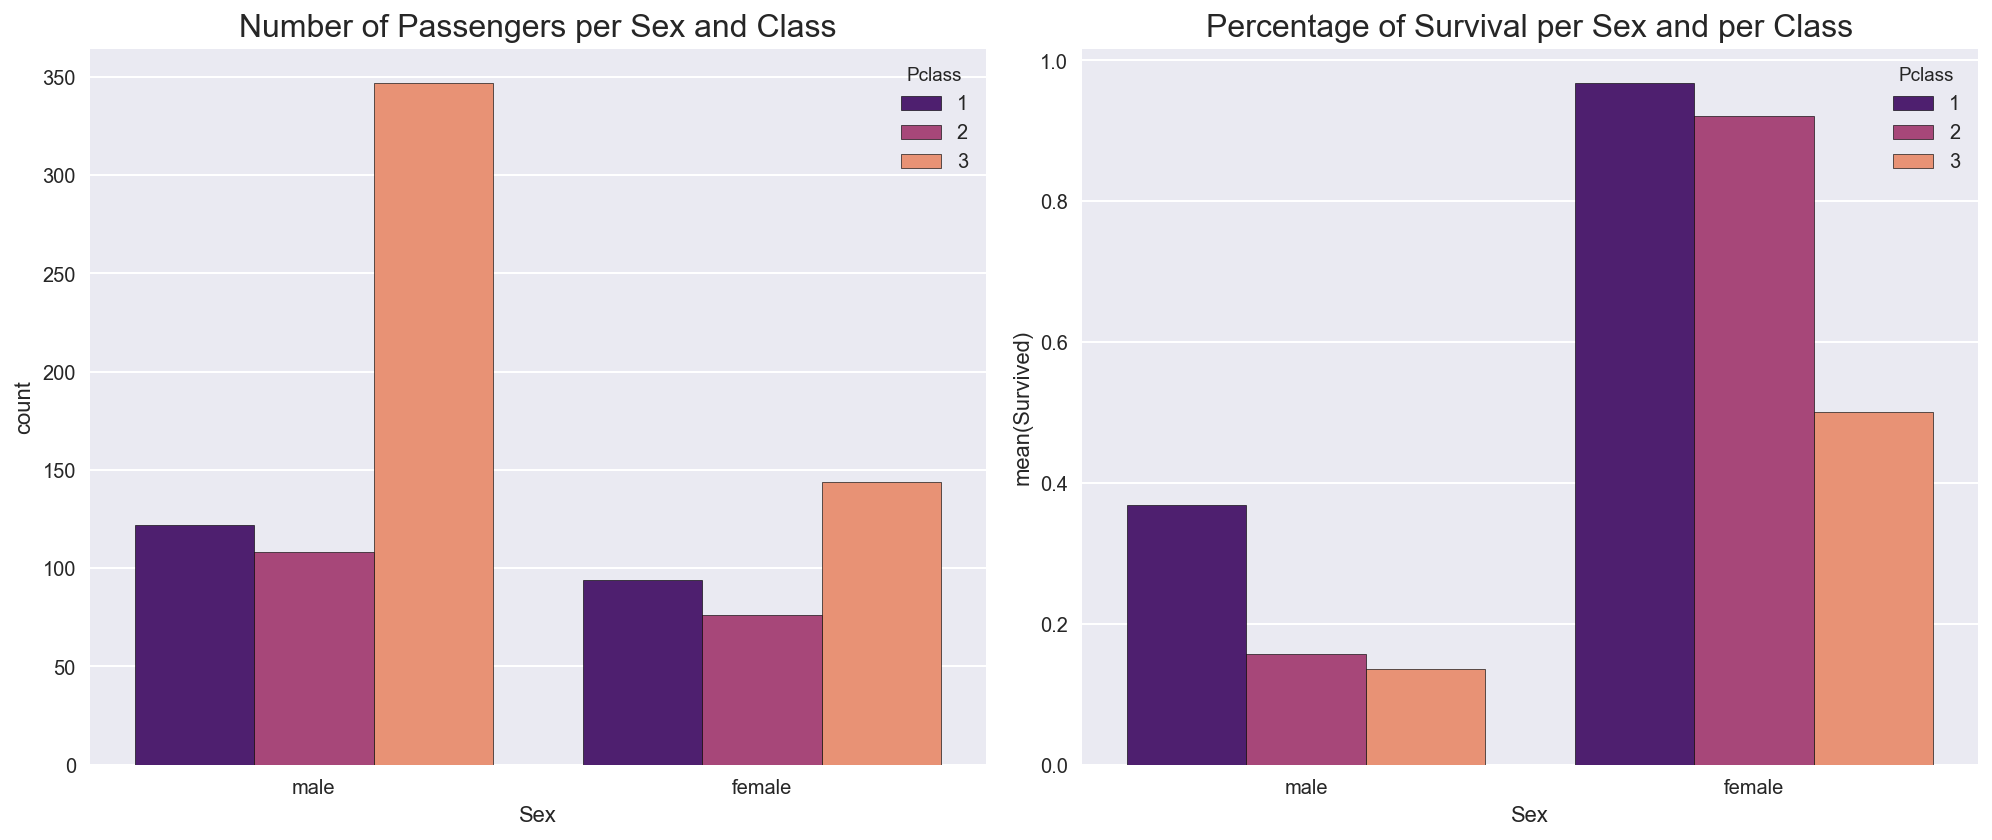

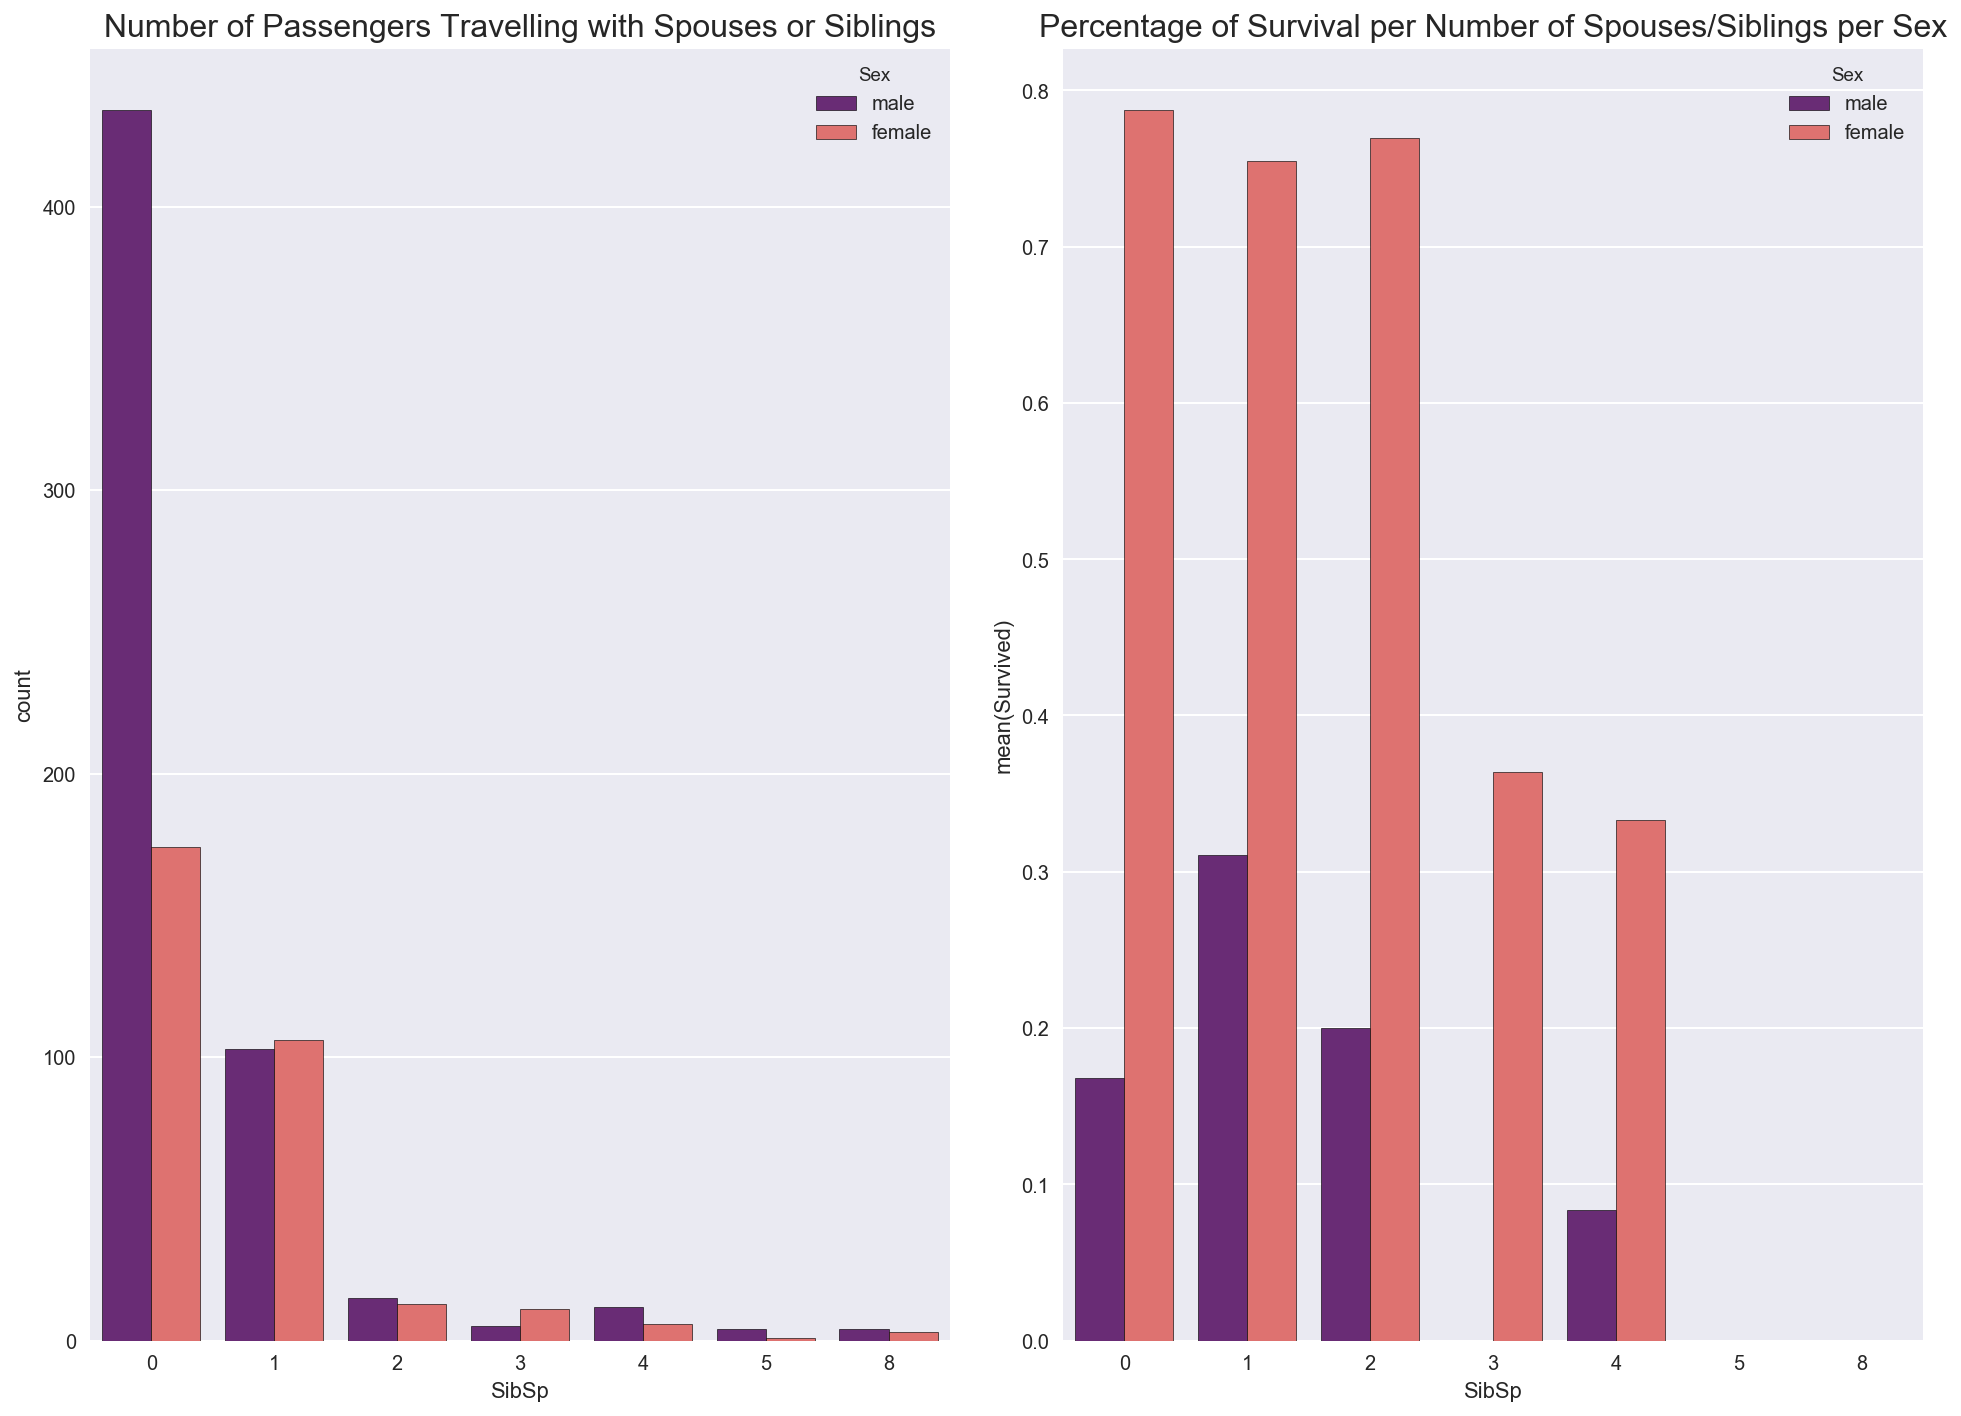

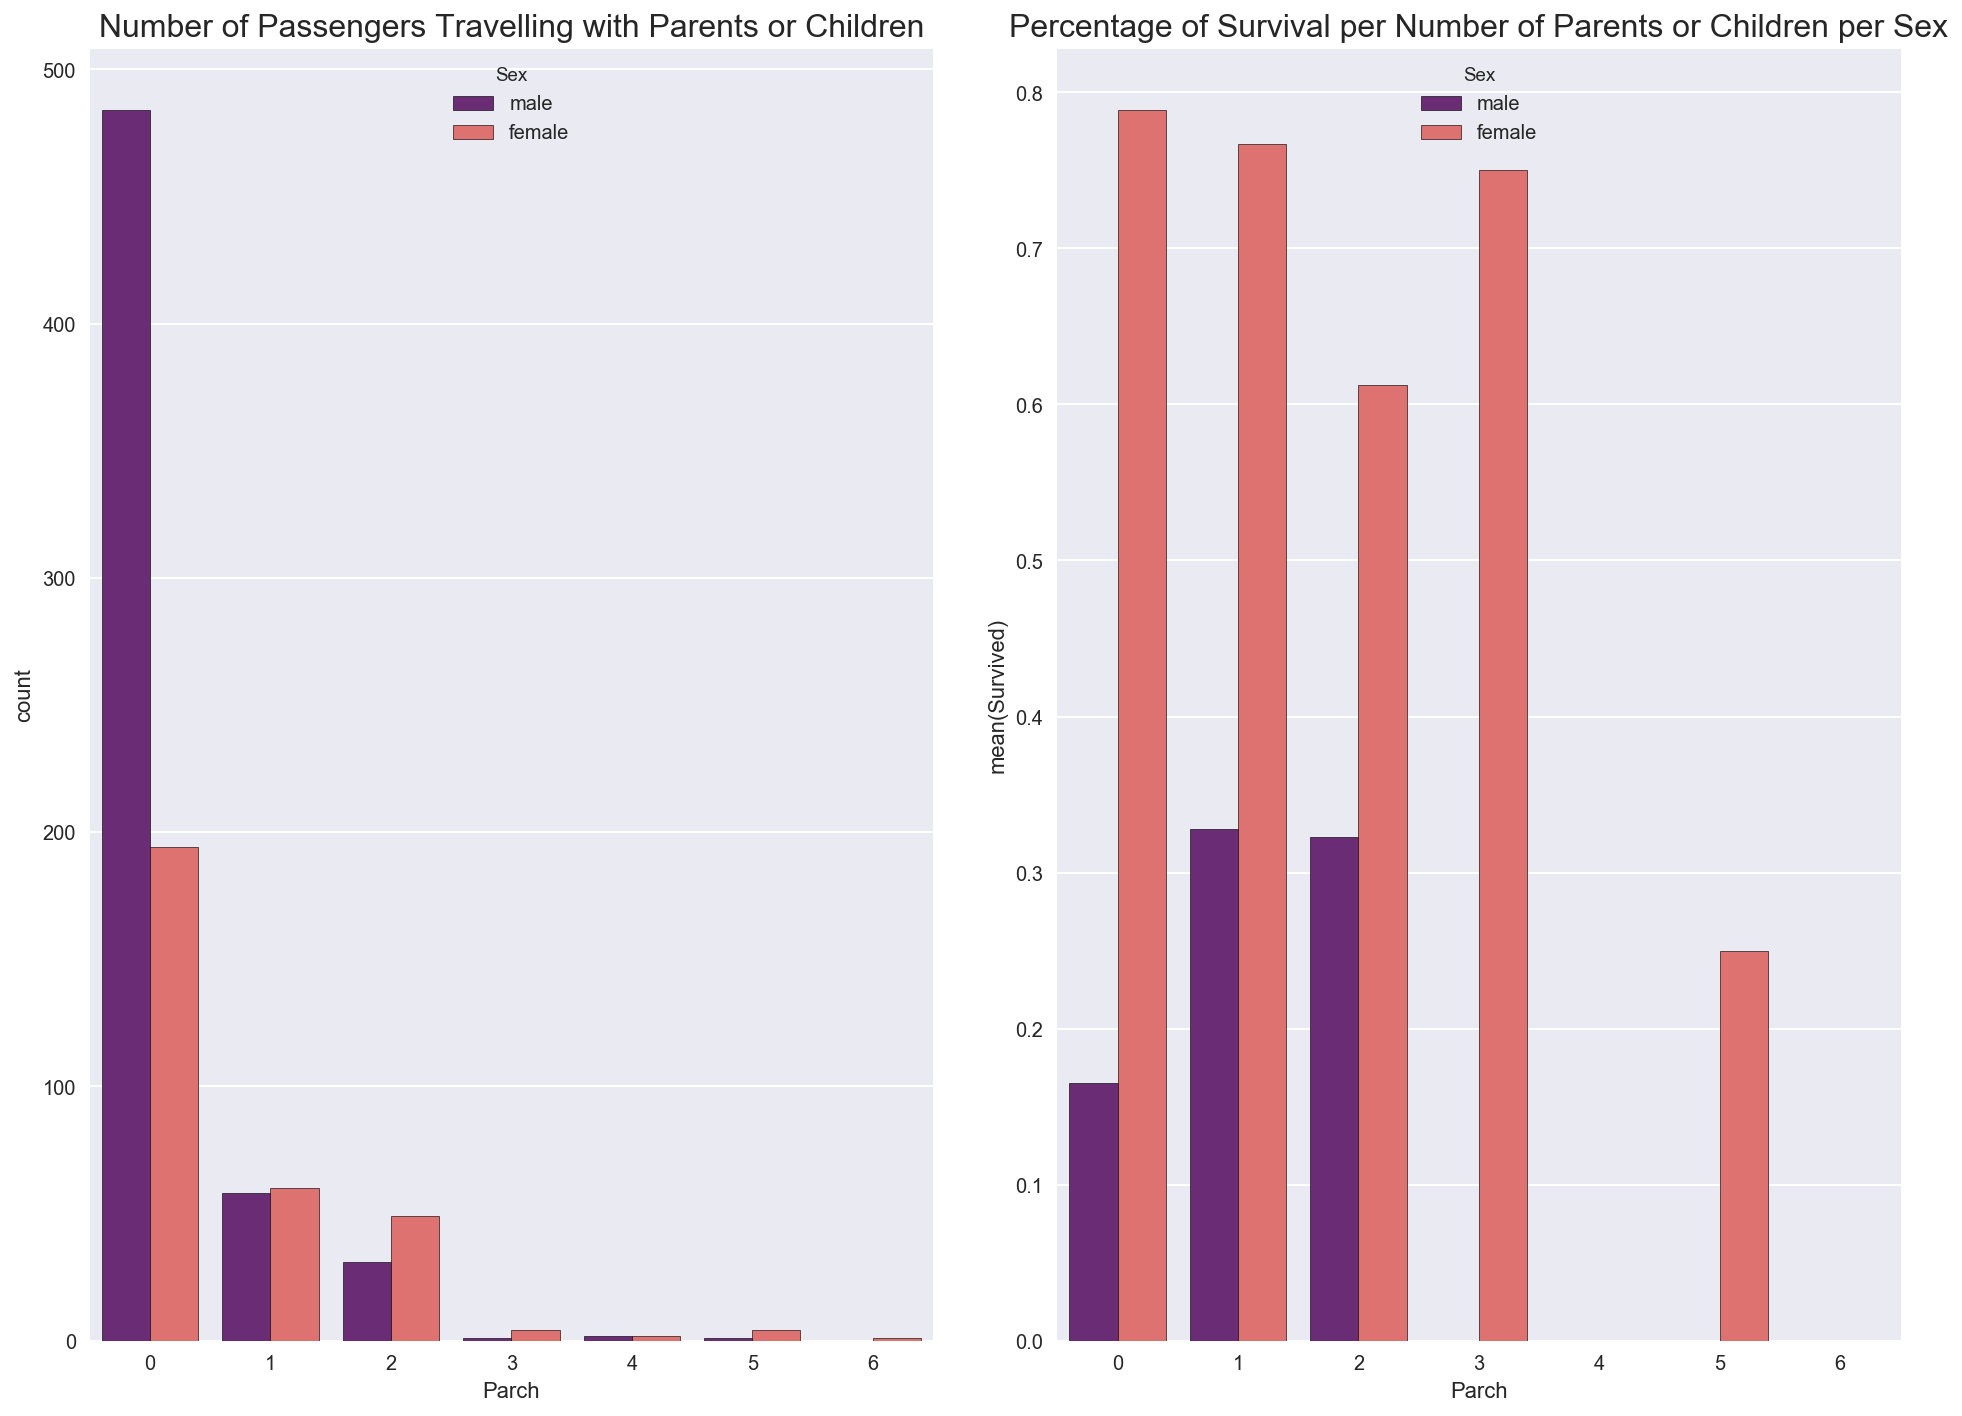

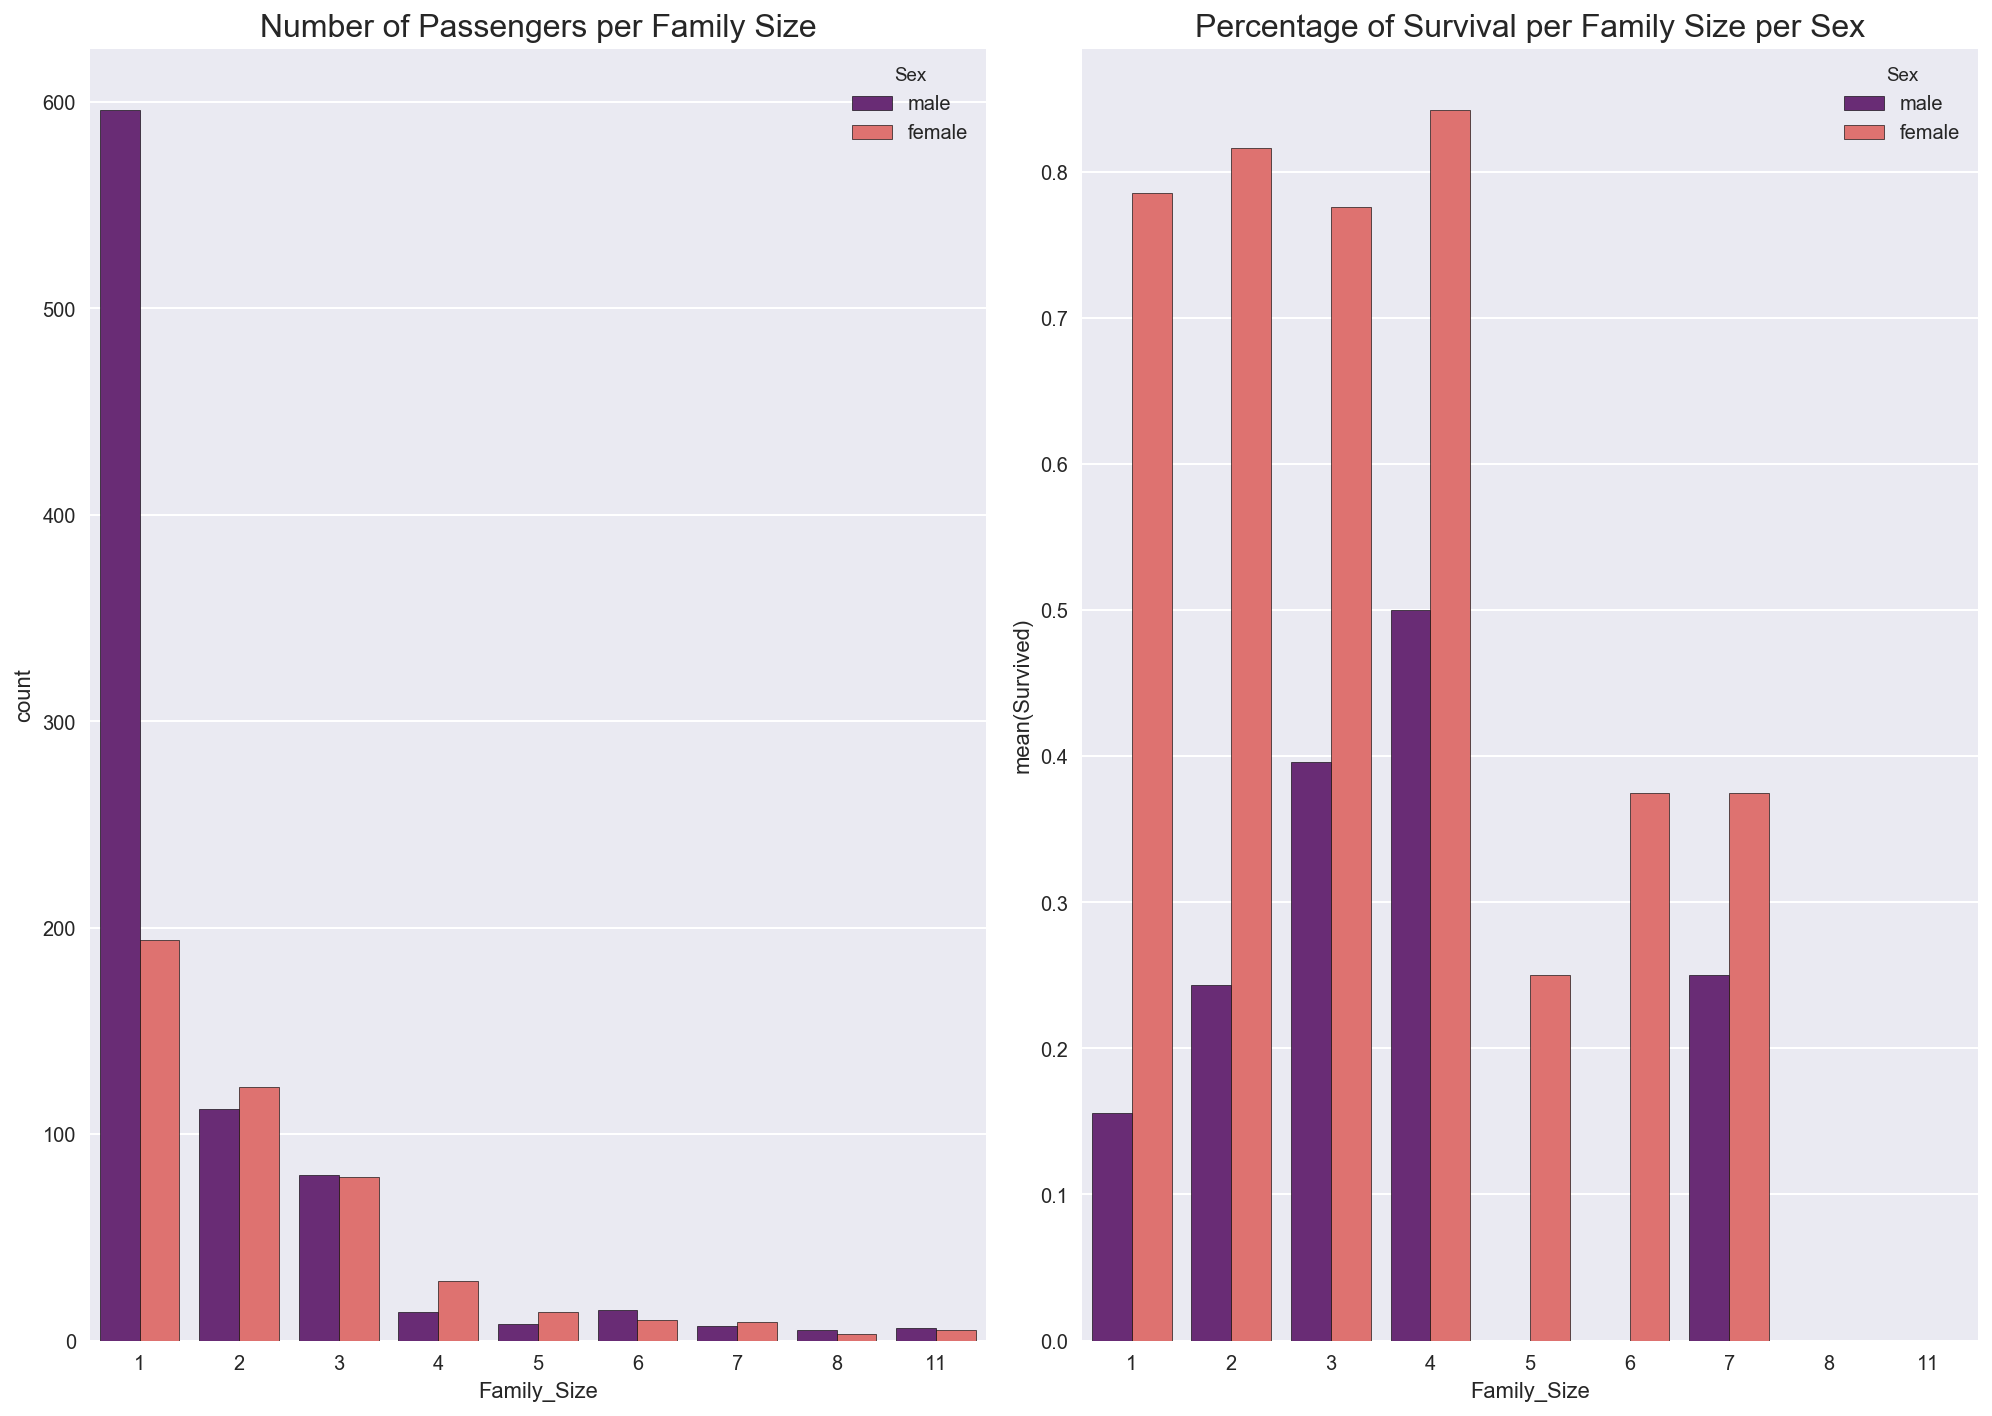

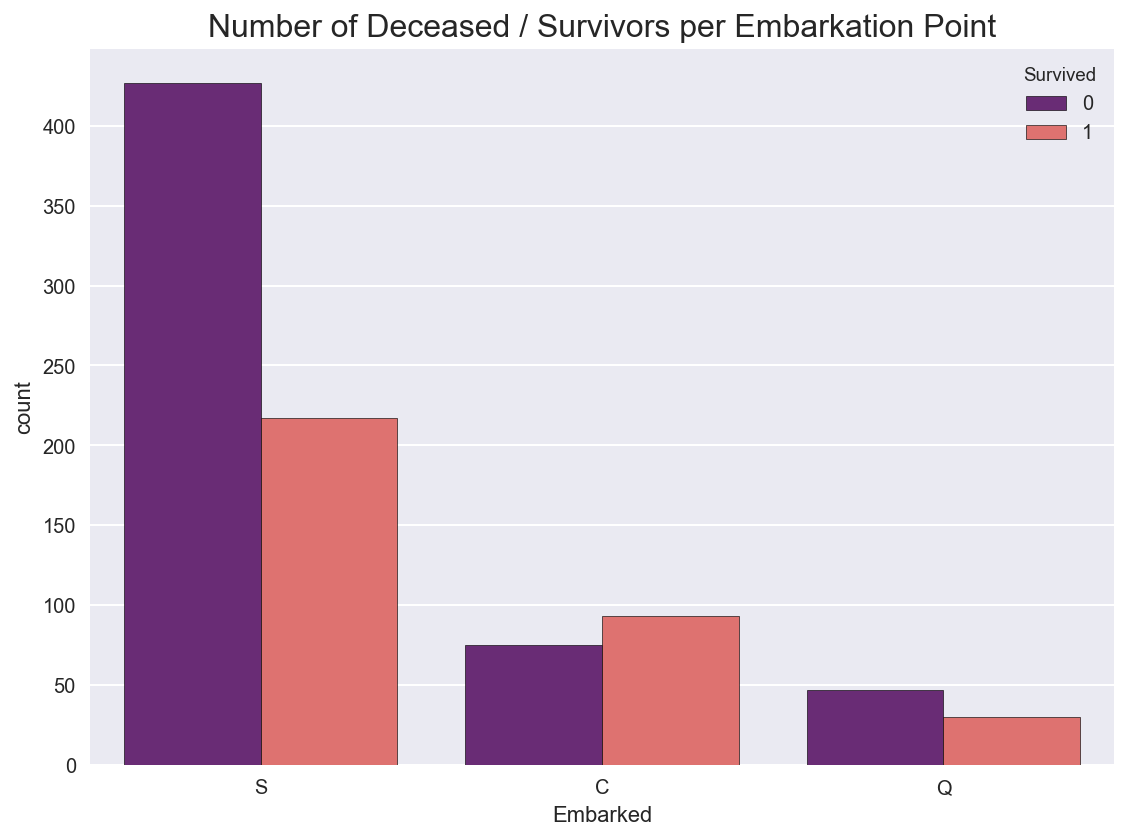

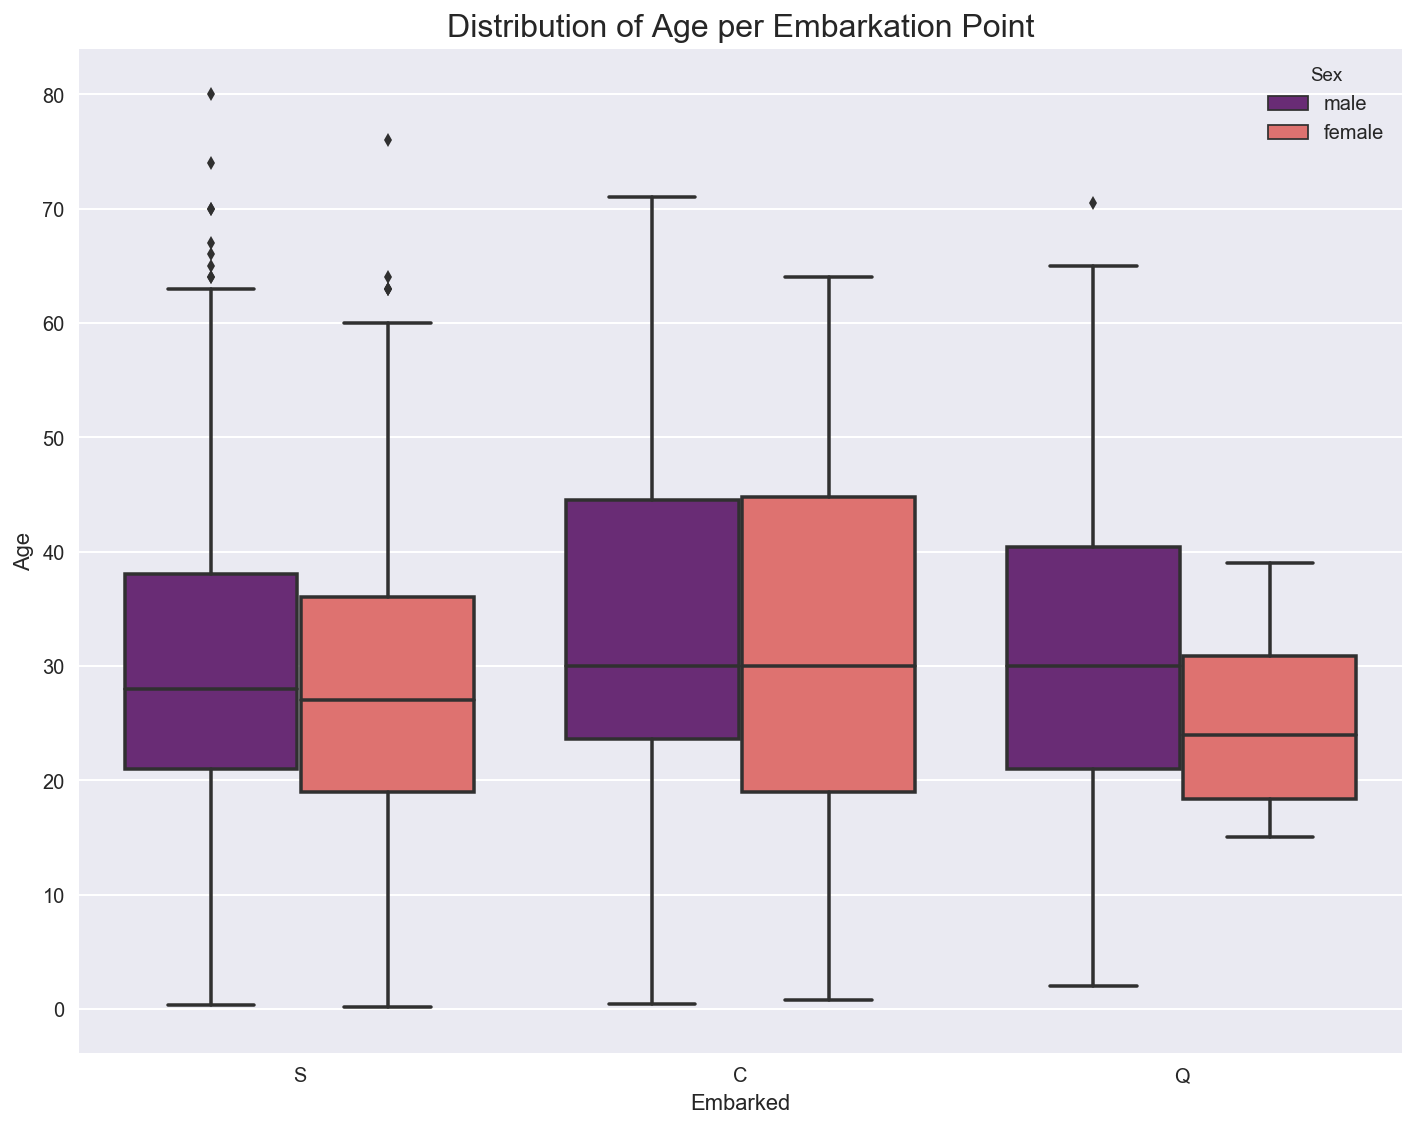

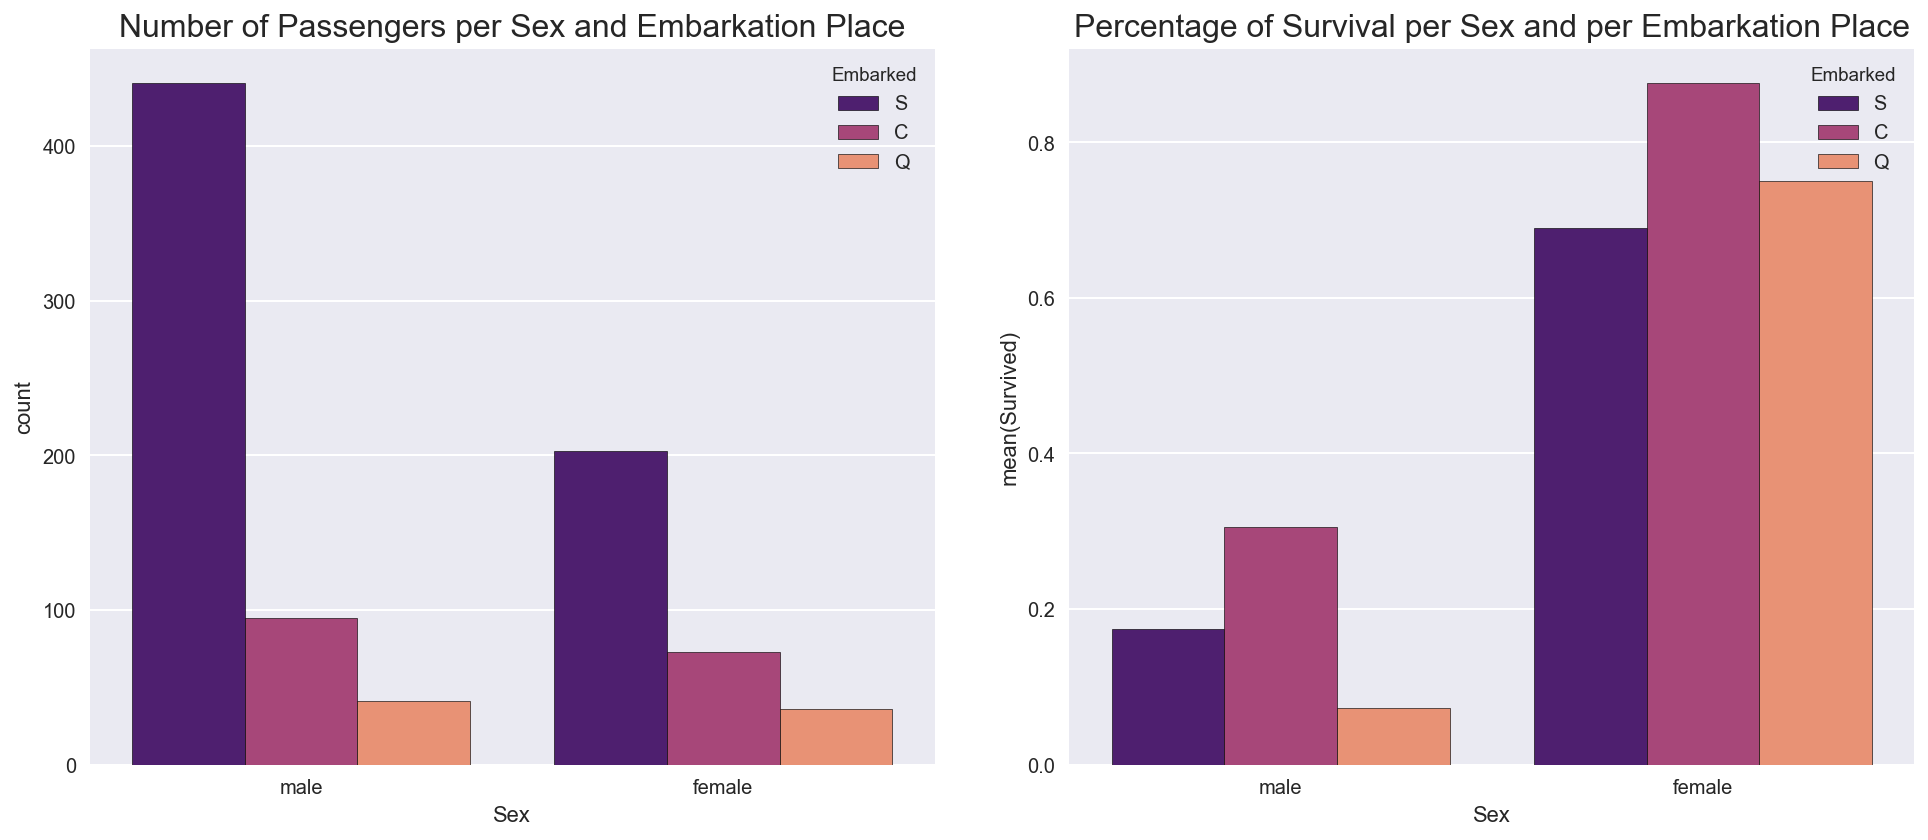

The p-value of the difference of the variable Survived in relation with Embarkation Point is:
1.514339014290716e-06


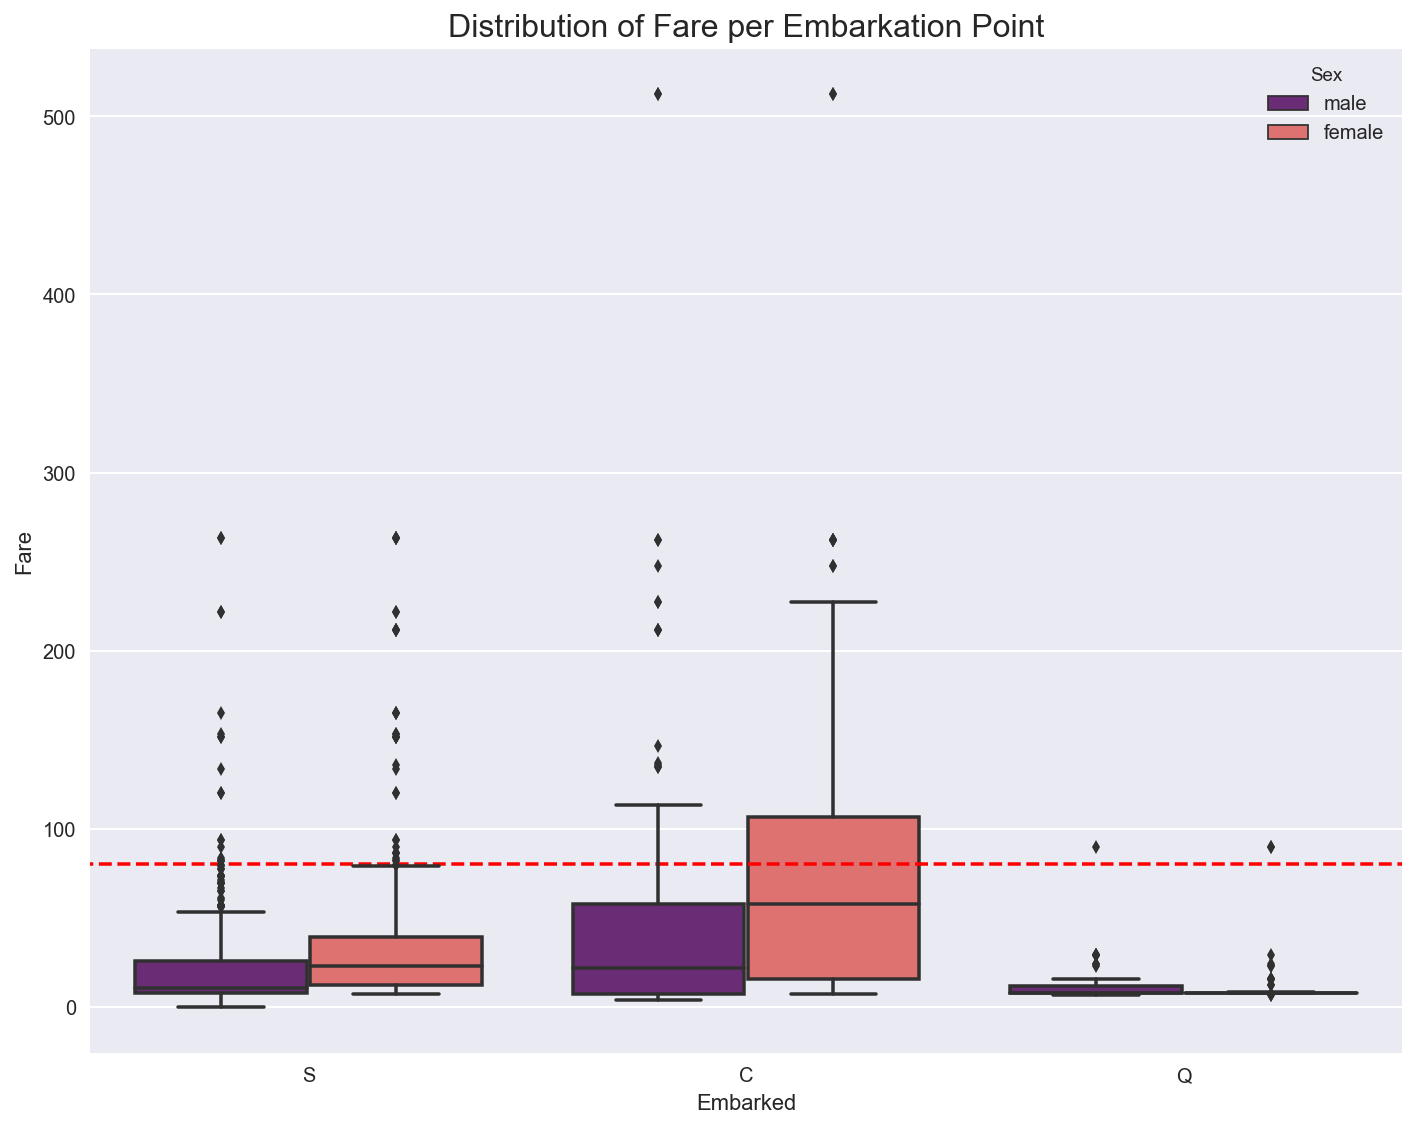

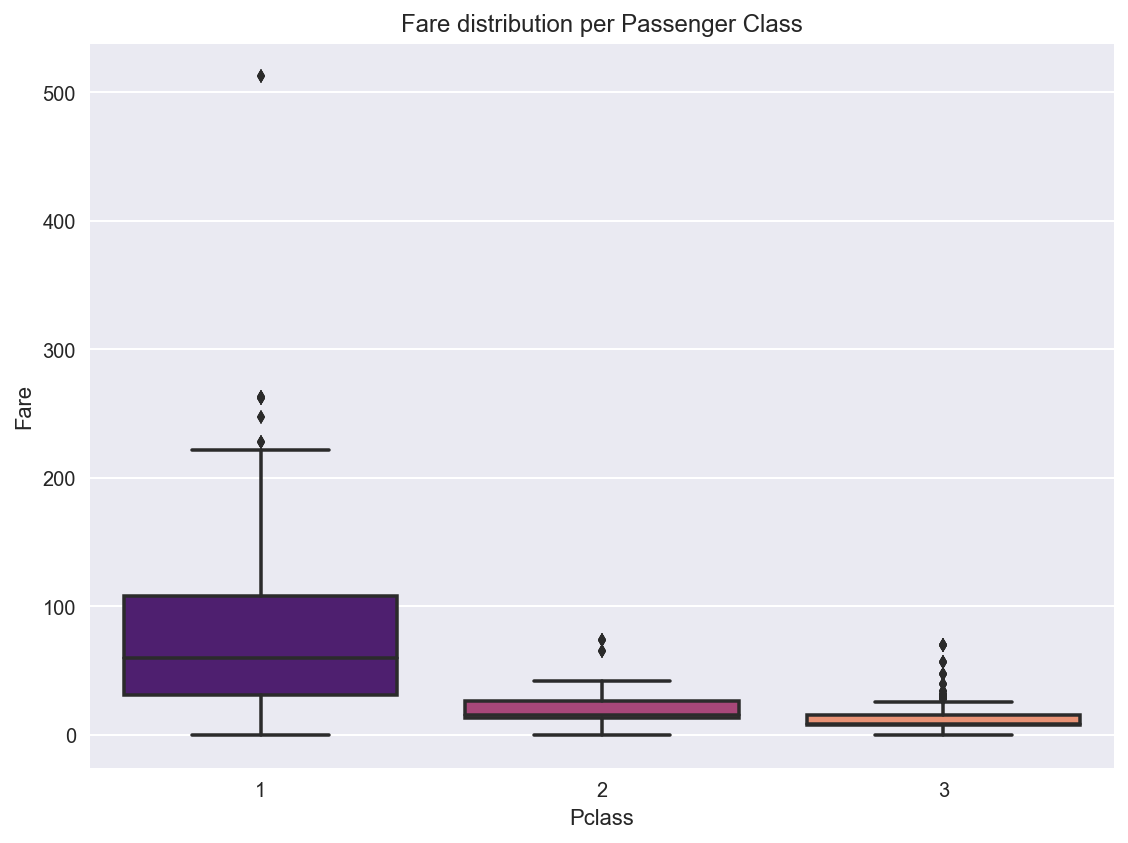

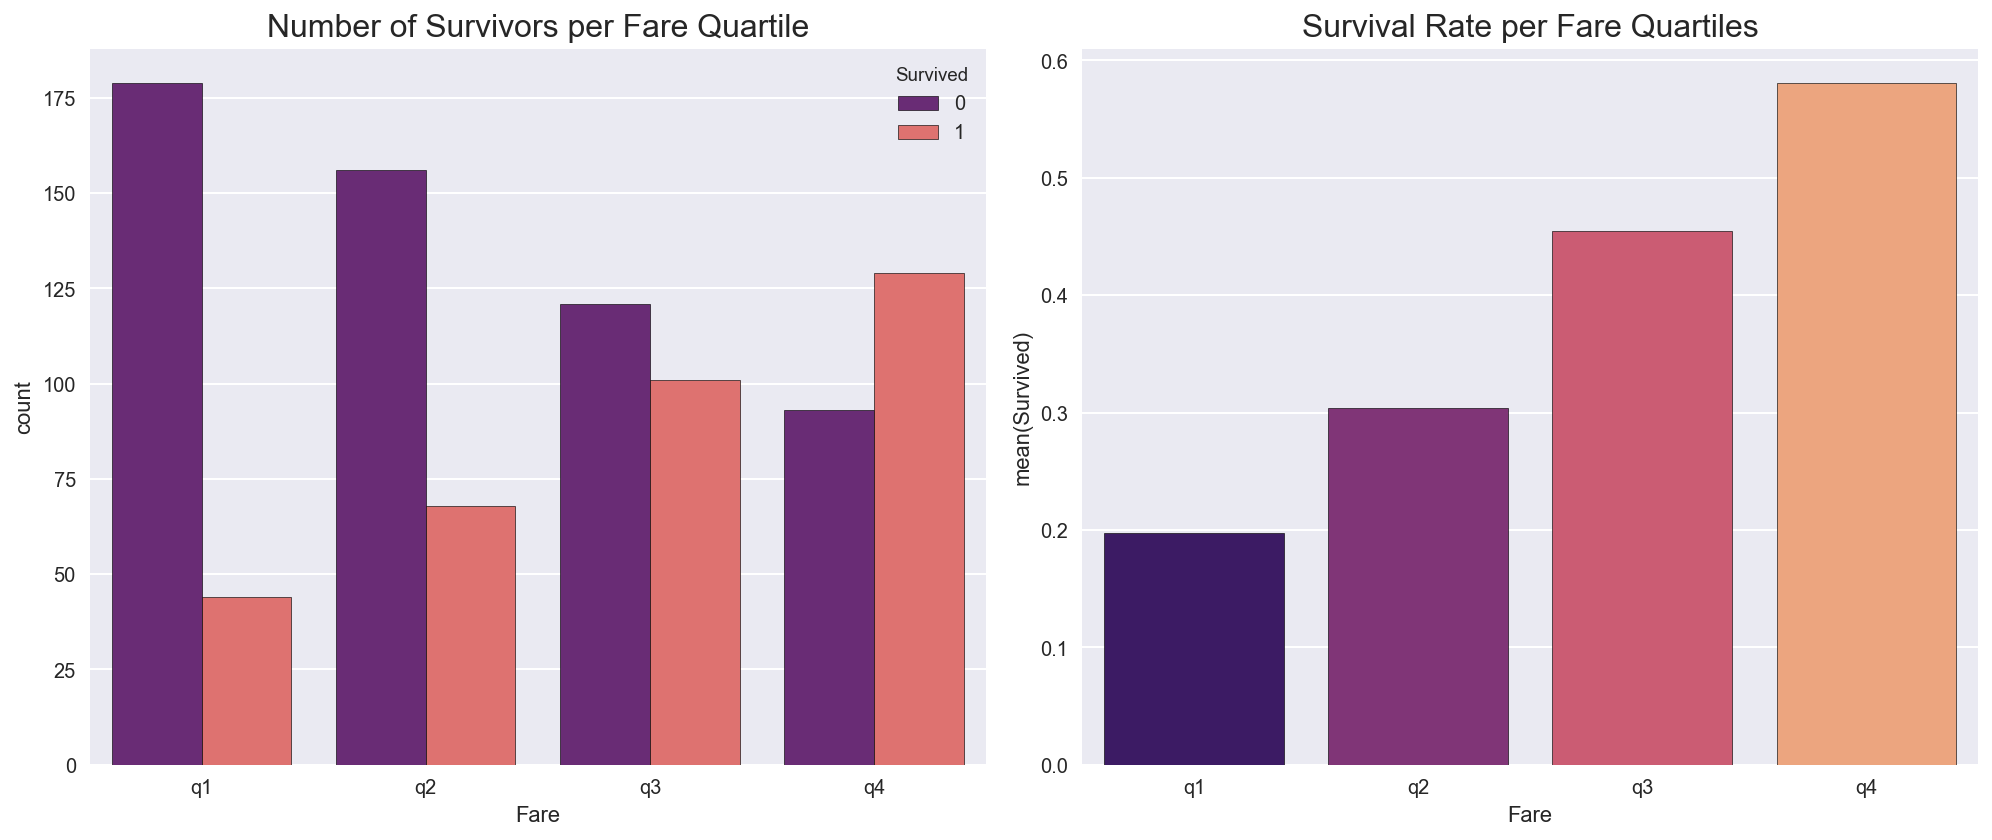

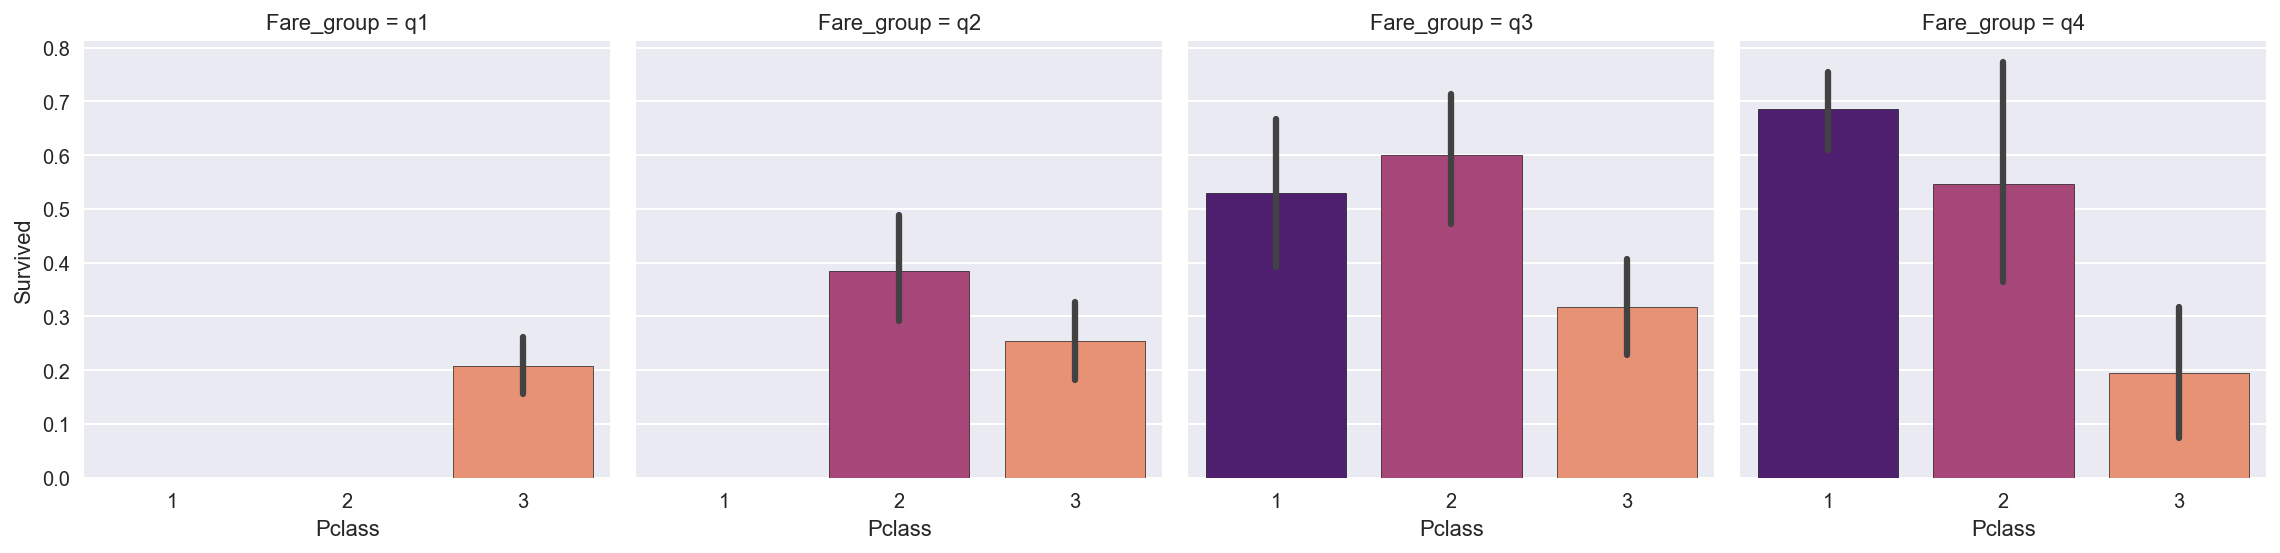

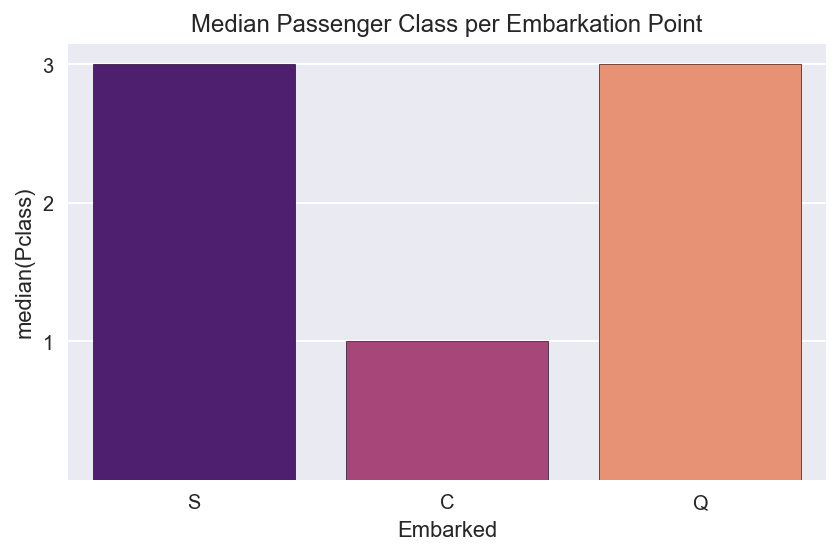

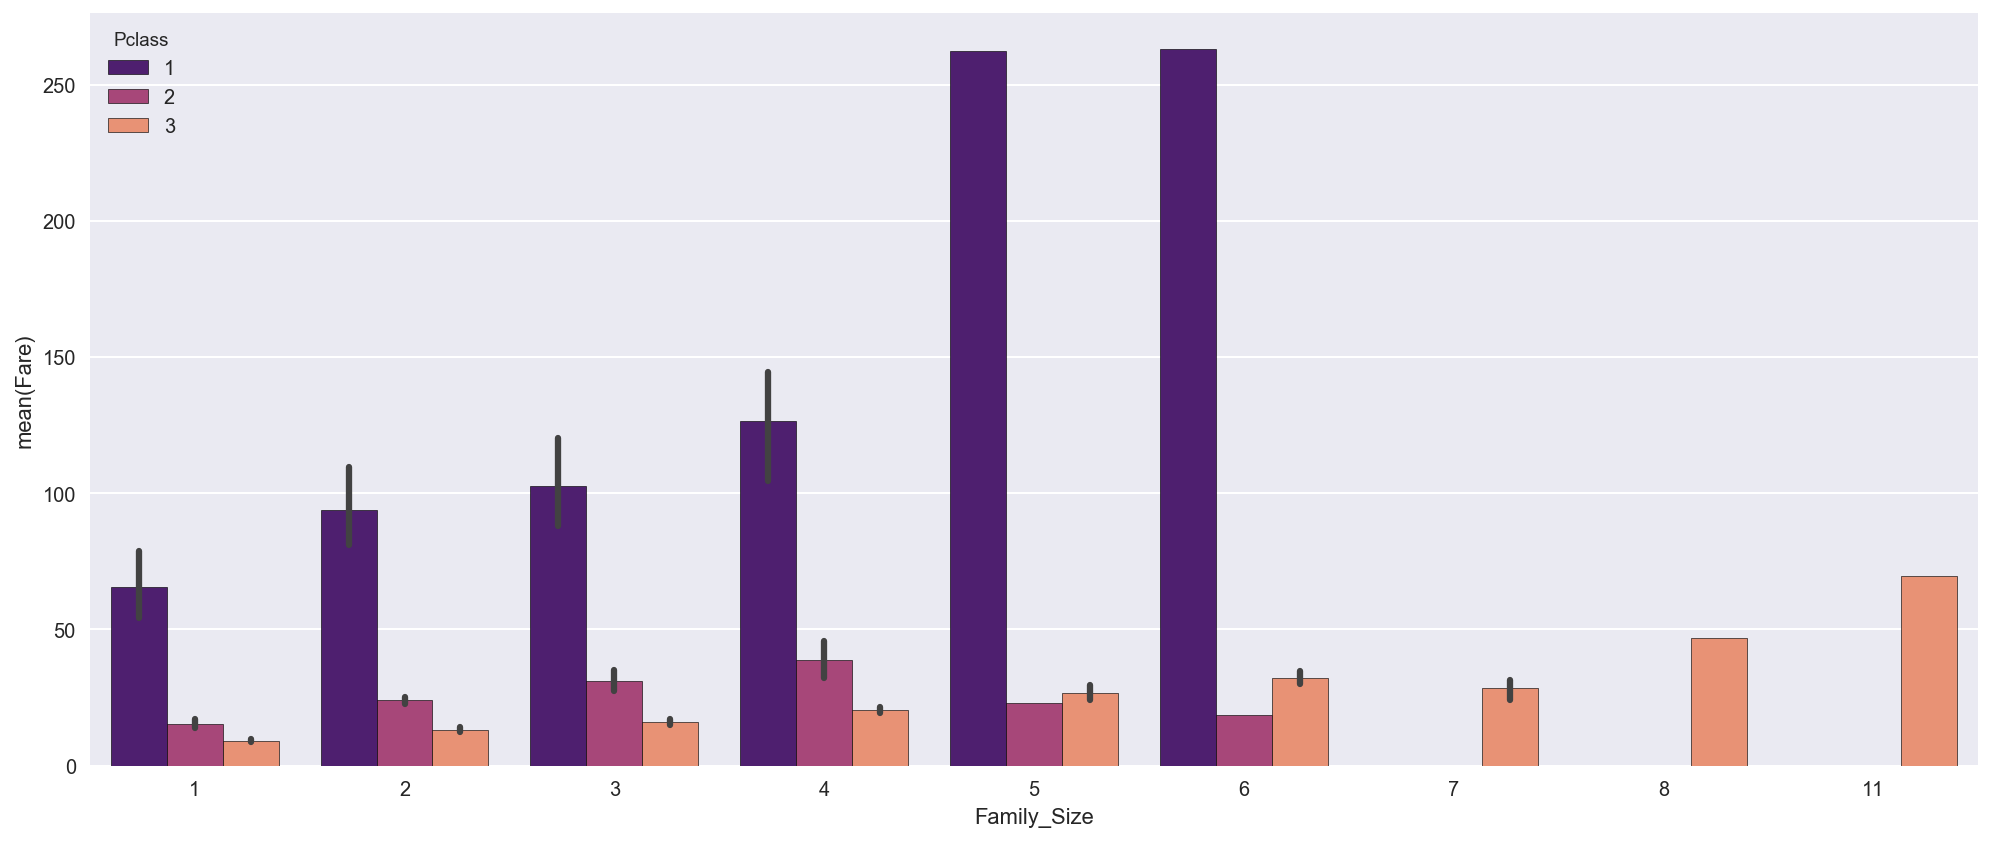

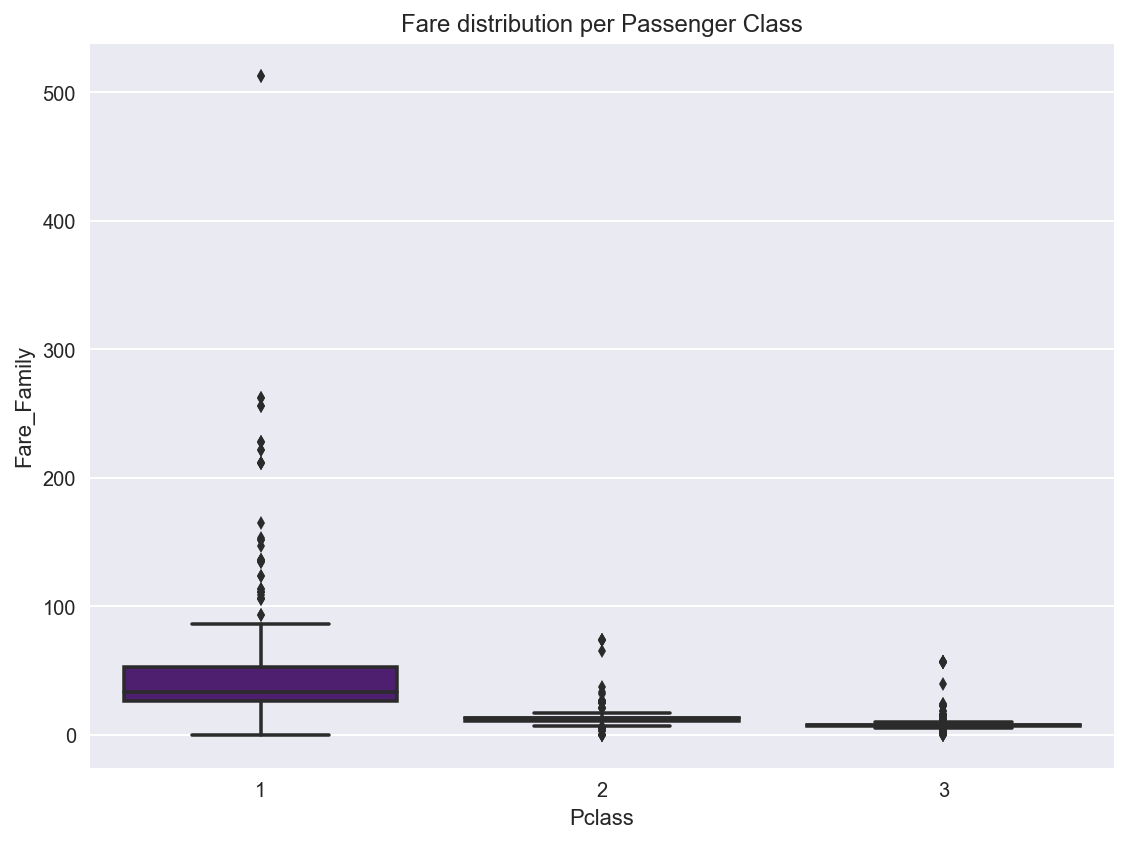

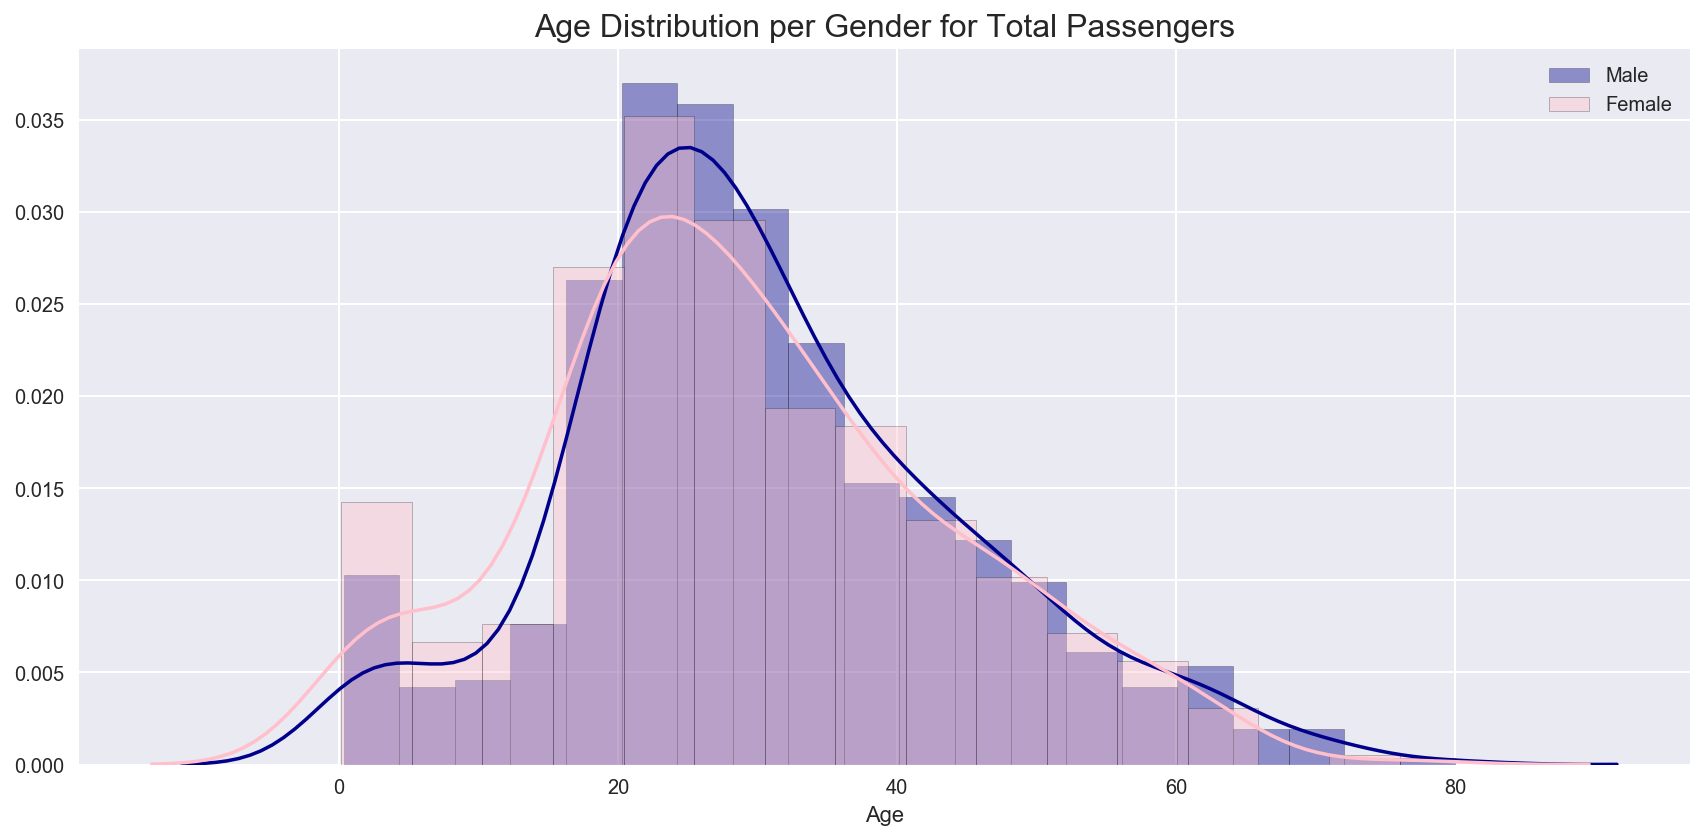

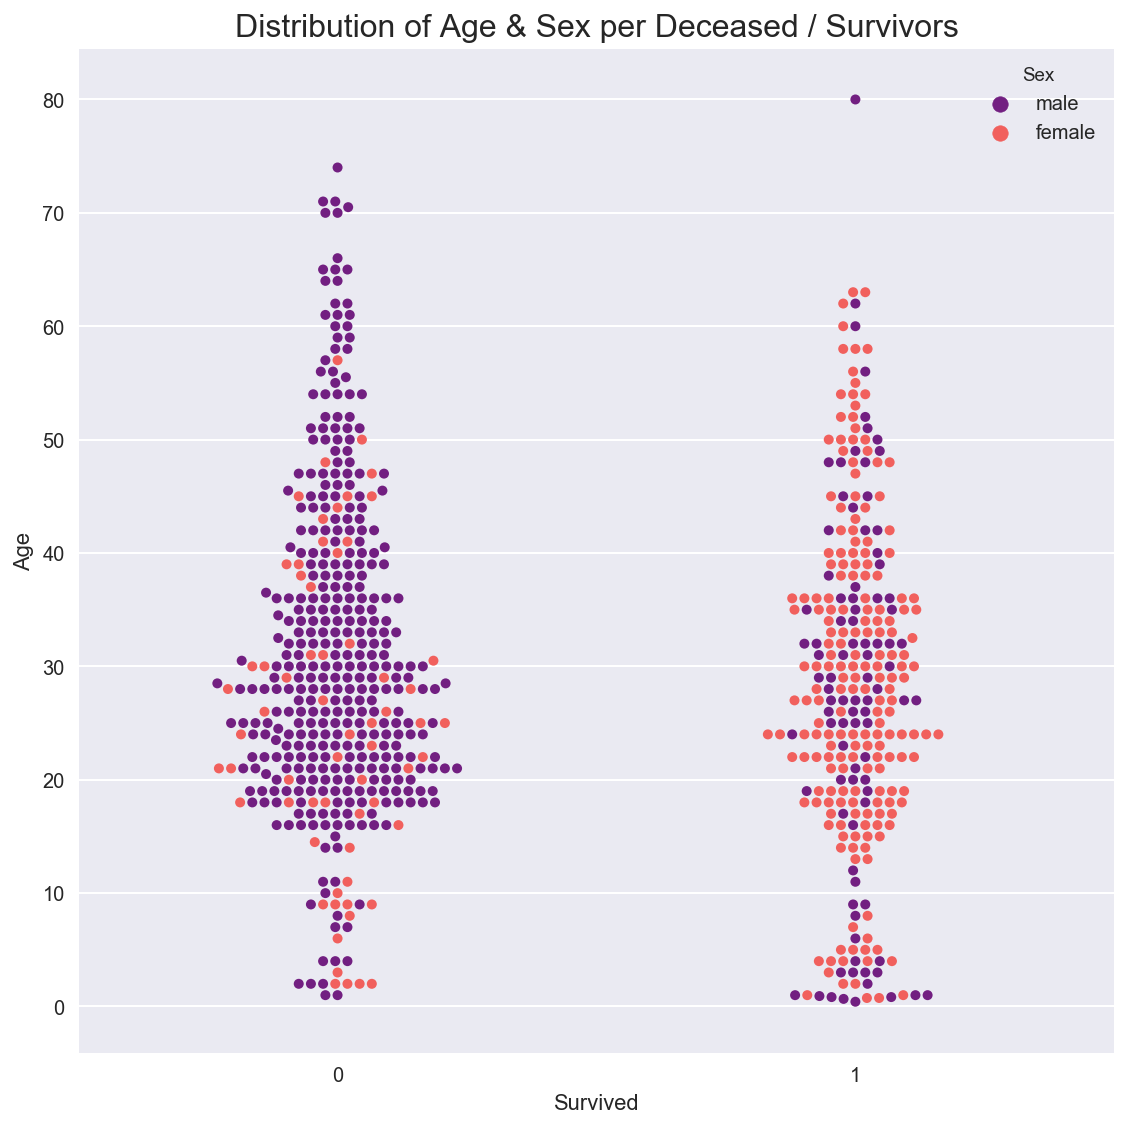

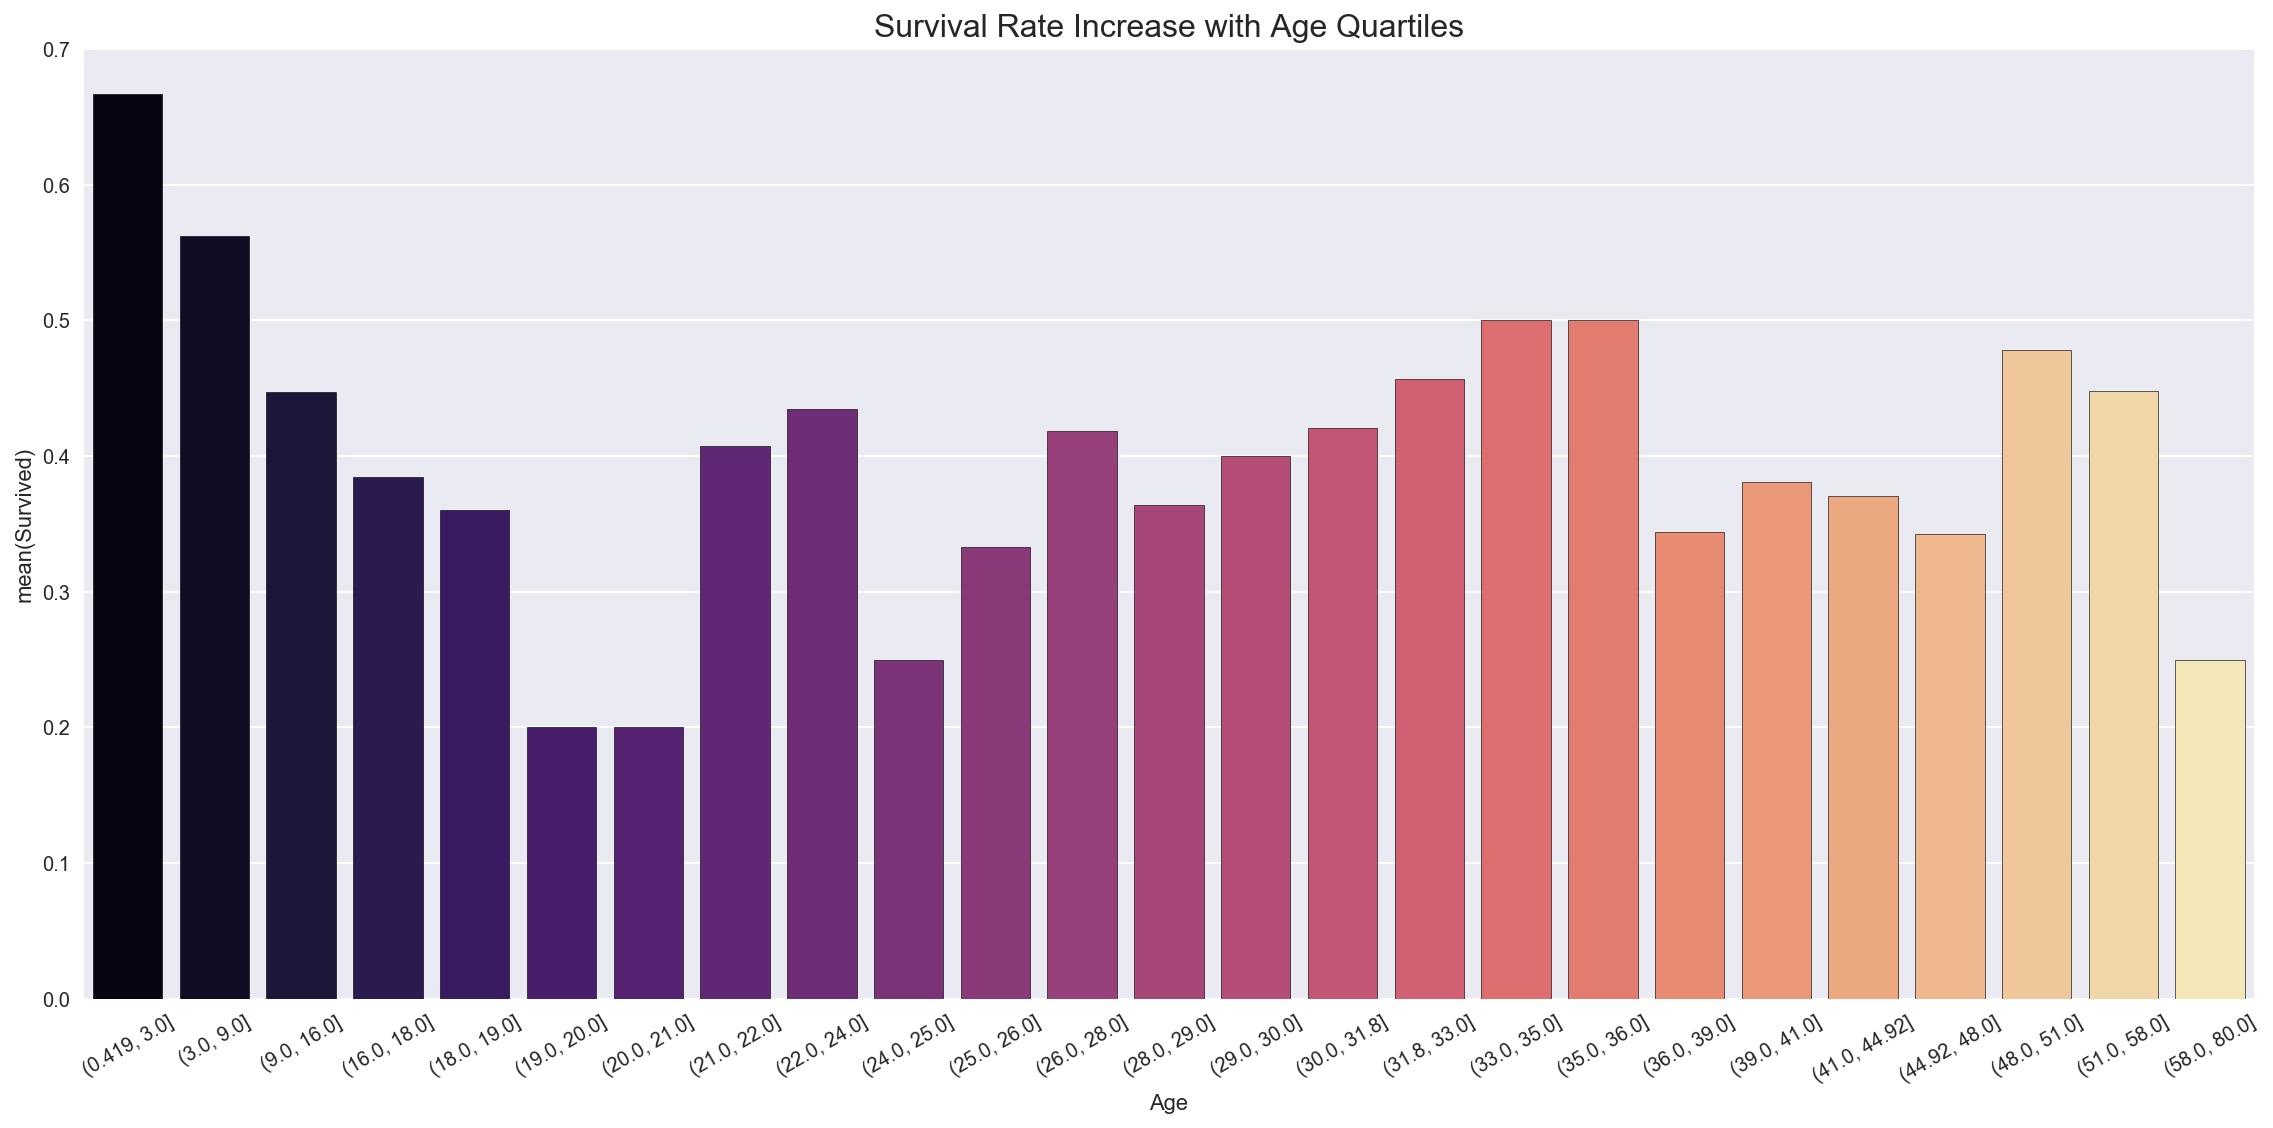

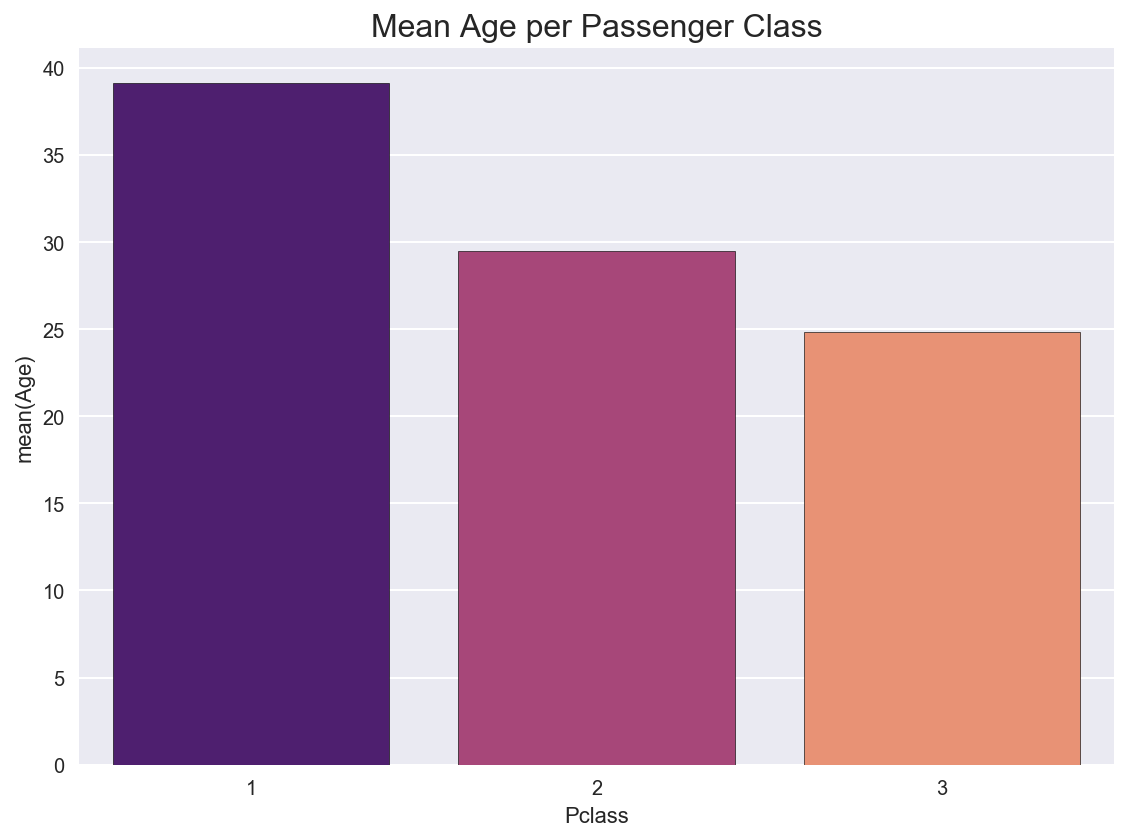

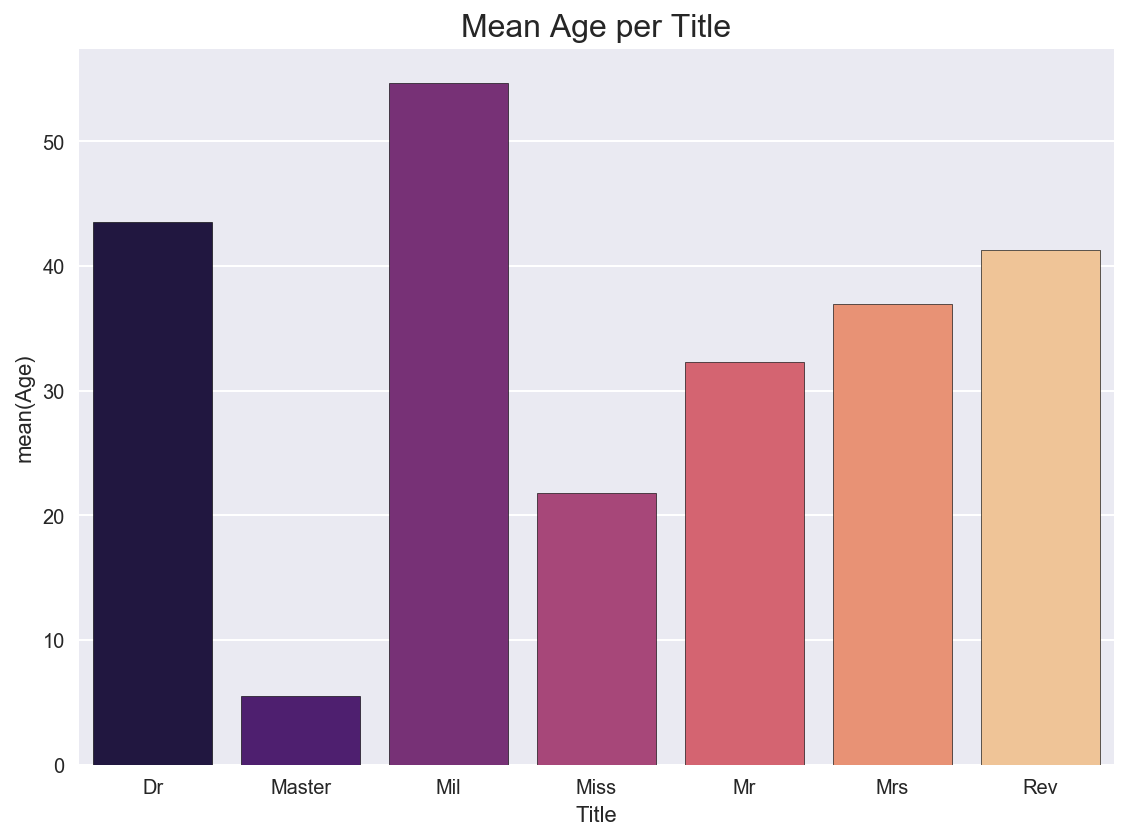

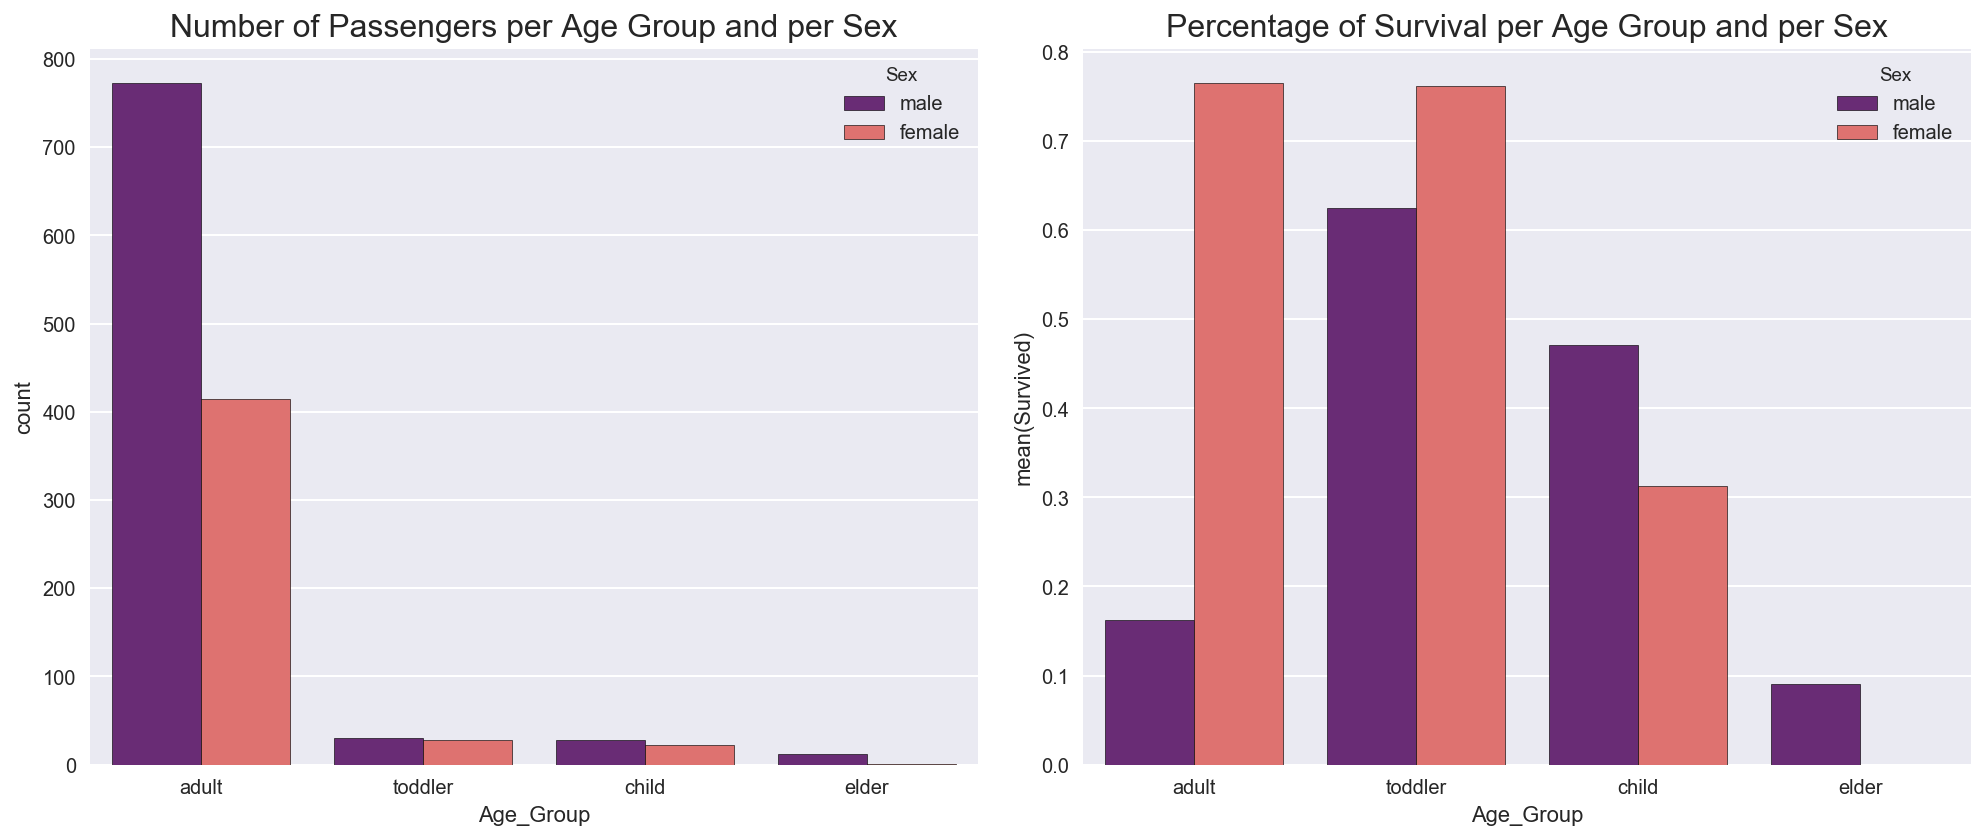

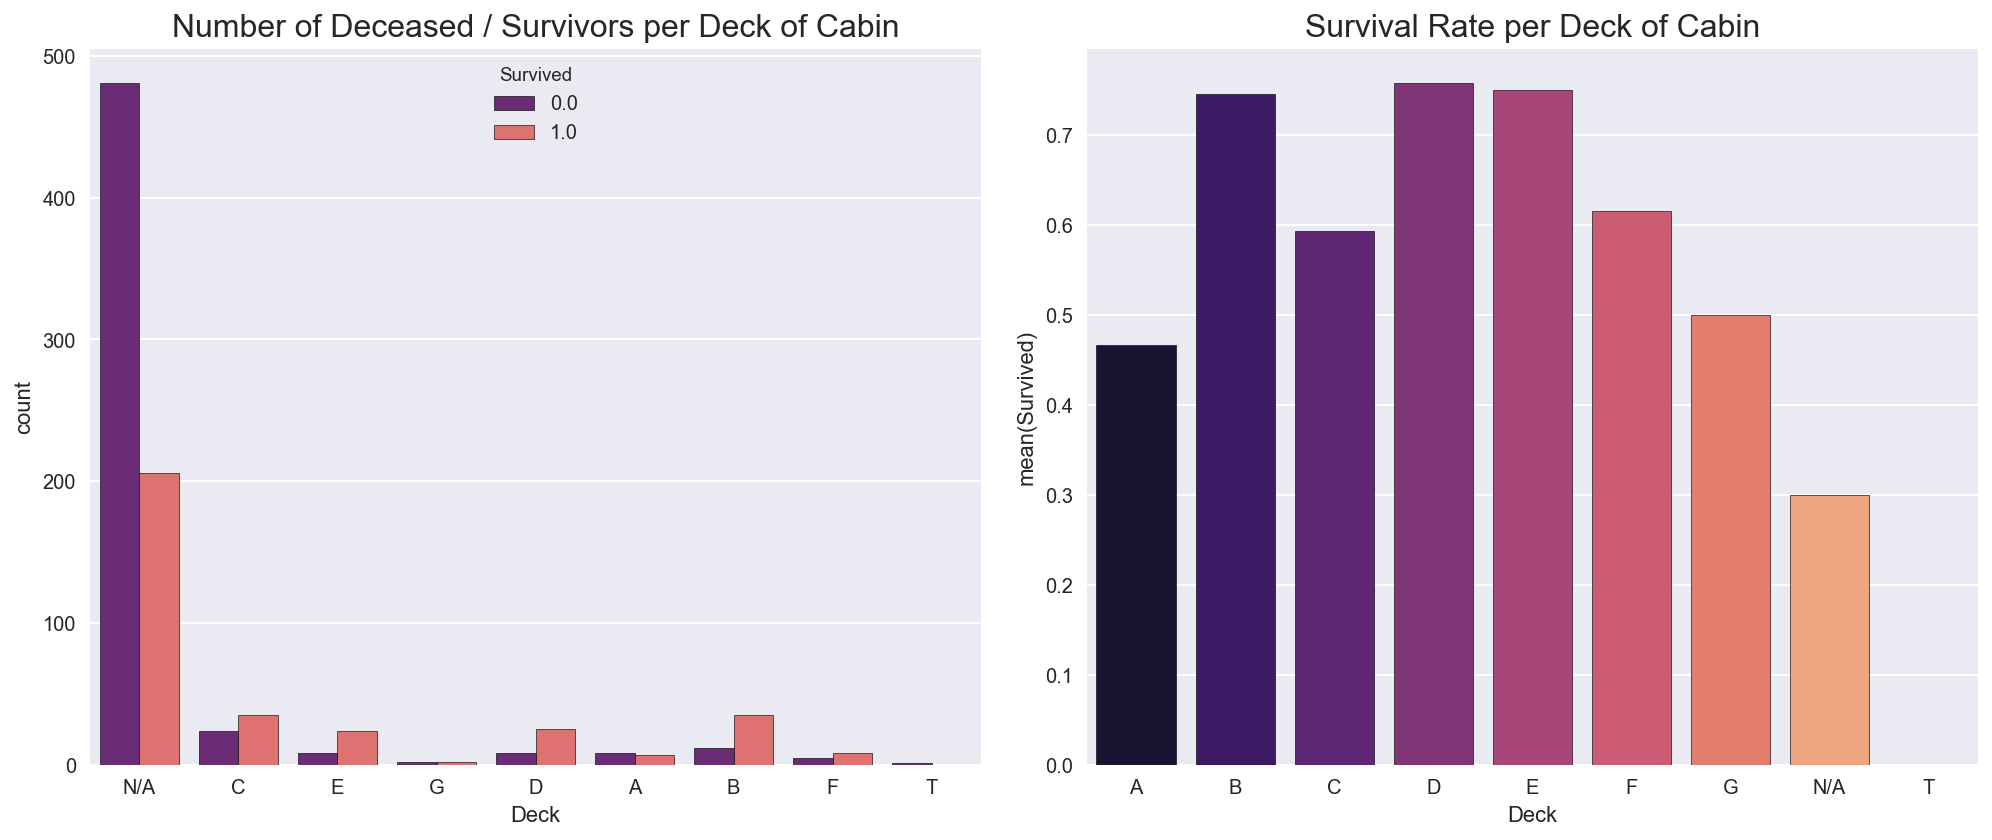

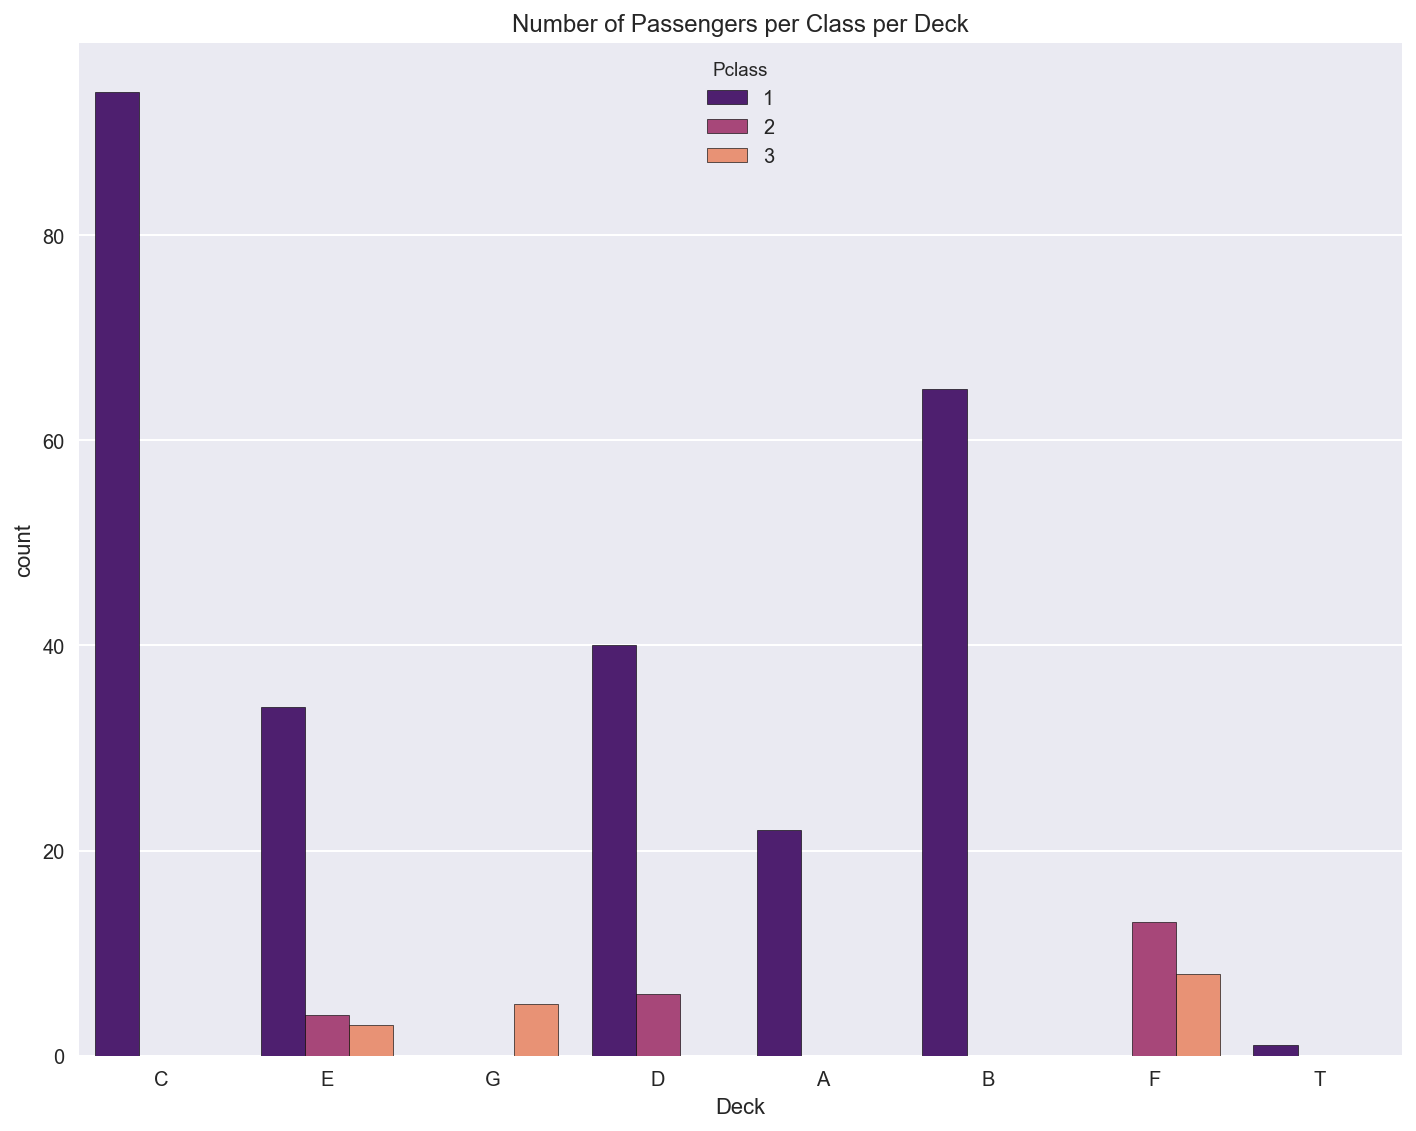

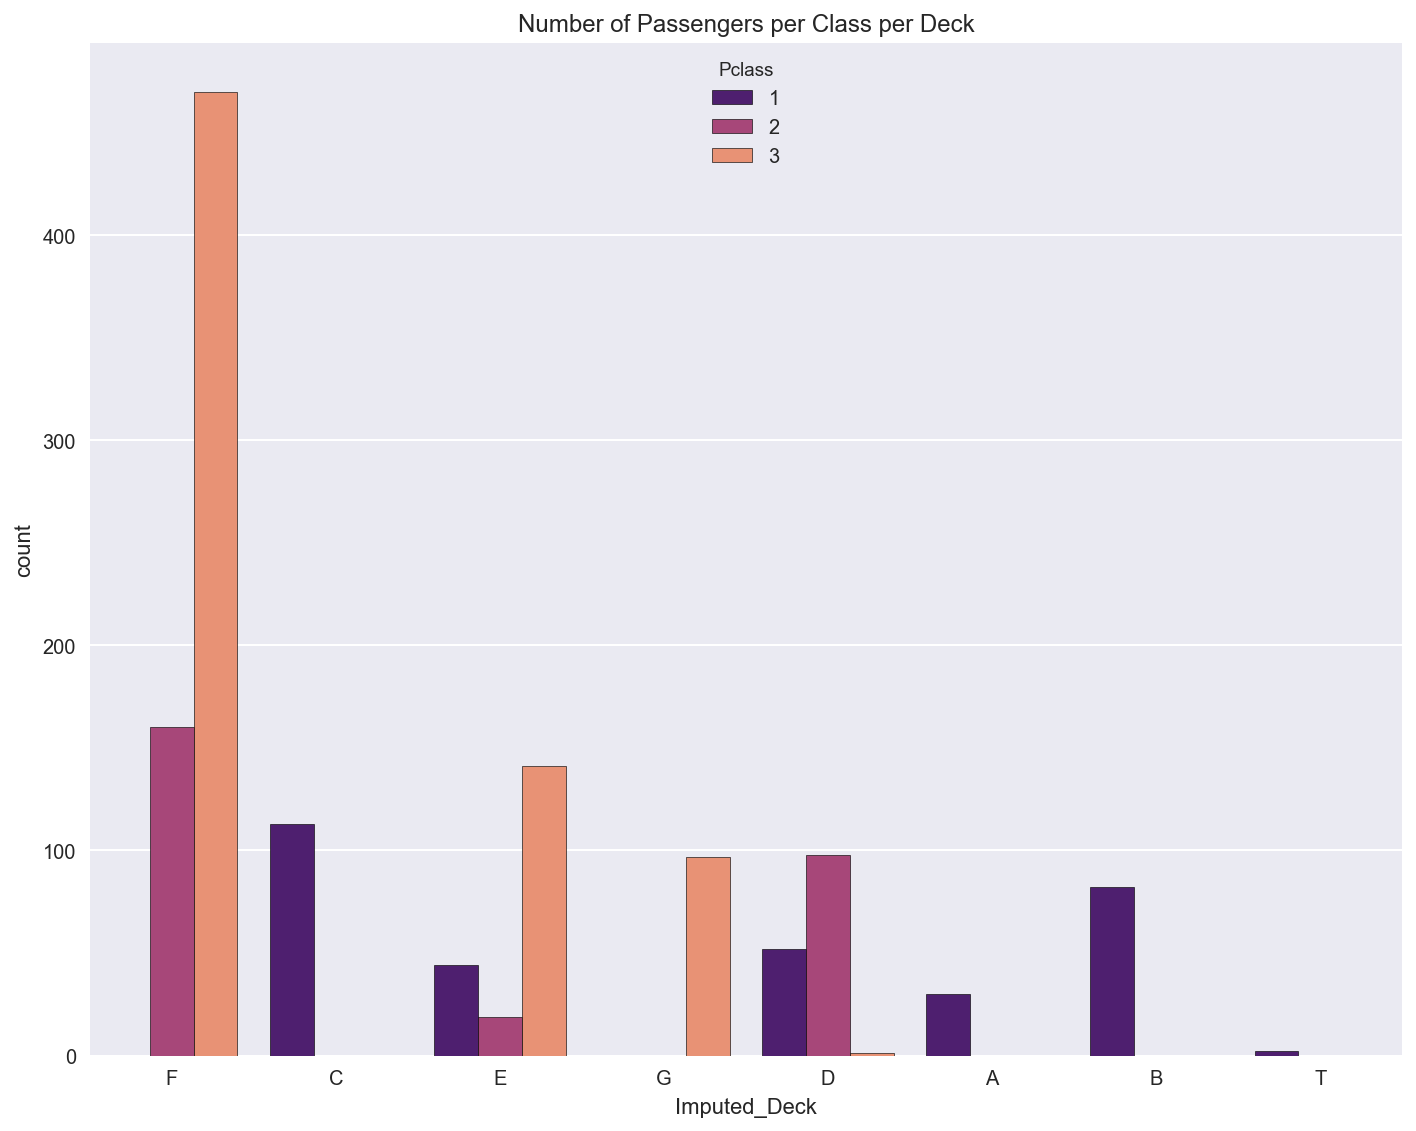

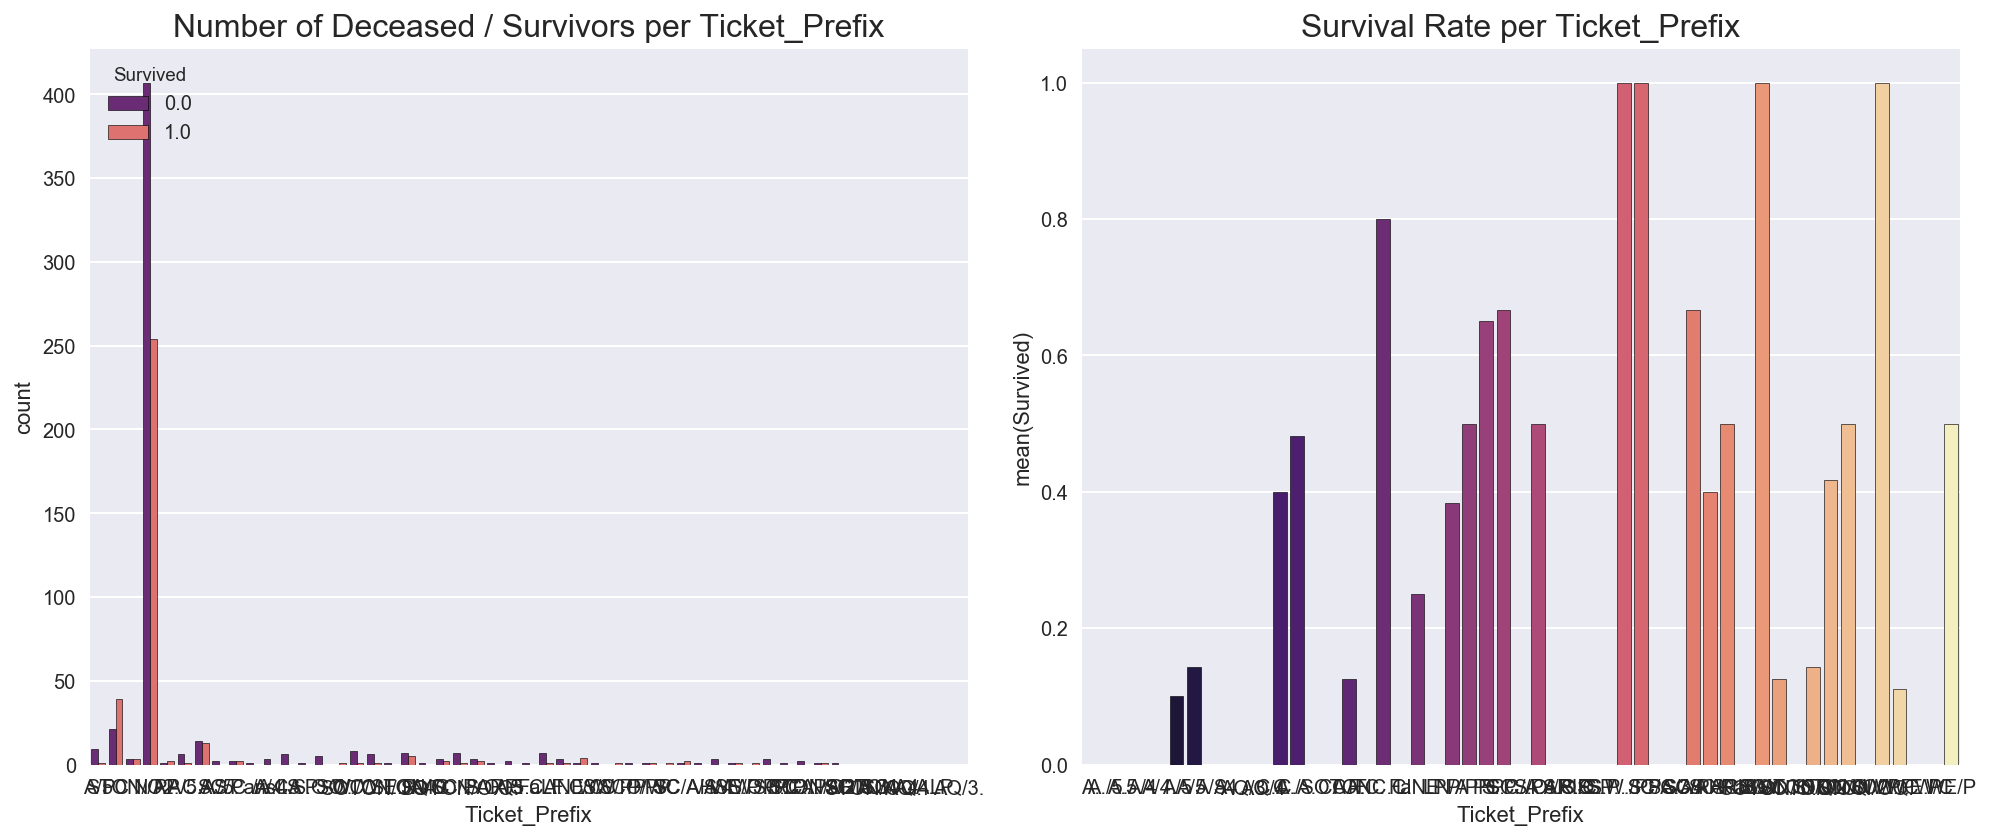

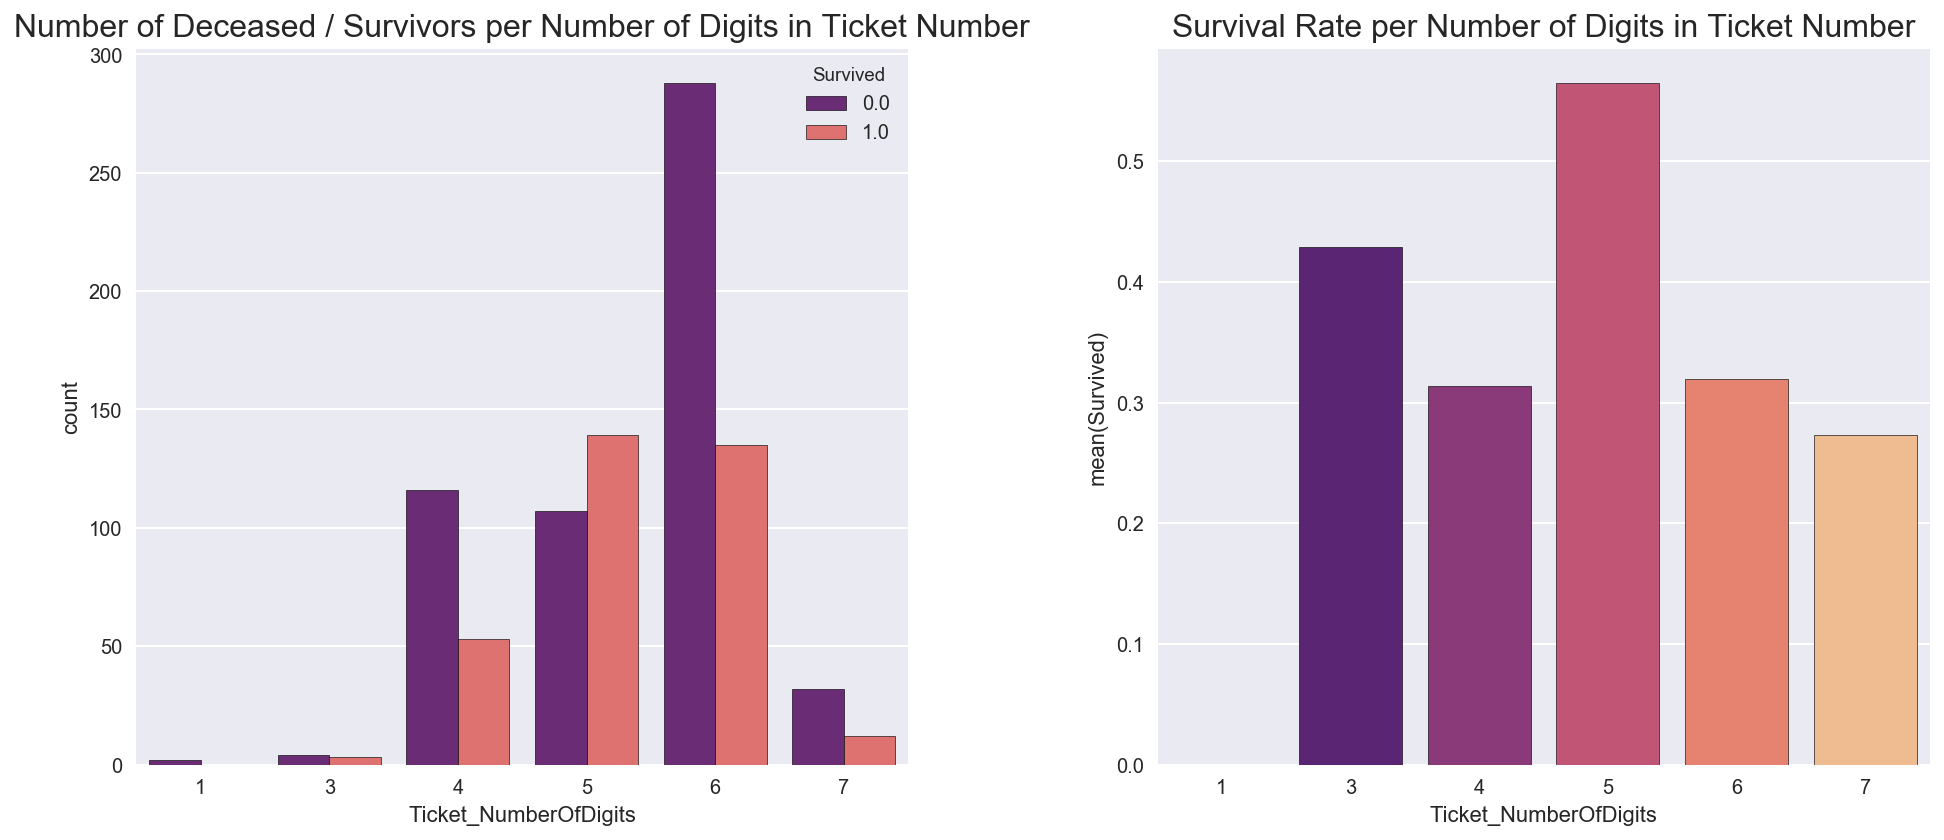

The p-value of the difference of the variable Survived in relation with Ticket_NumberOfDigits is:
1.4564590577219393e-09


Feature_Engineering.ipynb:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "cells": [
Feature_Engineering.ipynb:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  {
Feature_Engineering.ipynb:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "cell_type": "markdown",
Feature_Engineering.ipynb:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "metadata": {},
Feature_Engineering.ipynb:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "source": [
Feature_Engineering.ipynb:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "# The Titanic Dataset\n",


In [1]:
%run II_Machine_Learning.ipynb

# Ensembling

## Voting Classifier

In [278]:
classifier_vot = VotingClassifier(estimators=[('knn', classifier_knn), 
                                              ('lda', classifier_lda),
                                              ('log', classifier_log), 
                                              ('svc', classifier_svc), 
                                              ('dt', classifier_dt), 
                                              ('rf', classifier_rf),
                                              ('gbt', classifier_gbt),
                                             ], voting='hard', n_jobs=-1)

classifier_vot.fit(scX_train, y_train)
predictions_vot = classifier_vot.predict(scX_test)

In [279]:
for clf, label in zip([classifier_knn, classifier_lda, classifier_log, classifier_svc,
                       classifier_dt, classifier_rf, classifier_gbt, classifier_vot], 
                      ['KNN', 'LDA', 'Logistic Regression', 'SVC', 'Decision Tree',
                       'Random Forest', 'Gradient Boosting','Ensemble']):
    scores = cross_val_score(clf, pcaX_train, y_train, cv=10, scoring='accuracy')
    print("Accuracy: {:0.4f} (+/- {:0.4f}) [{}]".format(scores.mean(), scores.std(), label))

Accuracy: 0.8272 (+/- 0.0380) [KNN]
Accuracy: 0.8261 (+/- 0.0329) [LDA]
Accuracy: 0.8328 (+/- 0.0343) [Logistic Regression]
Accuracy: 0.8306 (+/- 0.0387) [SVC]
Accuracy: 0.7992 (+/- 0.0422) [Decision Tree]
Accuracy: 0.8228 (+/- 0.0383) [Random Forest]
Accuracy: 0.8250 (+/- 0.0373) [Gradient Boosting]
Accuracy: 0.8317 (+/- 0.0414) [Ensemble]


## XGBoost

In [272]:
classifier_xgb = xgb.XGBClassifier(max_depth=3, n_estimators=150, learning_rate=0.055, 
                                   n_jobs=-1, random_state=555)
classifier_xgb.fit(scX_train, y_train)
predictions_xgb = classifier_xgb.predict(X_test)

### XGBoost Tuning Hyperparameters

In [273]:
# Applying Grid Search to find the best model and the best parameters
parameters = {'learning_rate': [0.05, 0.055, 0.06], 
              'n_estimators': [140, 150, 160]
             }
grid_search = GridSearchCV(estimator=classifier_xgb, 
                           param_grid=parameters, 
                           scoring='accuracy', 
                           cv=10, 
                           n_jobs=-1)
%time grid_search = grid_search.fit(scX_train, y_train)
print('Best accuracy is {:0.4f}%.\n'.format(grid_search.best_score_*100))
print('Best parameters are {}.'.format(grid_search.best_params_))

KeyboardInterrupt: 

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

### XGBoost Plotting Learning Curves

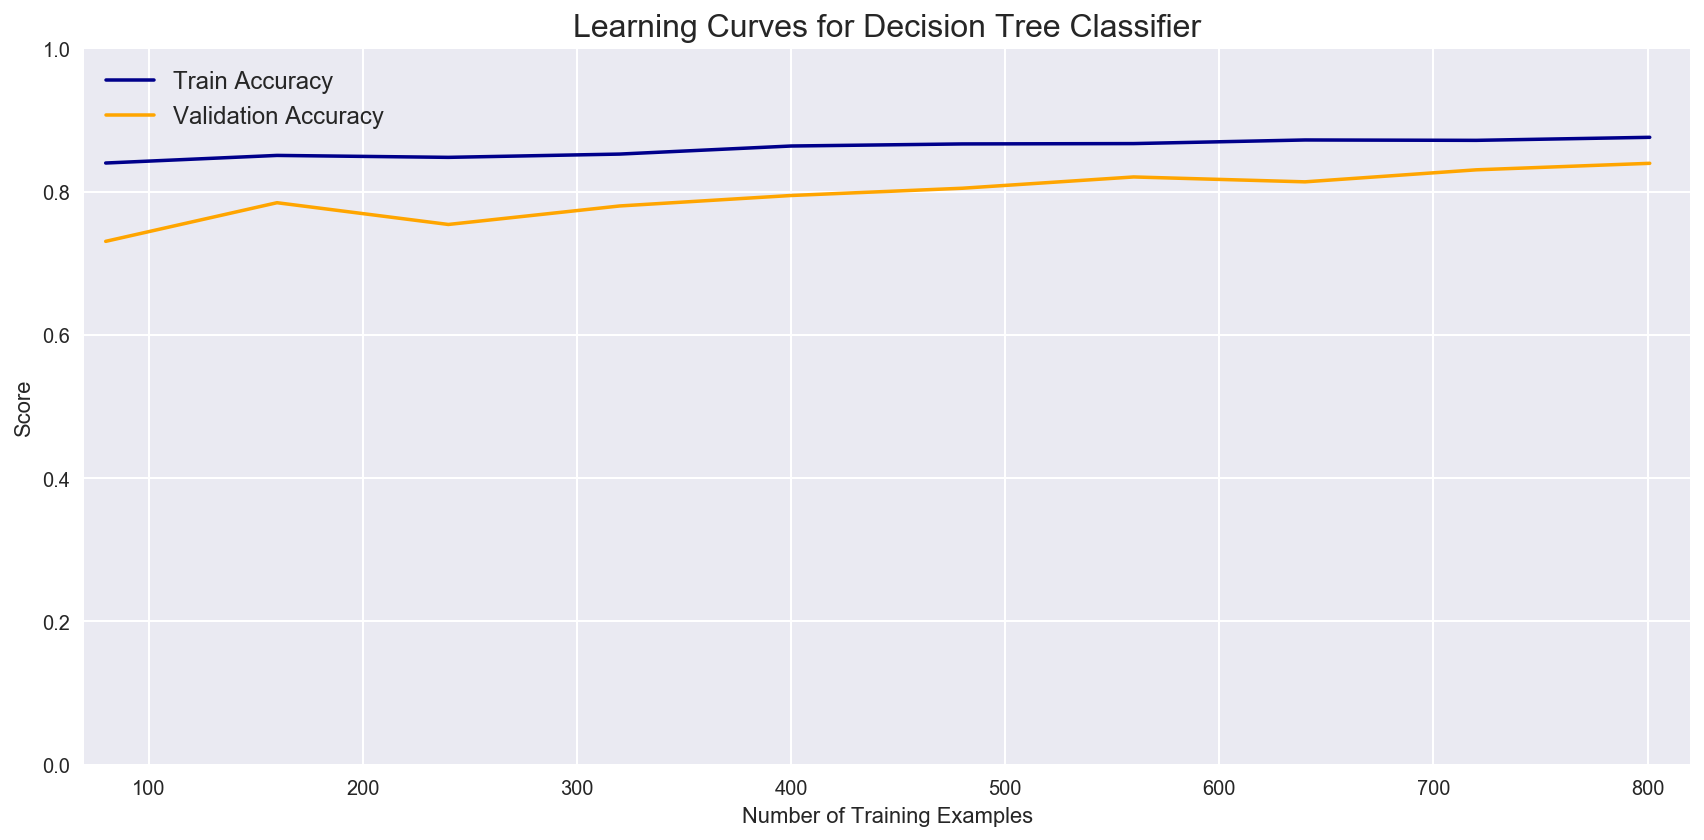

In [175]:
train_sizes, train_scores, valid_scores = learning_curve(
    estimator=classifier_xgb, X=X_train, y=y_train, 
    train_sizes=[.1, .2, .3, .4, .5, .6, .7, .8, .9, 1.], cv=10, n_jobs=-1)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), color='darkblue', label='Train Accuracy')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), color='orange', label='Validation Accuracy')
plt.xlim(70, 820)
plt.ylim(0, 1)
plt.title('Learning Curves for XGBoost', fontsize=16)
plt.xlabel('Number of Training Examples')
plt.ylabel('Score')
plt.legend(fontsize=12)
plt.tight_layout()

### XGBoost Feature Importance

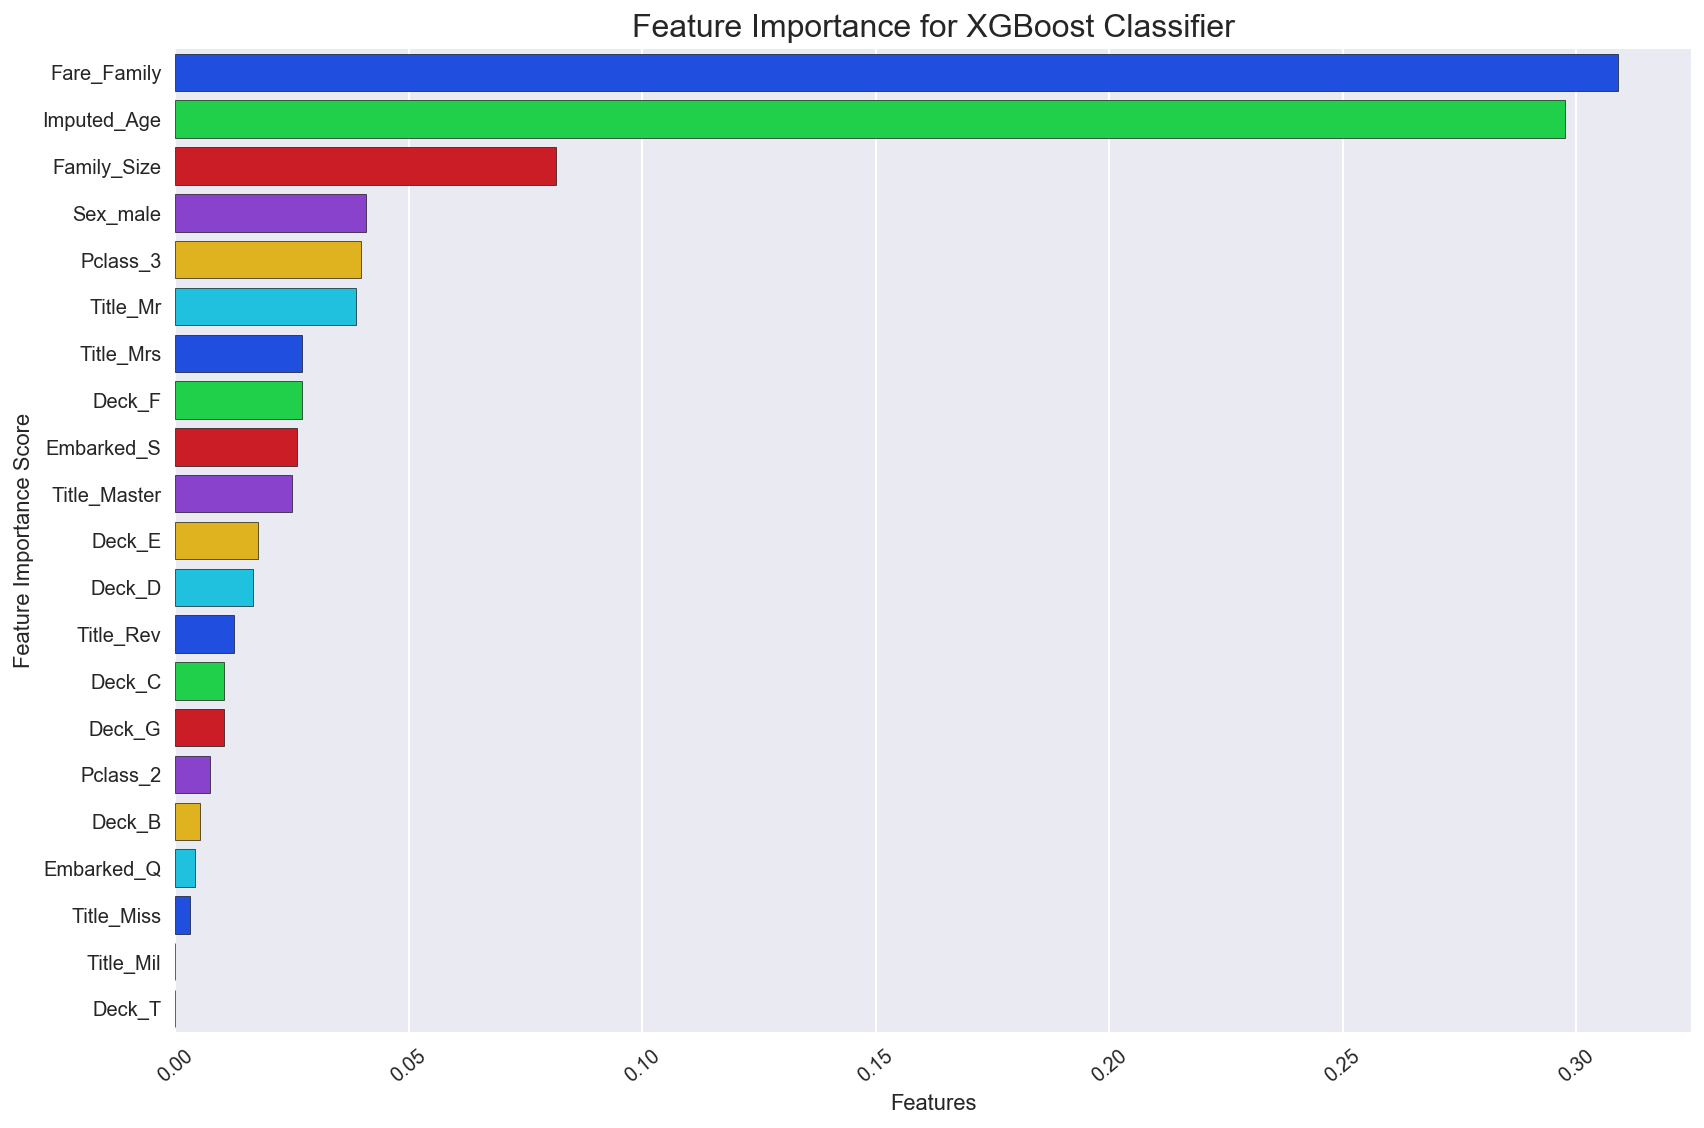

In [231]:
features = pd.DataFrame(classifier_xgb.feature_importances_, index=final_df.columns, columns=['Feature_Importance'])
features.sort_values(by='Feature_Importance', ascending=False, inplace=True)
plt.figure(figsize=(12, 8))
sns.barplot(x=features.Feature_Importance, y=features.index, estimator=np.sum)
plt.xticks(rotation=40)
plt.title('Feature Importance for XGBoost Classifier', fontsize=16)
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.tight_layout()

## Data Preparation
### Predicting Probabilities for Survival from all models

In [284]:
predict_prob = pd.DataFrame(data={'nb': classifier_nb.predict_proba(scX_test)[:, 1],
                                  'lda': classifier_lda.predict_proba(scX_test)[:, 1],
                                  'knn': classifier_knn.predict_proba(scX_test)[:, 1],
                                  'log': classifier_log.predict_proba(scX_test)[:, 1],
                                  'svc': classifier_svc.predict_proba(scX_test)[:, 1],
                                  'dt': classifier_dt.predict_proba(scX_test)[:, 1],
                                  'rf': classifier_gbt.predict_proba(scX_test)[:, 1],
                                  'gbt': classifier_gbt.predict_proba(scX_test)[:, 1]
                                 }, index=test_df['PassengerId']
                           )
predict_prob.head(25)

dt       gbt   knn       lda       log        nb        rf  \
PassengerId                                                                     
892          0.000000  0.097930  0.00  0.044875  0.100587  0.875749  0.097930   
893          0.333333  0.405782  0.25  0.705615  0.608436  1.000000  0.405782   
894          0.200000  0.095397  0.00  0.058852  0.133673  0.999709  0.095397   
895          0.375000  0.131508  0.50  0.040717  0.095871  0.007224  0.131508   
896          1.000000  0.766780  0.50  0.725603  0.642797  1.000000  0.766780   
897          0.222222  0.108542  0.25  0.064515  0.130995  0.007564  0.108542   
898          0.100000  0.543281  0.25  0.748628  0.650542  1.000000  0.543281   
899          0.000000  0.107464  0.00  0.083470  0.157155  0.914137  0.107464   
900          1.000000  0.863133  0.75  0.902120  0.840575  1.000000  0.863133   
901          0.000000  0.108542  0.00  0.026037  0.065708  0.019706  0.108542   
902          0.000000  0.098779  0.00  0.039929  0.094391  0.007216  0.098779   
903          0.000000  0.119815  0.25  0.205436  0.289044  0.136727  0.119815   
904          1.000000  0.934250  1.00  0.980543  0.943540  1.000000  0.934250   
905          0.454545  0.110540  0.00  0.061055  0.117746  0.862010  0.110540   
906          0.916667  0.893222  1.00  0.968820  0.914302  1.000000  0.893222   
907          0.714286  0.935582  1.00  0.958167  0.915031  1.000000  0.935582   
908          0.090909  0.118986  0.00  0.146899  0.244228  0.999735  0.118986   
909          0.272727  0.145456  0.50  0.075148  0.155073  0.644596  0.145456   
910          0.214286  0.484286  0.25  0.662575  0.560778  1.000000  0.484286   
911          0.500000  0.451676  0.75  0.770422  0.717592  1.000000  0.451676   
912          0.250000  0.272681  0.75  0.286596  0.341764  0.985396  0.272681   
913          1.000000  0.808644  1.00  0.802418  0.692275  1.000000  0.808644   
914          0.785714  0.833691  1.00  0.958215  0.909277  1.000000  0.833691   
915          0.777778  0.553510  0.75  0.436400  0.479123  0.986847  0.553510   
916          1.000000  0.927515  1.00  0.937725  0.874700  1.000000  0.927515   

                  svc  
PassengerId            
892          0.168978  
893          0.611273  
894          0.232924  
895          0.168570  
896          0.615518  
897          0.162103  
898          0.887553  
899          0.161947  
900          0.772558  
901          0.157975  
902          0.167948  
903          0.186097  
904          0.879574  
905          0.121886  
906          0.898554  
907          0.893583  
908          0.246066  
909          0.166226  
910          0.308883  
911          0.736347  
912          0.181079  
913          0.937982  
914          0.922759  
915          0.221988  
916          0.946797

### Calculate the average of the probabilities per row from all models

In [285]:
predictions_average = predict_prob.apply(np.mean, axis=1)

### Create new Train and Test Dataframes using PassengerId as index

In [288]:
train_df_v2 = final_df.iloc[:train_df.shape[0], :].set_index(train_df['PassengerId'])
test_df_v2 = final_df.iloc[train_df.shape[0]:, :].set_index(test_df['PassengerId'])

### Check rows with higher certainty of predictions (below 15% and above 85%)
There are 187 of them.

In [290]:
np.sum((predictions_average < 0.15) | (predictions_average > 0.85))

187

In [291]:
test_df_v2.loc[((predictions_average < 0.15) | (predictions_average > 0.85))].head(10)

Imputed_Age  Fare_Family  Family_Size   Age_x_Fare  \
PassengerId                                                       
897            14.000000      9.22500            1   129.150000   
900            18.000000      7.22920            1   130.125600   
901            21.000000      8.05000            3   169.050000   
902            27.490398      7.89580            1   217.058683   
904            23.000000     41.13335            2   946.067050   
906            47.000000     30.58750            2  1437.612500   
907            24.000000     13.86040            2   332.649600   
913             9.000000      1.58540            2    14.268600   
914            50.558278     31.68330            1  1601.853082   
916            48.000000     52.47500            5  2518.800000   

             Age_/_Family_Size  Sex_male  Title_Master  Title_Mil  Title_Miss  \
PassengerId                                                                     
897                  14.000000         1             0          0           0   
900                  18.000000         0             0          0           0   
901                   7.000000         1             0          0           0   
902                  27.490398         1             0          0           0   
904                  11.500000         0             0          0           0   
906                  23.500000         0             0          0           0   
907                  12.000000         0             0          0           0   
913                   4.500000         1             1          0           0   
914                  50.558278         0             0          0           0   
916                   9.600000         0             0          0           0   

             Title_Mr  Title_Mrs  Title_Rev  Pclass_2  Pclass_3  Embarked_Q  \
PassengerId                                                                   
897                 1          0          0         0         1           0   
900                 0          1          0         0         1           0   
901                 1          0          0         0         1           0   
902                 1          0          0         0         1           0   
904                 0          1          0         0         0           0   
906                 0          1          0         0         0           0   
907                 0          1          0         1         0           0   
913                 0          0          0         0         1           0   
914                 0          1          0         0         0           0   
916                 0          1          0         0         0           0   

             Embarked_S  
PassengerId              
897                   1  
900                   0  
901                   1  
902                   1  
904                   1  
906                   1  
907                   0  
913                   1  
914                   1  
916                   0

### Concatenate X_train with rows from X_test whose predictions have the highest certainty

In [292]:
train_df_v3 = pd.concat([train_df_v2, test_df_v2.loc[
    ((predictions_average < 0.15) | (predictions_average > 0.85))]])

X_train2 = train_df_v3.as_matrix()

### Create new X_test only with the most uncertain predictions

In [293]:
test_df_v3 = test_df_v2.loc[
    ((predictions_average > 0.15) & (predictions_average < 0.85))]

X_test2 = test_df_v3.as_matrix()

### Create new y_train by adding the labels from most certain predictions to the original y_train

In [294]:
y_train2 = np.hstack((y_train, np.array(predictions_average.loc[
    ((predictions_average < 0.15) | (predictions_average > 0.85))] > .5).astype(int)))

### Rescale the newly created X_train2 and X_test2

In [295]:
sc_X2 = StandardScaler()
scX_train2 = sc_X.fit_transform(X_train2)
scX_test2 = sc_X.transform(X_test2)
print('Shape of scaled X_train: {}\nShape of scaled X_test: {}'.format(scX_train2.shape, scX_test2.shape))

Shape of scaled X_train: (1078, 16)
Shape of scaled X_test: (231, 16)


## K-Nearest Neighbours
Use KNN to make predictions on the new smaller test set using the enlarged training set.

In [296]:
classifier_knn2 = KNeighborsClassifier(n_neighbors=6, n_jobs=-1)
classifier_knn2.fit(scX_train2, y_train2)
predictions_knn2 = classifier_knn2.predict(scX_test2)

### KNN Tuning Hyperparameters

In [297]:
# Create parameters to use in Grid Search
parameters = {'n_neighbors': [5, 6, 7, 8, 9, 10]
             }
grid_search = GridSearchCV(estimator=classifier_knn2, 
                           param_grid=parameters, 
                           scoring='accuracy', 
                           cv=10, 
                           n_jobs=-1)
grid_search.fit(scX_train2, y_train2)
print('Best accuracy is {:0.4f}%.\n'.format(grid_search.best_score_*100))
print('Best parameters are {}.'.format(grid_search.best_params_))

Best accuracy is 85.9926%.

Best parameters are {'n_neighbors': 8}.


### KNN Plotting Learning Curves

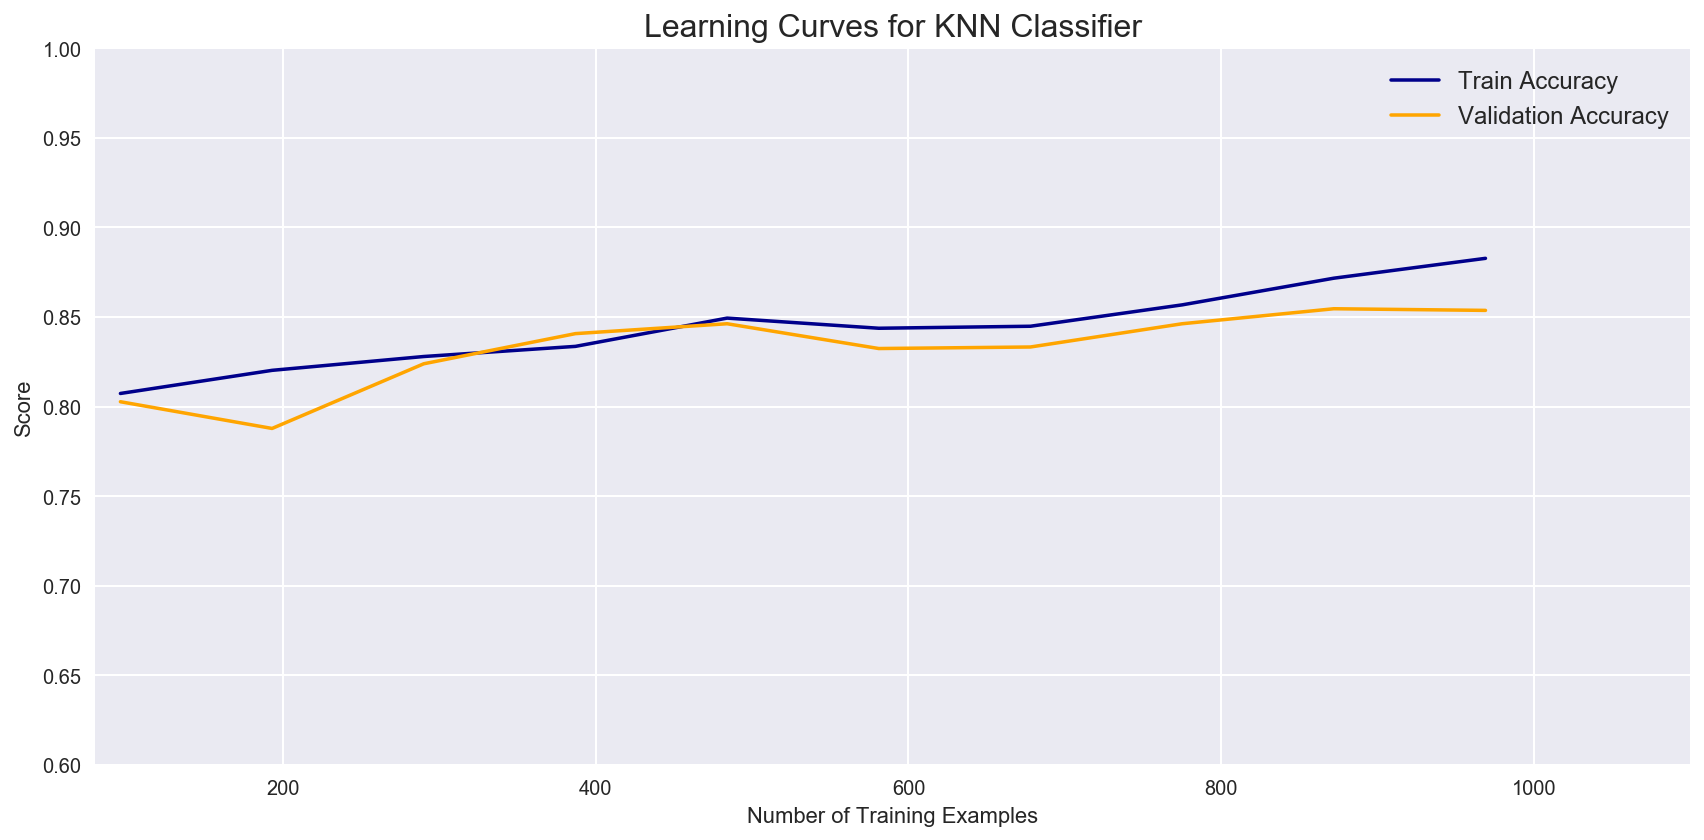

In [298]:
train_sizes, train_scores, valid_scores = learning_curve(
    estimator=classifier_knn2, X=scX_train2, y=y_train2, 
    train_sizes=[.1, .2, .3, .4, .5, .6, .7, .8, .9, 1.], cv=10, n_jobs=-1)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), color='darkblue', label='Train Accuracy')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), color='orange', label='Validation Accuracy')
plt.xlim(80, 1100)
plt.ylim(0.6, 1)
plt.title('Learning Curves for KNN Classifier', fontsize=16)
plt.xlabel('Number of Training Examples')
plt.ylabel('Score')
plt.legend(fontsize=12)
plt.tight_layout()

## PCA
Create PCA training set.

In [299]:
pca2 = PCA(n_components=0.99)
pcaX_train2 = pca2.fit_transform(scX_train2)
pcaX_test2 = pca2.transform(scX_test2)
print('Shape of PCA X_train: {}'.format(pcaX_train2.shape))

Shape of PCA X_train: (1078, 12)


## LDA
Create LDA Training set.

In [300]:
lda2 = LinearDiscriminantAnalysis()
ldaX_train2 = lda2.fit_transform(scX_train2, y=y_train2)
ldaX_test2 = lda2.transform(scX_test2)
print('Shape of LDA X_train: {}'.format(ldaX_train2.shape))

Shape of LDA X_train: (1078, 1)


## Logistic Regression

In [315]:
classifier_log2 = LogisticRegression(penalty='l2', C=0.2, random_state=555, n_jobs=-1)
classifier_log2.fit(scX_train2, y_train2)
predictions_log2 = classifier_log2.predict(scX_test2)

### Tuning Hyperparameters

In [314]:
# Create parameters to use in Grid Search
parameters = {'C': [0.03, 0.04, 0.1, 0.2, 0.3], 
              'penalty': ['l1', 'l2']
             }
grid_search = GridSearchCV(estimator=classifier_log2, 
                           param_grid=parameters, 
                           scoring='accuracy', 
                           cv=10)
%time grid_search.fit(scX_train2, y_train2)
print('Best accuracy is {:0.4f}%.\n'.format(grid_search.best_score_*100))
print('Best parameters are {}.'.format(grid_search.best_params_))

CPU times: user 476 ms, sys: 2.99 ms, total: 479 ms
Wall time: 479 ms
Best accuracy is 86.1781%.

Best parameters are {'C': 0.2, 'penalty': 'l2'}.


### Plotting Learning Curves

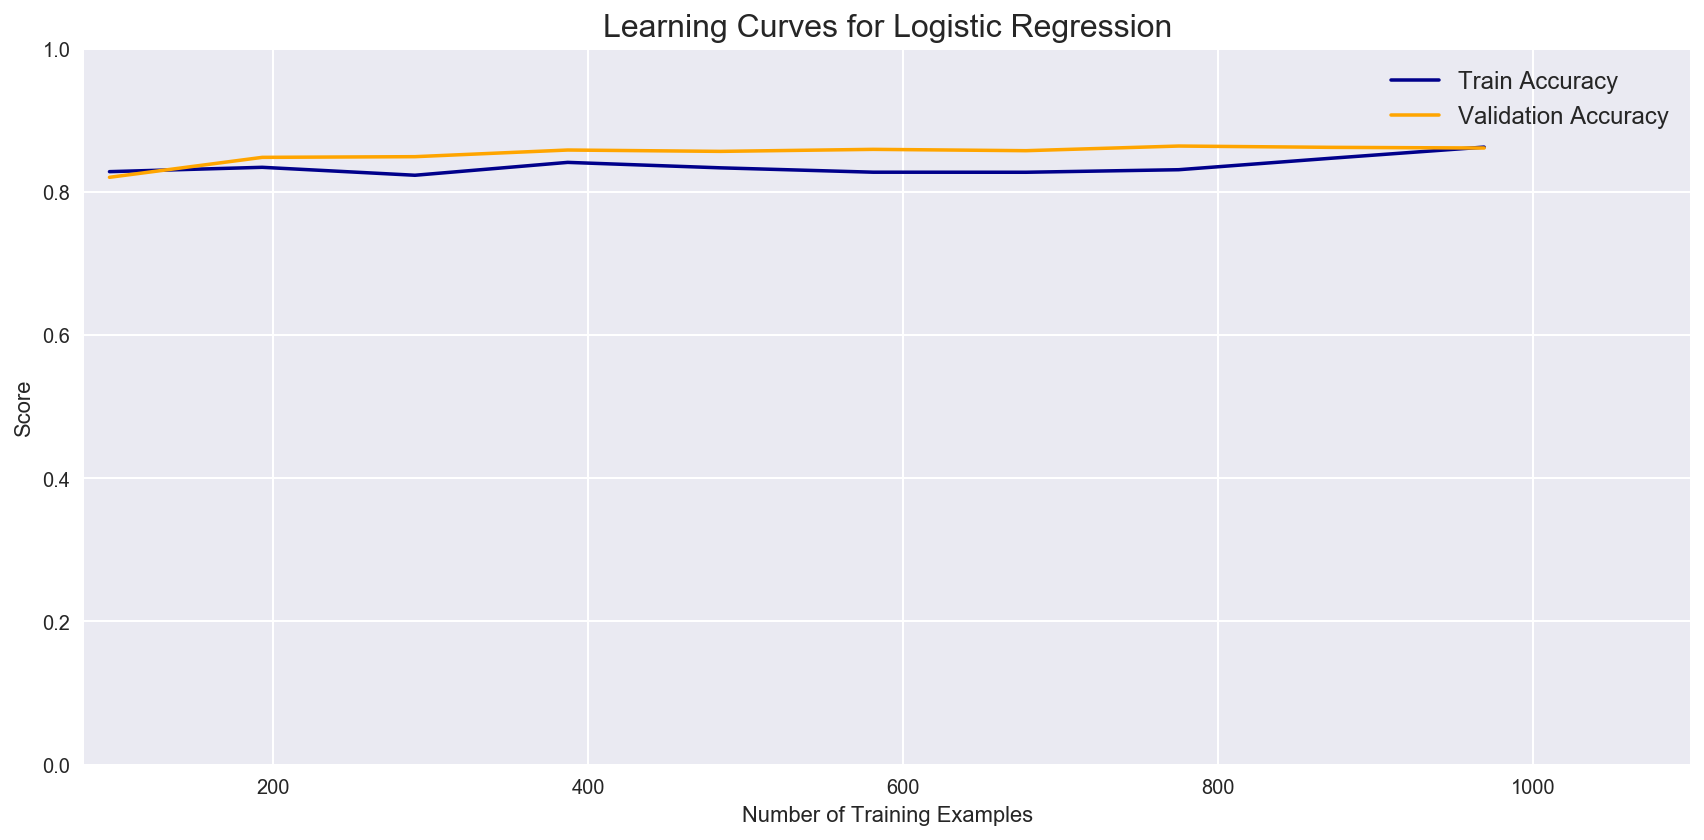

In [309]:
train_sizes, train_scores, valid_scores = learning_curve(
    estimator=classifier_log2, X=scX_train2, y=y_train2, 
    train_sizes=[.1, .2, .3, .4, .5, .6, .7, .8, .9, 1.], cv=10)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), color='darkblue', label='Train Accuracy')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), color='orange', label='Validation Accuracy')
plt.xlim(80, 1100)
plt.ylim(0, 1)
plt.title('Learning Curves for Logistic Regression', fontsize=16)
plt.xlabel('Number of Training Examples')
plt.ylabel('Score')
plt.legend(fontsize=12)
plt.tight_layout()

## Decision Trees
Use Decision Tree Classifier to make predictions on the new smaller test set using the enlarged training set.

In [310]:
classifier_dt2 = DecisionTreeClassifier(criterion='gini', min_samples_split=2, min_samples_leaf=10,
                                       random_state=555)
classifier_dt2.fit(scX_train2, y_train2)
predictions_dt2 = classifier_dt2.predict(scX_test2)

### Decision Tree Tuning Hyperparameters

In [311]:
# Create parameters to use in Grid Search
parameters = {'min_samples_split': [2, 3],
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [7, 8, 9, 10, 11]
             }
grid_search = GridSearchCV(estimator=classifier_dt2, 
                           param_grid=parameters, 
                           scoring='accuracy', 
                           cv=10, 
                           n_jobs=-1)

%time grid_search.fit(scX_train2, y_train2)
print('Best accuracy is {:0.4f}%.\n'.format(grid_search.best_score_*100))
print('Best parameters are {}.'.format(grid_search.best_params_))

CPU times: user 224 ms, sys: 58.4 ms, total: 283 ms
Wall time: 490 ms
Best accuracy is 85.8071%.

Best parameters are {'criterion': 'gini', 'min_samples_leaf': 11, 'min_samples_split': 2}.


## Gradient Boosting

In [312]:
classifier_gbt2 = GradientBoostingClassifier(learning_rate=0.01, 
                                            n_estimators=800, 
                                            min_samples_leaf=2,
                                            min_samples_split=2,
                                            max_features='auto',
                                            random_state=555)
classifier_gbt2.fit(scX_train2, y_train2)
predictions_gbt2 = classifier_gbt2.predict(scX_test2)

### Tuning Hyperparameters

In [313]:
# Applying Grid Search to find the best model and the best parameters
parameters = {'learning_rate': [0.001, 0.01, 0.02], 
              'n_estimators': [700, 800, 900]
             }

grid_search = GridSearchCV(estimator=classifier_gbt2, 
                           param_grid=parameters, 
                           scoring='accuracy', 
                           cv=10, 
                           n_jobs=-1)

%time grid_search = grid_search.fit(scX_train2, y_train2)
print('Best accuracy is {:0.4f}%.\n'.format(grid_search.best_score_*100))
print('Best parameters are {}.'.format(grid_search.best_params_))

CPU times: user 1.15 s, sys: 78.3 ms, total: 1.23 s
Wall time: 20.1 s
Best accuracy is 85.9926%.

Best parameters are {'learning_rate': 0.001, 'n_estimators': 700}.


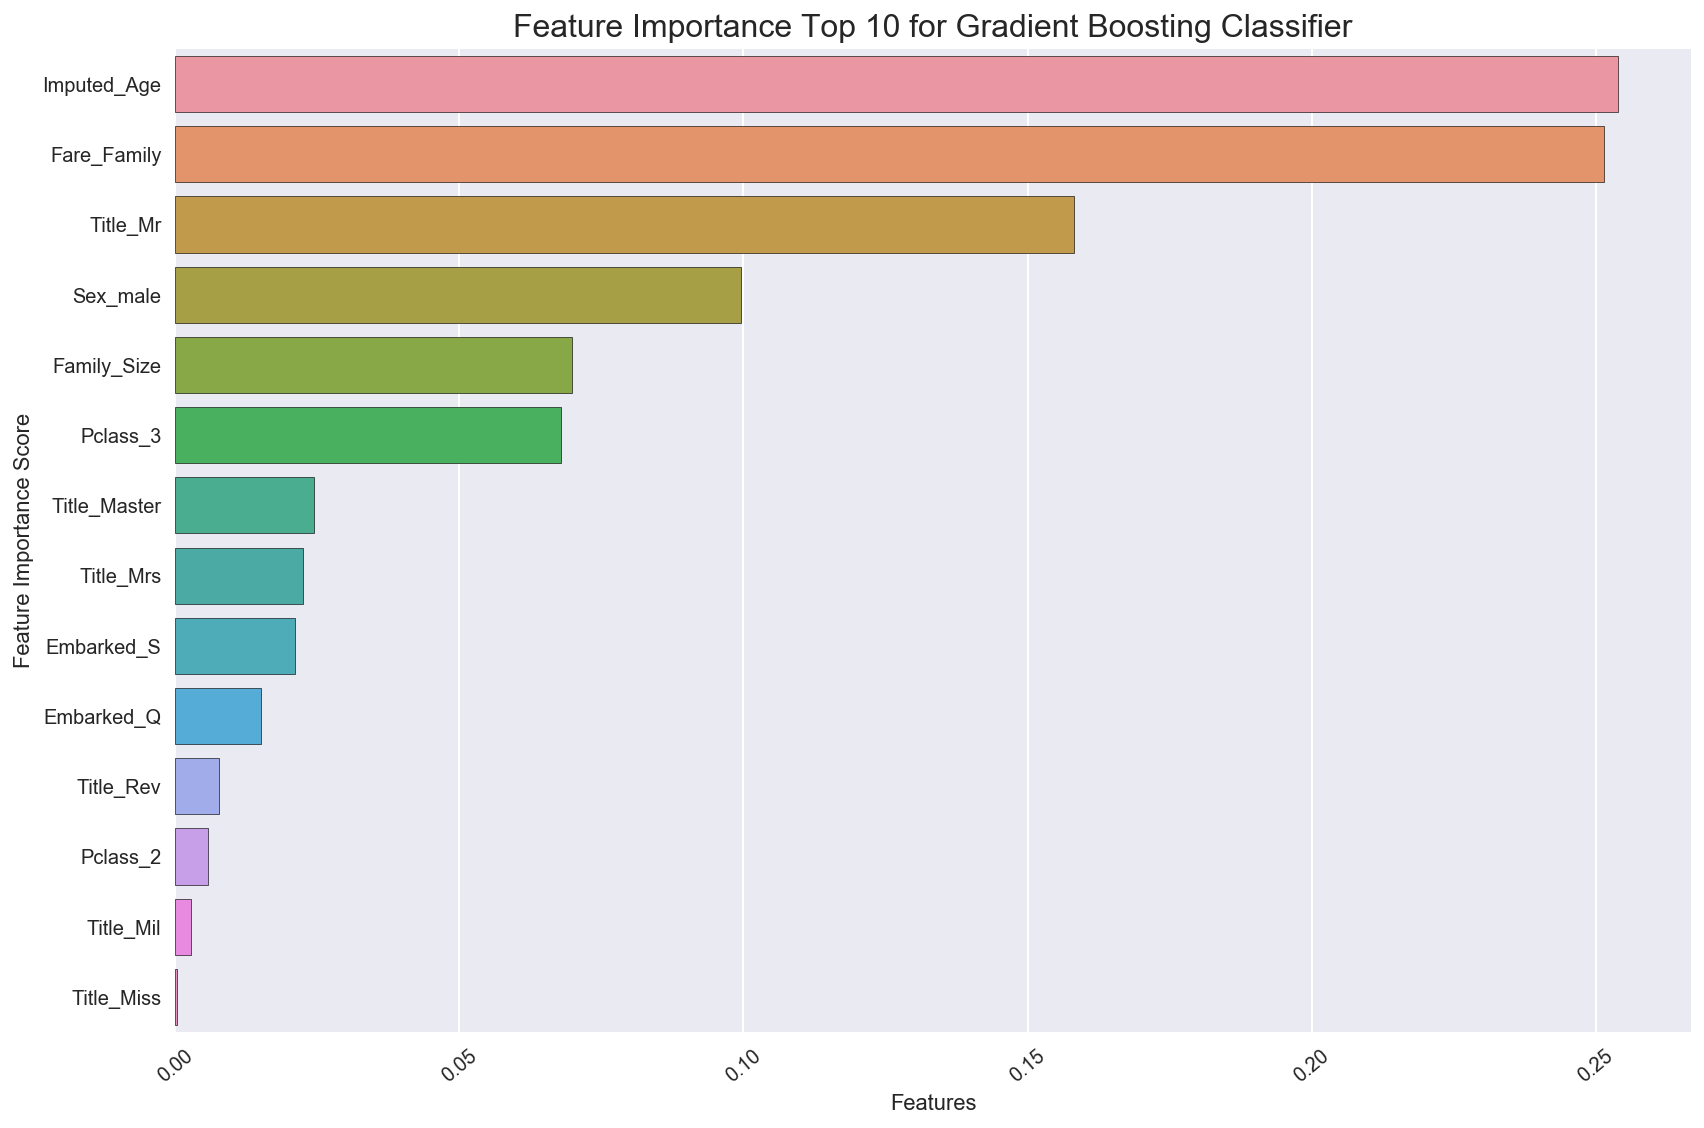

In [120]:
features = pd.DataFrame(classifier_gbt2.feature_importances_[:15], index=final_df.columns[:15], columns=['Feature_Importance'])
features.sort_values(by='Feature_Importance', ascending=False, inplace=True)
plt.figure(figsize=(12, 8))
sns.barplot(x=features.Feature_Importance, y=features.index, estimator=np.sum)
plt.xticks(rotation=40)
plt.title('Feature Importance Top 10 for Gradient Boosting Classifier', fontsize=16)
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.tight_layout()

## Merge Predictions from the Two Stages

In [316]:
test_df_v4 = test_df_v3.copy()
test_df_v5 = test_df_v2.loc[
    ((predictions_average < 0.15) | (predictions_average > 0.85))].copy()

### Set Predictions from Chosen Classifier to Smaller Test Set

In [317]:
test_df_v4.loc[:, 'Predictions'] = predictions_log2
test_df_v4.Predictions.value_counts()

0    153
1     78
Name: Predictions, dtype: int64

### Add Average Predictions From Previous Stage to the X_test that was merged with X_train

In [318]:
test_df_v5.loc[:, 'Predictions'] = ((predictions_average.loc[
    ((predictions_average < 0.15) | (predictions_average > 0.85))]) > .5).astype(int)
test_df_v5.Predictions.value_counts()

0    96
1    91
Name: Predictions, dtype: int64

### Concatenate both Test Dataframes, Sort Them by "PassengerId" and Export Predictions Vector

In [319]:
predictions_final = np.array(pd.concat([test_df_v4, test_df_v5], join='inner').sort_index()['Predictions'])
predictions_final.shape

(418,)

## Prepare Submission

In [354]:
# Kaggle needs the submission to have a certain format;
# see https://www.kaggle.com/c/titanic-gettingStarted/download/gendermodel.csv
# for an example of what it's supposed to look like.
submission = pd.DataFrame({'PassengerId': test_df['PassengerId'],
                           'Survived': predictions_rf_redux})
submission.to_csv("submission.csv", index=False)